## BrainStation Capstone Project 2024

### Predictive Modeling for Mushroom Poisoning:  A Data-Driven Approach to Enhance Public Safety



Submitted by Simona Sklenar 

### Introduction 

Mushroom poisoning refers to the adverse effects caused by the ingestion of toxic mushrooms, which contain harmful substances known as toxins. Toxic mushrooms can resemble edible varieties, making it challenging for individuals to differentiate between safe and poisonous species without proper knowledge or identification. The severity of mushroom poisoning can range from mild gastrointestinal discomfort to life-threatening symptoms, including organ failure and death. Poisonous mushrooms contain various toxins, such as amatoxins, phallotoxins, and muscimol, which can affect different bodily systems and organs.

Mushroom poisoning poses a significant public health concern, particularly for foragers, mushroom hunters, and individuals who consume wild mushrooms without adequate knowledge or expertise. Accidental ingestion of toxic mushrooms can lead to serious health consequences, including hospitalization and fatalities, especially in cases of misidentification or mistaken consumption. Data science approaches, such as machine learning and predictive modeling, offer promising solutions for improving the accurate identification and classification of mushrooms, thereby reducing the risks associated with mushroom poisoning and enhancing public safety.

### Problem Statement 

Despite the widespread availability of mushrooms in various natural habitats, accurately distinguishing between poisonous and non-poisonous varieties remains a significant challenge. Mushroom poisoning can lead to severe health complications, including organ failure and even death. Therefore, there is a critical need for reliable methods to categorize mushrooms and mitigate the risks associated with accidental ingestion of toxic species. The lack of accessible and efficient classification systems poses a potential threat to public health and safety. Addressing this problem requires developing robust data-driven solutions that leverage machine learning techniques to accurately identify the toxicity levels of mushrooms based on their observable characteristics.

### Dataset Description 

The dataset used in this study is the "Secondary Mushroom Dataset," sourced from the UC Irvine Machine Learning Repository. This dataset is designed for binary classification, distinguishing between edible and poisonous mushrooms. It is tabular in nature, relevant to the field of biology, and supports classification tasks.
The Secondary Mushroom Dataset comprises 61,068 instances and 20 features, all of which are real-valued. It was inspired by the Mushroom Data Set of J. Schlimmer and aims to enhance the understanding and classification of mushrooms based on their edibility. Each instance in the dataset represents a hypothetical mushroom, derived from 173 different species, with each species contributing 353 examples. The dataset labels mushrooms as either edible, poisonous, or of unknown edibility. For the purposes of this study, mushrooms of unknown edibility have been grouped with the poisonous category to simplify the classification task.
The dataset's creation was motivated by the need to develop robust methods for identifying poisonous mushrooms, thereby reducing the risk of mushroom poisoning incidents. The comprehensive nature of this dataset makes it a valuable resource for developing and testing machine learning models for mushroom classification.

### Project Overview

#### Data Inspection and Preprocessing

We will perform data imputation to handle null values, map the target variable's values to binary inputs and apply transformations to convert categorical variables into numerical representations using techniques like one-hot encoding.

#### Exploratory Data Analysis

We conducted a thorough analysis of the features to understand their distribution and relationship with the target variable. This included calculating Cramér's V, Phi-coefficients, Pearson's correlation, and Variance Inflation Factor (VIF) to assess feature importance and multicollinearity.

#### Feature Engineering and Selection

Based on the EDA, we reduced the number of features to remove highly correlated and less important features. Moreoever, we created polynomial interaction features to capture more complex relationships between variables.

#### Model Development 


* *Logistic Regression*: We started with logistic regression and experimented with various techniques such as hyperparameter tuning, SMOTE for handling class imbalance, and feature interactions.
<br />

* *K-Nearest Neighbors (KNN)*: We applied KNN and achieved excellent results, demonstrating the effectiveness of this algorithm for our classification task.
<br />

* *Decision Trees*: We trained decision tree models and further refined them using hyperparameter tuning and feature importance analysis.
<br />

* *Random Forest*: The random forest model provided the best performance, with near-perfect classification accuracy and robust feature importance insights.
<br />

* *Neural Networks (Deep Learning)*: We explored deep learning techniques to further improve classification performance, leveraging the power of neural networks.

#### Model Evaluation 

* *Metrics*: We used accuracy, precision, recall, F1-score, confusion matrix, and ROC-AUC to evaluate the performance of our models.
<br />

* *Overfitting Check*: We conducted cross-validation to ensure the models were not overfitting and to validate their generalizability.
<br />

* *Running Time*: We included the running time for each model to provide insights into computational efficiency.

Let us being by importing all of our required libraries. 

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm
import time
import warnings

from scipy import stats
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from scipy.stats import chi2_contingency

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


In [2]:
warnings.filterwarnings('ignore')

***

## Data Inspection and Preprocessing

### Data Dictionary 

Before we begin, let us provide a data dictionary for all of our features and their values. 

| Feature             | Type                  | Description                                           | Values                                                                                                                                                    |
|---------------------|-----------------------|-------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| cap_color           | Categorical variable  | Represents the color of the mushroom cap              | n: brown, b: buff, g: gray, r: green, p: pink, u: purple, e: red, w: white, y: yellow, l: blue, o: orange, k: black                                        |
| cap_diameter        | Numerical variable     | Represents the diameter of the mushroom cap in centimeters | type: float                                                                                                                                               |
| cap_shape           | Categorical variable  | Represents the shape of the mushroom cap              | b: bell, c: conical, x: convex, f: flat, s: sunken, p: spherical, o: others                                                                               |
| cap_surface         | Categorical variable  | Represents the surface texture of the mushroom cap    | i: fibrous, g: grooves, y: scaly, s: smooth, h: shiny, l: leathery, k: silky, t: sticky, w: wrinkled, e: fleshy                                            |
| class               | Binary class label    | Indicates whether the mushroom is edible or poisonous | e: edible, p: poisonous                                                                                                                                    |
| does_bruise_or_bleed| Categorical variable  | Indicates whether the mushroom bruises or bleeds      | t: bruises or bleeding, f: no                                                                                                                             |
| gill_attachment     | Categorical variable  | Represents the attachment of the mushroom gills       | a: adnate, x: adnexed, d: decurrent, e: free, s: sinuate, p: pores, f: none, ?: unknown                                                                    |
| gill_color          | Categorical variable  | Represents the color of the mushroom gills            | n: brown, b: buff, g: gray, r: green, p: pink, u: purple, e: red, w: white, y: yellow, l: blue, o: orange, k: black, f: none                              |
| gill_spacing        | Categorical variable  | Represents the spacing of the mushroom gills          | c: close, d: distant, f: none                                                                                                                             |
| habitat             | Categorical variable  | Represents the habitat where the mushroom is found    | g: grasses, l: leaves, m: meadows, p: paths, h: heaths, u: urban, w: waste, d: woods                                                                      |
| has_ring            | Categorical variable  | Indicates whether the mushroom has a ring             | t: ring, f: none                                                                                                                                          |
| ring_type           | Categorical variable  | Represents the type of ring on the mushroom           | c: cobwebby, e: evanescent, r: flaring, g: grooved, l: large, p: pendant, s: sheathing, z: zone, y: scaly, m: movable, f: none, ?: unknown                |
| season              | Categorical variable  | Represents the season when the mushroom is found      | s: spring, u: summer, a: autumn, w: winter                                                                                                                 |
| spore_print_color   | Categorical variable  | Represents the color of the mushroom's spore print    | same as cap_color                                                                                                                                          |
| stem_color          | Categorical variable  | Represents the color of the mushroom stem             | same as cap_color + f: none                                                                                                                                |
| stem_height         | Numerical variable      | Represents the height of the mushroom stem in centimeters | type: float                                                                                                                                               |
| stem_root           | Categorical variable  | Represents the root type of the mushroom stem         | b: bulbous, s: swollen, c: club, u: cup, e: equal, z: rhizomorphs, r: rooted                                                                               |
| stem_surface        | Categorical variable  | Represents the surface texture of the mushroom stem   | same as cap_surface + f: none                                                                                                                              |
| stem_width          | Numerical variable     | Represents the width of the mushroom stem in millimeters | type: float                                                                                                                                               |
| veil_color          | Categorical variable  | Represents the color of the veil                      | same as cap_color + f: none                                                                                                                                |
| veil_type           | Categorical variable  | Represents the type of veil on the mushroom           | p: partial, u: universal                                                                                                                                  |


In [3]:
# Read CSV file with semicolon delimiter
df = pd.read_csv(r'C:\Users\simon\OneDrive\Desktop\mushroom_cap\secondary_data.csv', delimiter=';')

In [4]:
# Reading CSV file with semicolon delimiter:

df = pd.read_csv(r'C:\Users\simon\OneDrive\Desktop\mushroom_cap\secondary_data.csv', delimiter=';')

In [5]:
# Stripping whitespace:

df.columns = df.columns.str.strip()

In [6]:
# Renaming columns to lowercase and replacing spaces with underscores:

df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')

In [7]:
# Displaying modified column names:

print("\nModified Column Names:")
print(df.columns)


Modified Column Names:
Index(['class', 'cap_diameter', 'cap_shape', 'cap_surface', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
       'stem_height', 'stem_width', 'stem_root', 'stem_surface', 'stem_color',
       'veil_type', 'veil_color', 'has_ring', 'ring_type', 'spore_print_color',
       'habitat', 'season'],
      dtype='object')


In [8]:
# Checking the shape:

print(df.shape)

(61069, 21)


In [9]:
# Checking the head:

df.head()

,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [10]:
# Extracting information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap_diameter          61069 non-null  float64
 2   cap_shape             61069 non-null  object 
 3   cap_surface           46949 non-null  object 
 4   cap_color             61069 non-null  object 
 5   does_bruise_or_bleed  61069 non-null  object 
 6   gill_attachment       51185 non-null  object 
 7   gill_spacing          36006 non-null  object 
 8   gill_color            61069 non-null  object 
 9   stem_height           61069 non-null  float64
 10  stem_width            61069 non-null  float64
 11  stem_root             9531 non-null   object 
 12  stem_surface          22945 non-null  object 
 13  stem_color            61069 non-null  object 
 14  veil_type             3177 non-null   object 
 15  veil_color         

In [11]:
# Extracting statistical information on numerical variables:

df.describe()

,cap_diameter,stem_height,stem_width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [12]:
# Checking for null/missing values:

print("Null Values:")
print(df.isnull().sum())

Null Values:
class                       0
cap_diameter                0
cap_shape                   0
cap_surface             14120
cap_color                   0
does_bruise_or_bleed        0
gill_attachment          9884
gill_spacing            25063
gill_color                  0
stem_height                 0
stem_width                  0
stem_root               51538
stem_surface            38124
stem_color                  0
veil_type               57892
veil_color              53656
has_ring                    0
ring_type                2471
spore_print_color       54715
habitat                     0
season                      0
dtype: int64


In [13]:
# Checking for duplicates across all columns:
duplicate_rows = df[df.duplicated(keep=False)]

# Counting total number of duplicated rows:
num_duplicates = len(duplicate_rows)

print(f"Total duplicated rows: {num_duplicates}")

Total duplicated rows: 266


In [14]:
# Dropping duplicates and overwriting the dataset:
df.drop_duplicates(inplace=True)

# Verifing the number of remaining rows:
print(f"Remaining rows after dropping duplicates: {len(df)}")

Remaining rows after dropping duplicates: 60923


In [15]:
# Checking unique values for the traget variable 'class' before mapping:
print("Unique values in 'class' before mapping:", df['class'].unique())

# Ensuring 'class' column is a string type:
df['class'] = df['class'].astype(str)

# Ensuring 'class' column is in proper form by stripping any leading/trailing whitespace from the class column:
df['class'] = df['class'].str.strip()

# Mapping the target variable values to [0, 1]:
df['class'] = df['class'].map({'e': 0, 'p': 1})

# Checking that the values were unique mapped correctly: 
print("Unique values in 'class' after mapping:", df['class'].unique())

Unique values in 'class' before mapping: ['p' 'e']
Unique values in 'class' after mapping: [1 0]


Now we make the decision to drop all the columns with a considerable amount of null or missing values. 

In [16]:
# Dropping columns with too many missing values:

df = df.drop(columns=['stem_root', 'stem_surface', 'veil_type', 'veil_color', 'spore_print_color'])

Now we will look at the process of imputation which will replace any left over null or missing values in the dataset with substituted values. 

In [17]:
# Printing null or missing values before imputation:

print("Null or missing values before imputation:")
print(df.isnull().sum())

Null or missing values before imputation:
class                       0
cap_diameter                0
cap_shape                   0
cap_surface             14120
cap_color                   0
does_bruise_or_bleed        0
gill_attachment          9855
gill_spacing            25062
gill_color                  0
stem_height                 0
stem_width                  0
stem_color                  0
has_ring                    0
ring_type                2471
habitat                     0
season                      0
dtype: int64


In [18]:
# Filling in the  missing values for remaining columns with the most frequent value (mode):

imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [19]:
# Ensuring that numerical columns remain numeric by converting the specific columns to numeric: 

df_imputed['cap_diameter'] = pd.to_numeric(df_imputed['cap_diameter'], errors='coerce')
df_imputed['stem_height'] = pd.to_numeric(df_imputed['stem_height'], errors='coerce')
df_imputed['stem_width'] = pd.to_numeric(df_imputed['stem_width'], errors='coerce')

In [20]:
# Checking null or missing values after imputation:

print(df_imputed.isnull().sum())

class                   0
cap_diameter            0
cap_shape               0
cap_surface             0
cap_color               0
does_bruise_or_bleed    0
gill_attachment         0
gill_spacing            0
gill_color              0
stem_height             0
stem_width              0
stem_color              0
has_ring                0
ring_type               0
habitat                 0
season                  0
dtype: int64


In [21]:
# Checking if the conversion was successful

print("Data types after conversion:")
print(df_imputed.dtypes)

Data types after conversion:
class                    object
cap_diameter            float64
cap_shape                object
cap_surface              object
cap_color                object
does_bruise_or_bleed     object
gill_attachment          object
gill_spacing             object
gill_color               object
stem_height             float64
stem_width              float64
stem_color               object
has_ring                 object
ring_type                object
habitat                  object
season                   object
dtype: object


In [22]:
# Identifing categorical and numerical features:
categorical_features = df_imputed.select_dtypes(include=['object']).columns
numeric_features = df_imputed.select_dtypes(include=['float64', 'int64']).columns

# Printing categorical and numerical features:
print(categorical_features)
print(numeric_features)

# Printing column names to verify:
print(df_imputed.columns)

Index(['class', 'cap_shape', 'cap_surface', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
       'stem_color', 'has_ring', 'ring_type', 'habitat', 'season'],
      dtype='object')
Index(['cap_diameter', 'stem_height', 'stem_width'], dtype='object')
Index(['class', 'cap_diameter', 'cap_shape', 'cap_surface', 'cap_color',
       'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color',
       'stem_height', 'stem_width', 'stem_color', 'has_ring', 'ring_type',
       'habitat', 'season'],
      dtype='object')


Our new dataset, *df_imputed* is now ready for our exploratory data analysis, which will consist of both univariate and multivariate analysis. 

***

## Exploratory Data Analysis: Data Visualizations



### Histograms of Categorical Variables

In this section, we will plot the histograms for each categorical variable to understand their distribution. They are useful for identifying skewness, outliers, and any class imbalances. By examining histograms, we can gain insights into the prevalence of each category and detect any anomalies that may impact the performance of predictive models. This understanding is crucial for effective data preprocessing and ensuring the robustness of machine learning algorithms.

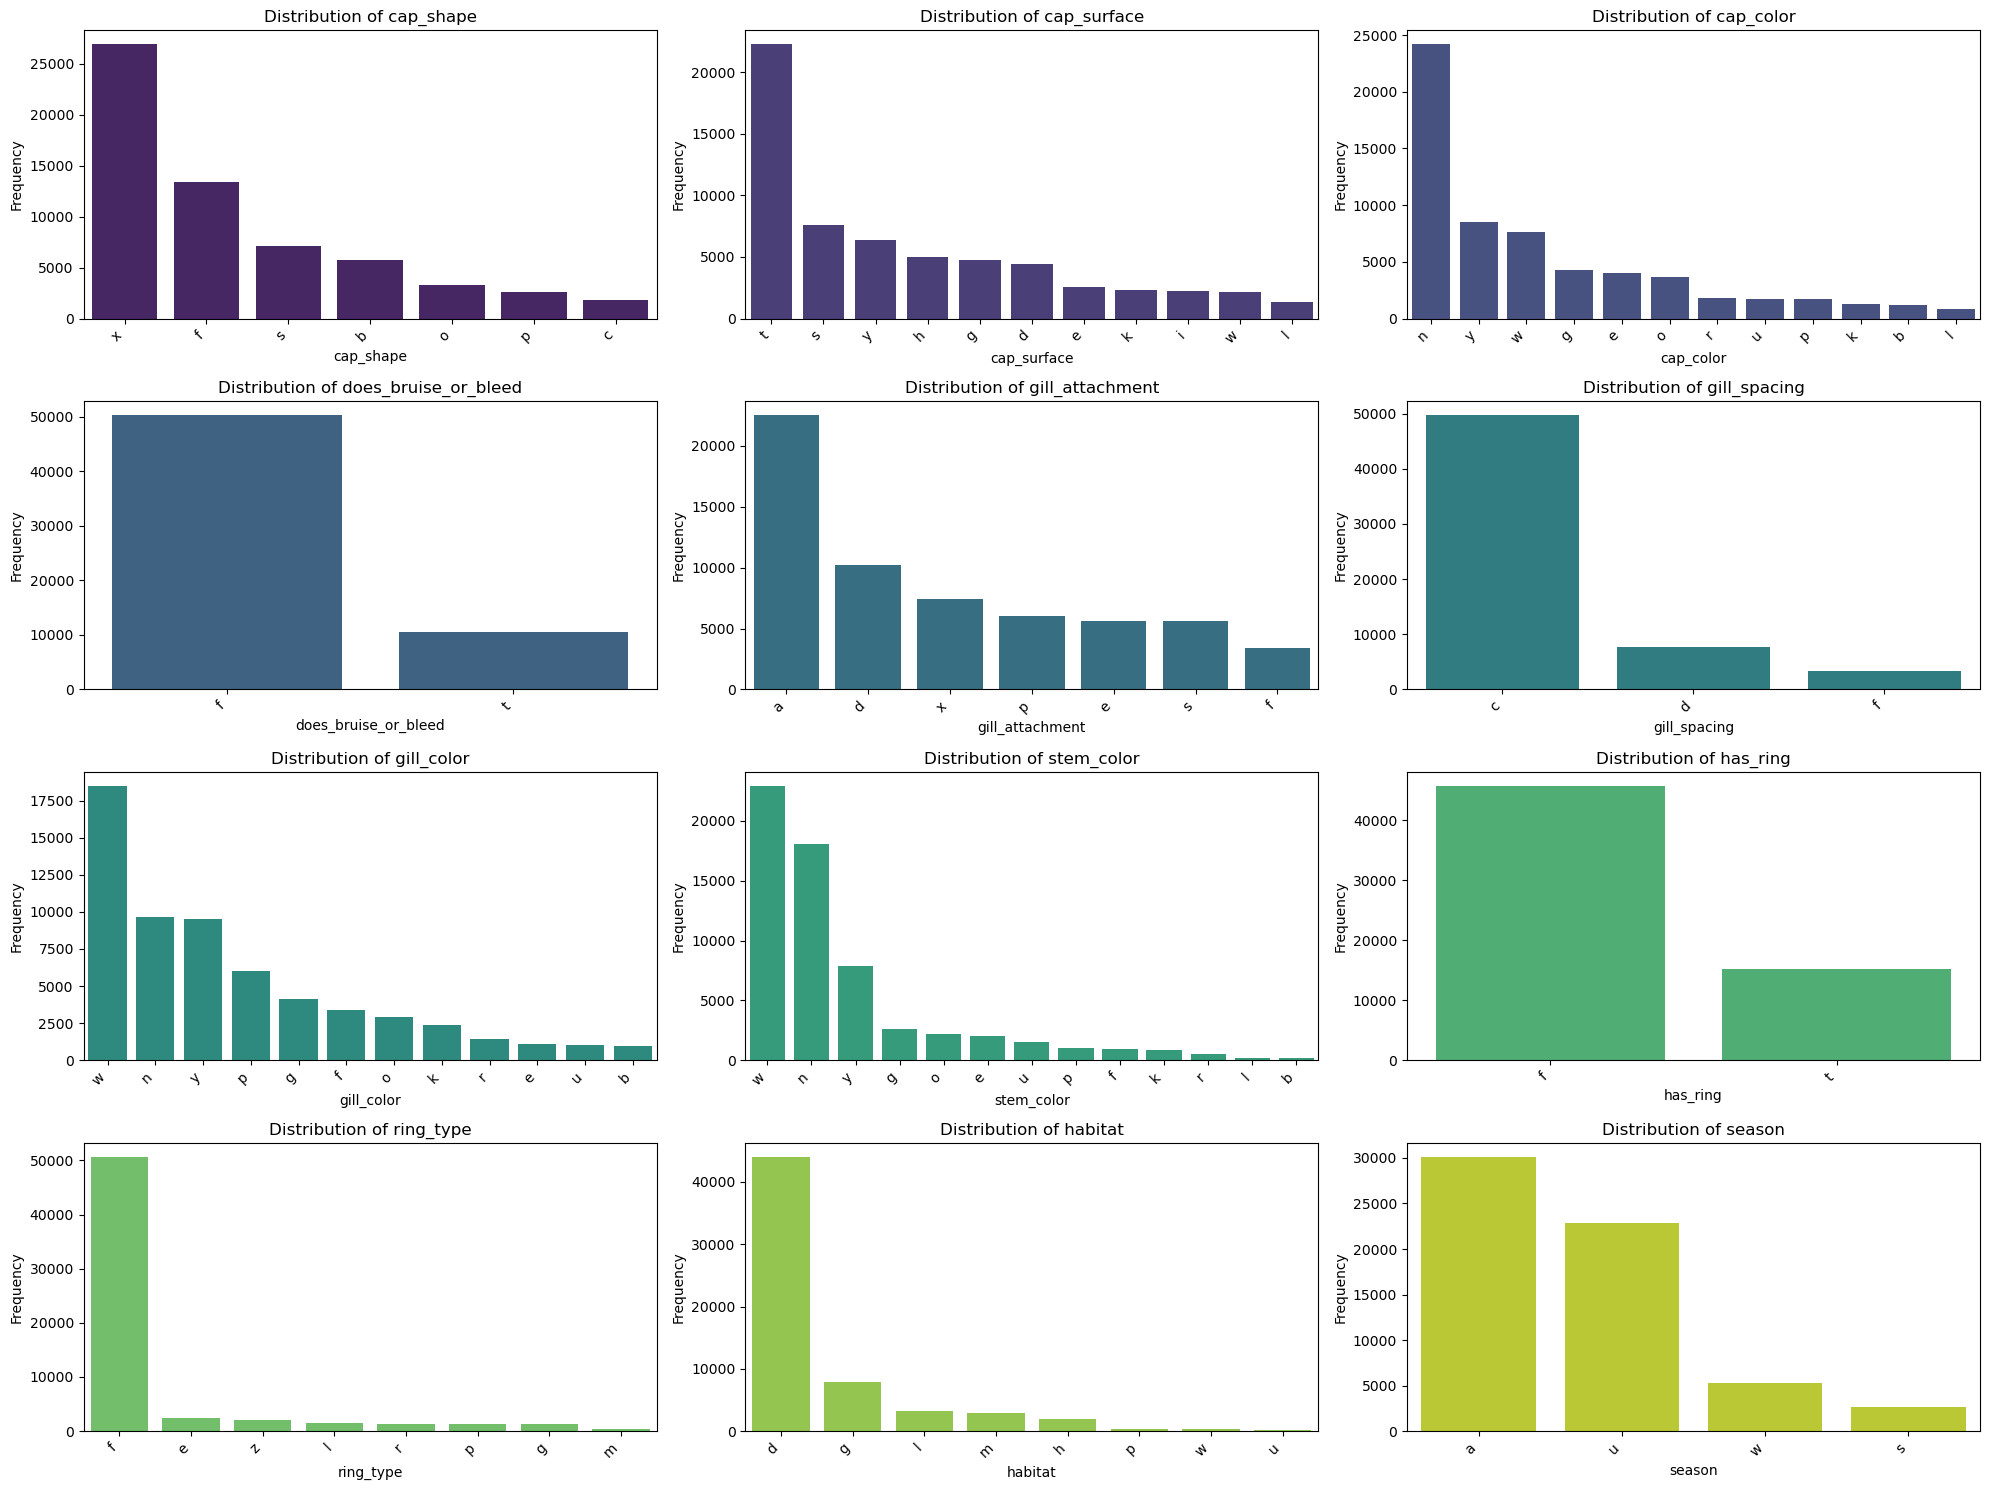

In [23]:
# Listing our categorical and numerical variables:
categorical_features = ['cap_shape', 'cap_surface', 'cap_color', 'does_bruise_or_bleed',
                        'gill_attachment', 'gill_spacing', 'gill_color', 'stem_color',
                        'has_ring', 'ring_type', 'habitat', 'season']
numerical_features = ['cap_diameter', 'stem_height', 'stem_width']

# Creating function to plot categorical distributions with different colors and ordered by frequency:
def plot_categorical_distributions(df, categorical_features):
    plt.figure(figsize=(20, 15))
    colors = sns.color_palette('viridis', len(categorical_features))  # Generate a color palette
    for i, (feature, color) in enumerate(zip(categorical_features, colors), 1):
        plt.subplot(4, 3, i)
        # Calculate frequency counts and sort
        sorted_counts = df[feature].value_counts().sort_values(ascending=False)
        # Plot sorted counts
        sns.countplot(data=df, x=feature, order=sorted_counts.index, palette=[color])
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Applying the function:
plot_categorical_distributions(df_imputed, categorical_features)

### Proportions of Categorical Variables

We will now plot the proportions for each categorical variable. This will provide a more detailed view of how often each category appears in the dataset relative to the total, allowing us to observe the distribution of categories as a percentage.

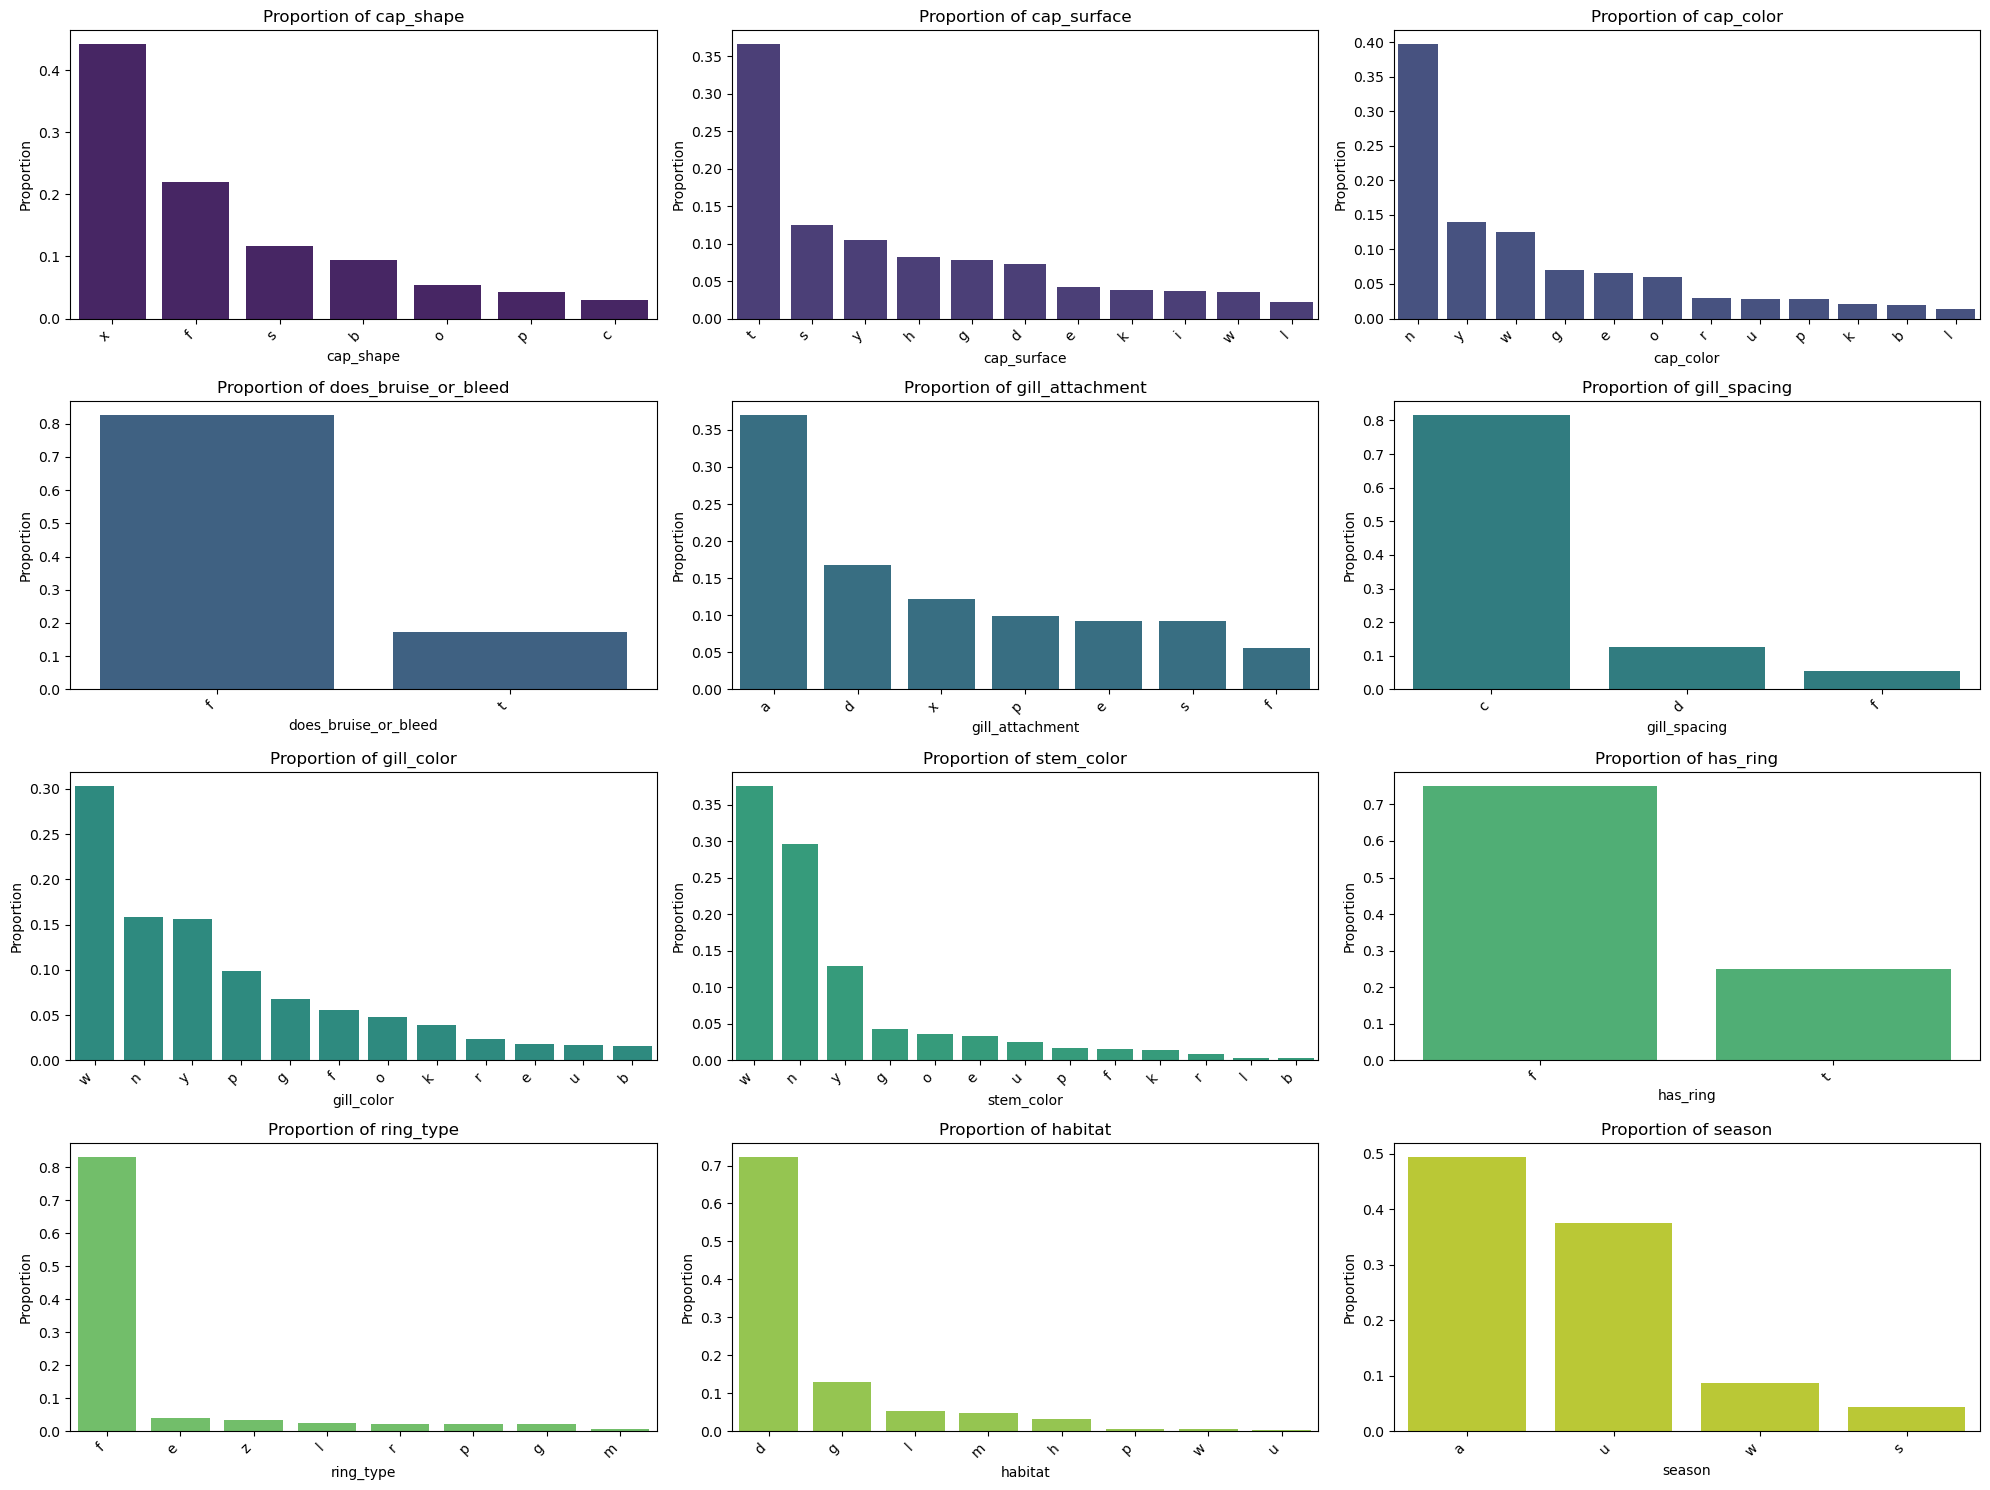

In [24]:
# Listing our categorical and numerical variables:
categorical_features = ['cap_shape', 'cap_surface', 'cap_color', 'does_bruise_or_bleed',
                        'gill_attachment', 'gill_spacing', 'gill_color', 'stem_color',
                        'has_ring', 'ring_type', 'habitat', 'season']
numerical_features = ['cap_diameter', 'stem_height', 'stem_width']

# Creating a function to plot categorical distributions with proportions:
def plot_categorical_proportions(df, categorical_features):
    plt.figure(figsize=(20, 15))
    colors = sns.color_palette('viridis', len(categorical_features))  # Generate a color palette
    for i, (feature, color) in enumerate(zip(categorical_features, colors), 1):
        plt.subplot(4, 3, i)
        # Calculate proportions
        proportions = df[feature].value_counts(normalize=True).round(4)
        # Plot proportions
        sns.barplot(x=proportions.index, y=proportions.values, palette=[color])
        plt.title(f'Proportion of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Proportion')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Applying the function:
plot_categorical_proportions(df_imputed, categorical_features)

Now we will provide a formatted list of all the values, for each categorical varaible, from the above plots, for clarity.

In [25]:
# Looping through each categorical feature, generating frequency counts and proportions, and then printing them: 
for feature in categorical_features:
    # Frequency counts and proportions
    counts = df_imputed[feature].value_counts()
    proportions = df_imputed[feature].value_counts(normalize=True).round(2)
    
    # Print frequency counts and proportions
    print(f"Frequency counts for {feature}:")
    print(counts)
    print(f"\nProportions for {feature}:")
    print(proportions)
    print("\n" + "-"*50 + "\n")

Frequency counts for cap_shape:
cap_shape
x    26932
f    13404
s     7164
b     5694
o     3316
p     2598
c     1815
Name: count, dtype: int64

Proportions for cap_shape:
cap_shape
x    0.44
f    0.22
s    0.12
b    0.09
o    0.05
p    0.04
c    0.03
Name: proportion, dtype: float64

--------------------------------------------------

Frequency counts for cap_surface:
cap_surface
t    22304
s     7580
y     6341
h     4974
g     4722
d     4432
e     2584
k     2303
i     2225
w     2150
l     1308
Name: count, dtype: int64

Proportions for cap_surface:
cap_surface
t    0.37
s    0.12
y    0.10
h    0.08
g    0.08
d    0.07
e    0.04
k    0.04
i    0.04
w    0.04
l    0.02
Name: proportion, dtype: float64

--------------------------------------------------

Frequency counts for cap_color:
cap_color
n    24205
y     8541
w     7649
g     4312
e     4035
o     3653
r     1779
u     1709
p     1703
k     1279
b     1230
l      828
Name: count, dtype: int64

Proportions for cap_color:
ca

Finally, based on the histograms and proportions, we will provide insights and observations about the categorical variables, highlighting any notable patterns or imbalances in the data.

##### Observations on the Distributions and Proportions of the Categorical Variables

***cap_shape***:

* The *x* category is the most common cap shape with over 25,000 instances.
* The *s* category is the second most common but significantly less frequent than *x*.
* Other categories like *b*, *f*, *c*, *u*, and *o* have relatively few instances
* *Highly skewed distribution*: The distribution is heavily skewed towards *x*, indicating that this particular cap shape is much more prevalent in the dataset compared to others.
<br />

***cap_surface***:

* The *r* category is the most common cap surface, with over 20,000 instances.
* The *y* and *s* categories are also relatively common but less frequent than *r*.
* Other categories like *g*, *e*, *t*, *w*, and *k* have fewer instances, with *k* being the least common.
* *Skewed distribution*: The distribution is skewed towards *r*, with a moderate presence of *y* and *s*. The other categories are less common.
<br />

***cap_color***:

* The *n* category is the most common cap color, with about 25,000 instances.
* The *g* and *b* categories are the next most common, but they have significantly fewer instances compared to *n*.
* Other colors like *y*, *w*, *k*, *p*, *e*, *o*, *l*, *t*, and *c* are less common, with *c* being the least frequent.
* *Highly skewed distribution*: The distribution is heavily skewed towards *n*, indicating that this cap color is predominant in the dataset. The other colors are present in much smaller numbers.
<br />

***does_bruise_or_bleed***:

* The *f* category (indicating no bruising or bleeding) is the most common, with a significantly higher count than the *t* category (indicating bruising or bleeding).
* *Skewed distribution*: The variable is heavily skewed towards *f*, indicating that most mushrooms in the dataset do not bruise or bleed.
<br />

***gill_attachment***:

* The *e* category is the most common type of gill attachment.
* The *a*, *n*, and *x* categories are moderately frequent, with *l* being the least common.
* *Moderate skewness*: The distribution is skewed towards *e*, but other categories also have a noticeable presence.
<br />

***gill_spacing***:

* The *c* category is overwhelmingly the most common gill spacing type.
* The *w*, *u*, and *t* categories are much less common.
* *Highly skewed distribution*: The distribution is heavily skewed towards *c*, indicating that this gill spacing type is predominant.
<br />

***gill_color***:

* The *w* category is the most common gill color, followed by *n* and *g*.
* Other colors like *b*, *p*, *l*, *e*, *t*, *k*, *y*, and *u* are present in smaller numbers, with *u* being the least common.
* *Moderate skewness*: The distribution shows a skew towards *w*, but there is a reasonable spread among other categories.
<br />

***stem_color***:

* The *w* category is the most common stem color by a significant margin.
* Other colors like *e*, *g*, *b*, *p*, *l*, *n*, and *o* have fewer instances, with *o* being the least common.
* *Highly skewed distribution*: The distribution is heavily skewed towards *w*, indicating a predominance of this stem color.
<br />

***has_ring***:

* The *t* category (indicating presence of a ring) is much more common than the *f* category (indicating absence of a ring).
* *Skewed distribution*: The variable is skewed towards *t*, indicating most mushrooms have a ring.
<br />

***ring_type***:

* The *e* category is the most common ring type by a significant margin.
* Other ring types like *o*, *b*, *u*, *g*, *e*, *d*, and *n* are much less common.
* *Highly skewed distribution*: The distribution is heavily skewed towards *e*, with other types being relatively rare.
<br />

***habitat***:

* The *d* category is the most common habitat.
* Other habitats like *e*, *p*, *g*, *l*, *m*, and *u* are much less common, with *m* being the least common.
* *Highly skewed distribution*: The distribution is heavily skewed towards *d*, indicating this habitat is predominant.
<br />

***season***:

* The *a* category is the most common season, followed by *s* and *w*.

### Distribution of Classes within Categorical Variables

In this section, we will explore the distribution of the target variable, 'class', within each categorical feature. By visualizing how the classes (edible and poisonous) are distributed across the different levels of each categorical feature, we can gain insights into the relationships between the features and the target variable. 

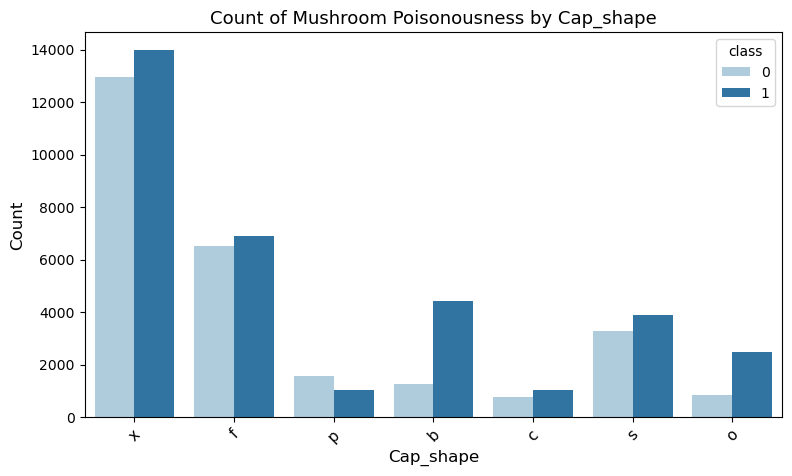


Frequency count of poisonousness within each cap_shape group:
class          0      1
cap_shape              
b           1258   4436
c            774   1041
f           6502   6902
o            825   2491
p           1567   1031
s           3295   3869
x          12960  13972

Proportions of poisonousness within each cap_shape group:
class         0     1
cap_shape            
b          0.22  0.78
c          0.43  0.57
f          0.49  0.51
o          0.25  0.75
p          0.60  0.40
s          0.46  0.54
x          0.48  0.52

--------------------------------------------------



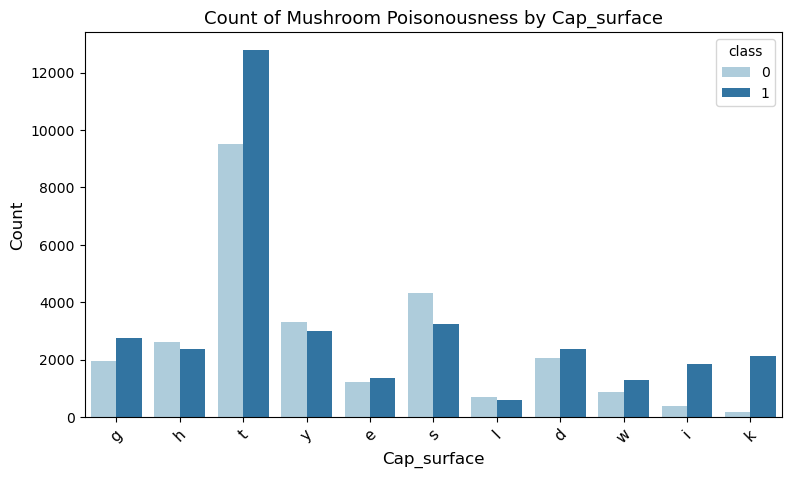


Frequency count of poisonousness within each cap_surface group:
class           0      1
cap_surface             
d            2049   2383
e            1236   1348
g            1964   2758
h            2617   2357
i             369   1856
k             181   2122
l             706    602
s            4338   3242
t            9530  12774
w             862   1288
y            3329   3012

Proportions of poisonousness within each cap_surface group:
class           0     1
cap_surface            
d            0.46  0.54
e            0.48  0.52
g            0.42  0.58
h            0.53  0.47
i            0.17  0.83
k            0.08  0.92
l            0.54  0.46
s            0.57  0.43
t            0.43  0.57
w            0.40  0.60
y            0.52  0.48

--------------------------------------------------



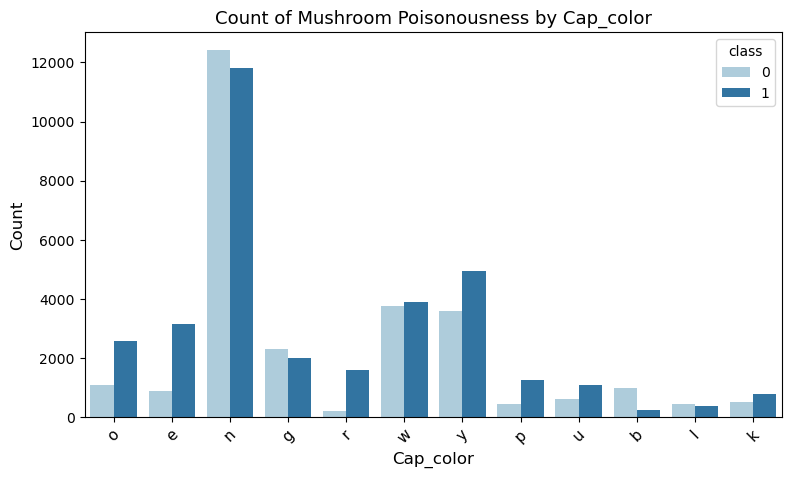


Frequency count of poisonousness within each cap_color group:
class          0      1
cap_color              
b            974    256
e            880   3155
g           2297   2015
k            501    778
l            452    376
n          12407  11798
o           1071   2582
p            449   1254
r            198   1581
u            611   1098
w           3750   3899
y           3591   4950

Proportions of poisonousness within each cap_color group:
class         0     1
cap_color            
b          0.79  0.21
e          0.22  0.78
g          0.53  0.47
k          0.39  0.61
l          0.55  0.45
n          0.51  0.49
o          0.29  0.71
p          0.26  0.74
r          0.11  0.89
u          0.36  0.64
w          0.49  0.51
y          0.42  0.58

--------------------------------------------------



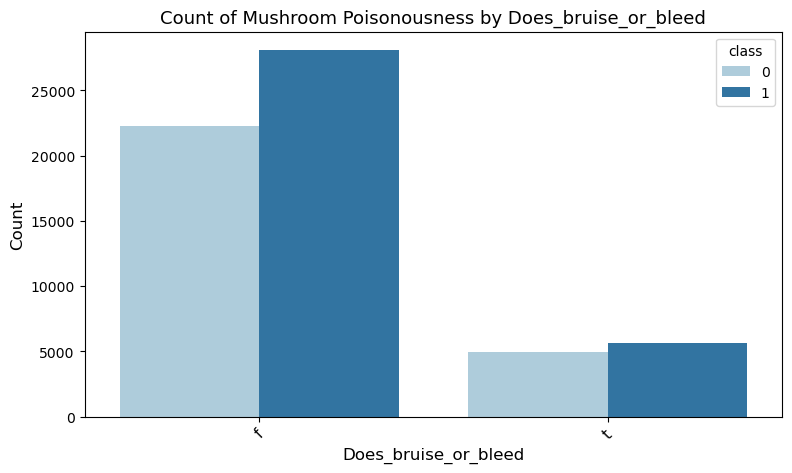


Frequency count of poisonousness within each does_bruise_or_bleed group:
class                     0      1
does_bruise_or_bleed              
f                     22239  28094
t                      4942   5648

Proportions of poisonousness within each does_bruise_or_bleed group:
class                    0     1
does_bruise_or_bleed            
f                     0.44  0.56
t                     0.47  0.53

--------------------------------------------------



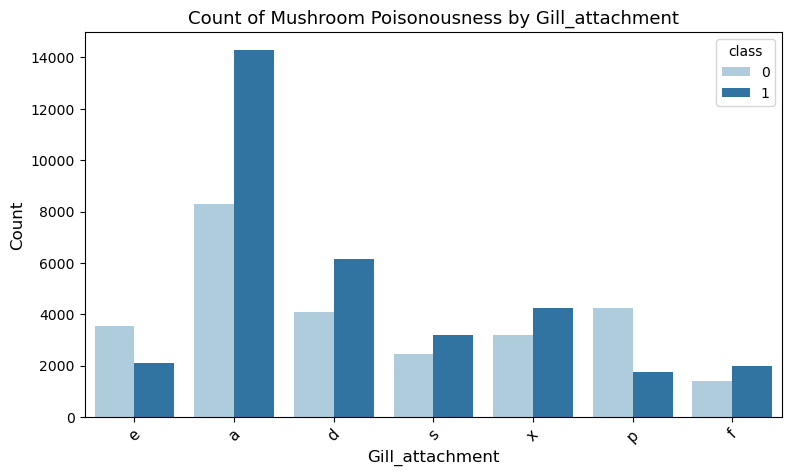


Frequency count of poisonousness within each gill_attachment group:
class               0      1
gill_attachment             
a                8275  14277
d                4080   6167
e                3530   2118
f                1412   2002
p                4236   1765
s                2471   3177
x                3177   4236

Proportions of poisonousness within each gill_attachment group:
class               0     1
gill_attachment            
a                0.37  0.63
d                0.40  0.60
e                0.62  0.38
f                0.41  0.59
p                0.71  0.29
s                0.44  0.56
x                0.43  0.57

--------------------------------------------------



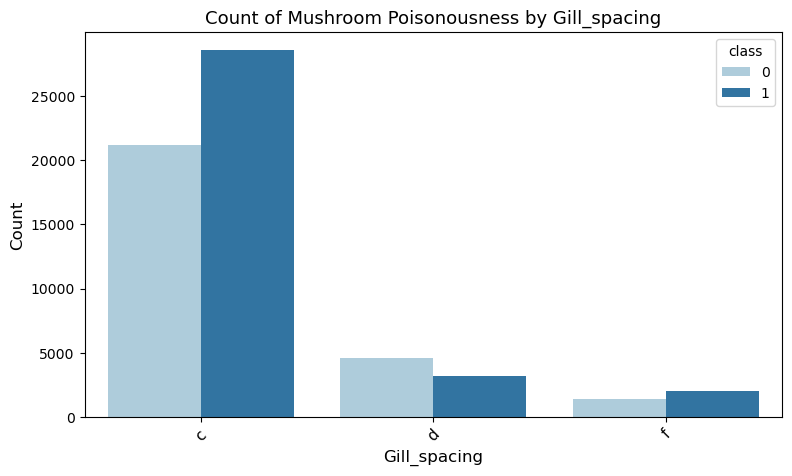


Frequency count of poisonousness within each gill_spacing group:
class             0      1
gill_spacing              
c             21180  28564
d              4589   3176
f              1412   2002

Proportions of poisonousness within each gill_spacing group:
class            0     1
gill_spacing            
c             0.43  0.57
d             0.59  0.41
f             0.41  0.59

--------------------------------------------------



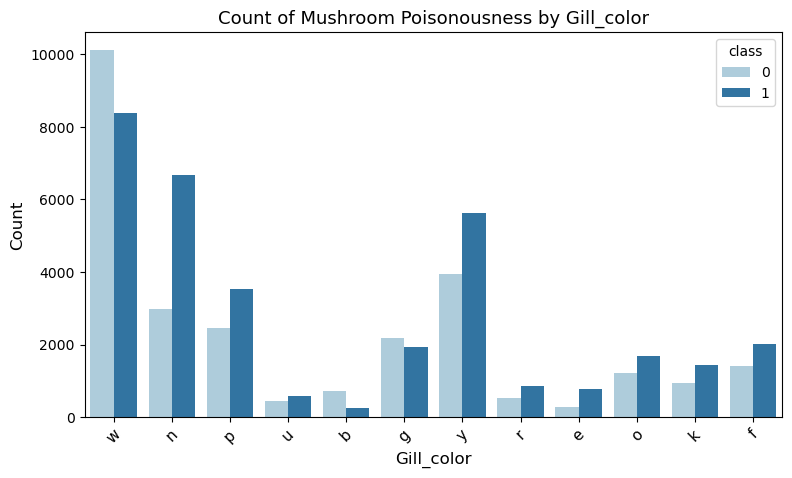


Frequency count of poisonousness within each gill_color group:
class           0     1
gill_color             
b             710   244
e             279   787
f            1412  2002
g            2175  1943
k             928  1447
n            2983  6662
o            1223  1686
p            2465  3518
r             531   868
u             438   585
w           10107  8385
y            3930  5615

Proportions of poisonousness within each gill_color group:
class          0     1
gill_color            
b           0.74  0.26
e           0.26  0.74
f           0.41  0.59
g           0.53  0.47
k           0.39  0.61
n           0.31  0.69
o           0.42  0.58
p           0.41  0.59
r           0.38  0.62
u           0.43  0.57
w           0.55  0.45
y           0.41  0.59

--------------------------------------------------



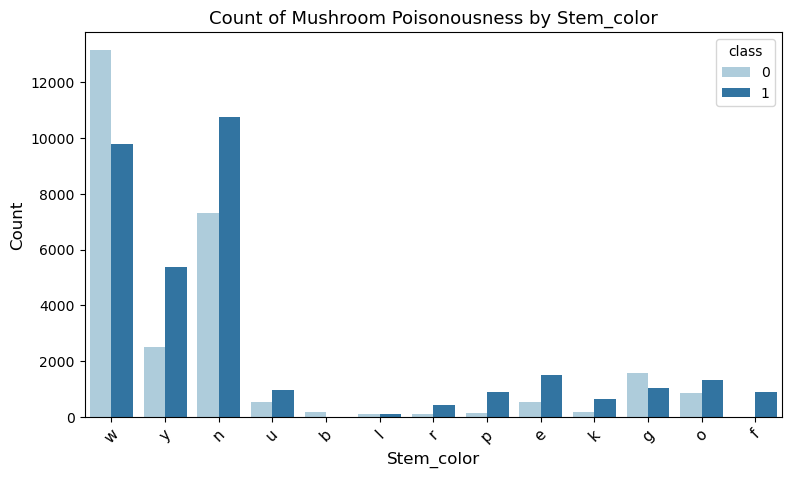


Frequency count of poisonousness within each stem_color group:
class           0      1
stem_color              
b             173      0
e             538   1511
f               0    915
g            1594   1032
k             189    648
l             105    121
n            7308  10755
o             858   1329
p             132    893
r             114    428
u             533    957
w           13143   9783
y            2494   5370

Proportions of poisonousness within each stem_color group:
class          0     1
stem_color            
b           1.00  0.00
e           0.26  0.74
f           0.00  1.00
g           0.61  0.39
k           0.23  0.77
l           0.46  0.54
n           0.40  0.60
o           0.39  0.61
p           0.13  0.87
r           0.21  0.79
u           0.36  0.64
w           0.57  0.43
y           0.32  0.68

--------------------------------------------------



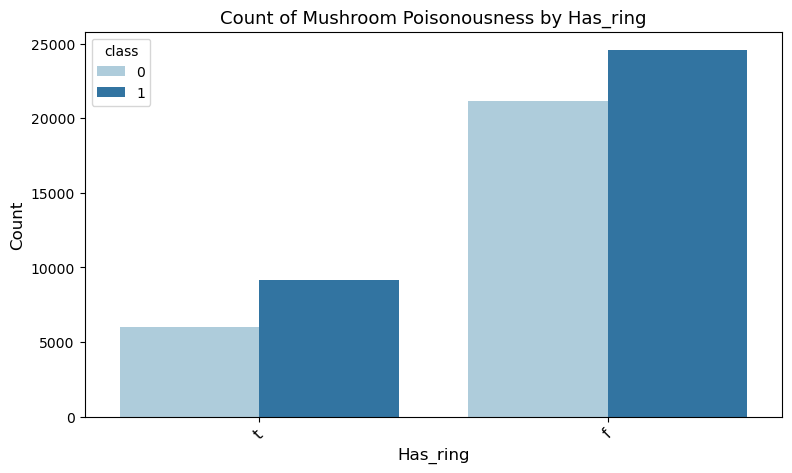


Frequency count of poisonousness within each has_ring group:
class         0      1
has_ring              
f         21180  24576
t          6001   9166

Proportions of poisonousness within each has_ring group:
class        0     1
has_ring            
f         0.46  0.54
t         0.40  0.60

--------------------------------------------------



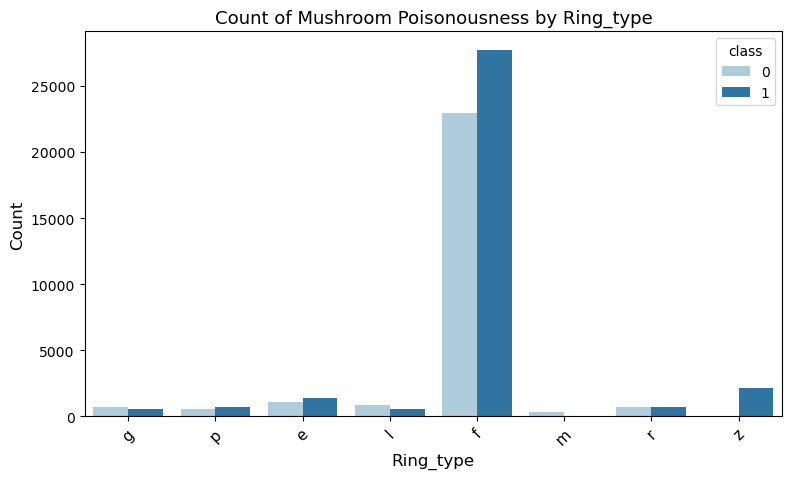


Frequency count of poisonousness within each ring_type group:
class          0      1
ring_type              
e           1059   1376
f          22945  27741
g            706    534
l            877    550
m            353      0
p            548    717
r            693    706
z              0   2118

Proportions of poisonousness within each ring_type group:
class         0     1
ring_type            
e          0.43  0.57
f          0.45  0.55
g          0.57  0.43
l          0.61  0.39
m          1.00  0.00
p          0.43  0.57
r          0.50  0.50
z          0.00  1.00

--------------------------------------------------



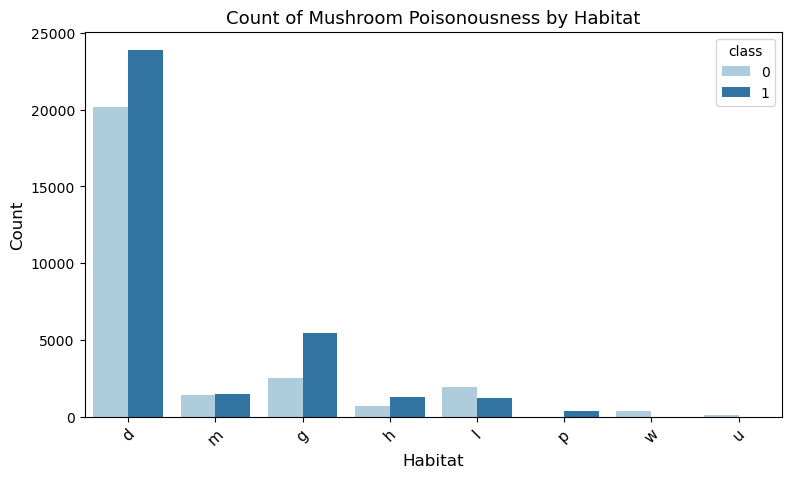


Frequency count of poisonousness within each habitat group:
class        0      1
habitat              
d        20163  23900
g         2489   5454
h          696   1305
l         1938   1230
m         1427   1493
p            0    360
u          115      0
w          353      0

Proportions of poisonousness within each habitat group:
class       0     1
habitat            
d        0.46  0.54
g        0.31  0.69
h        0.35  0.65
l        0.61  0.39
m        0.49  0.51
p        0.00  1.00
u        1.00  0.00
w        1.00  0.00

--------------------------------------------------



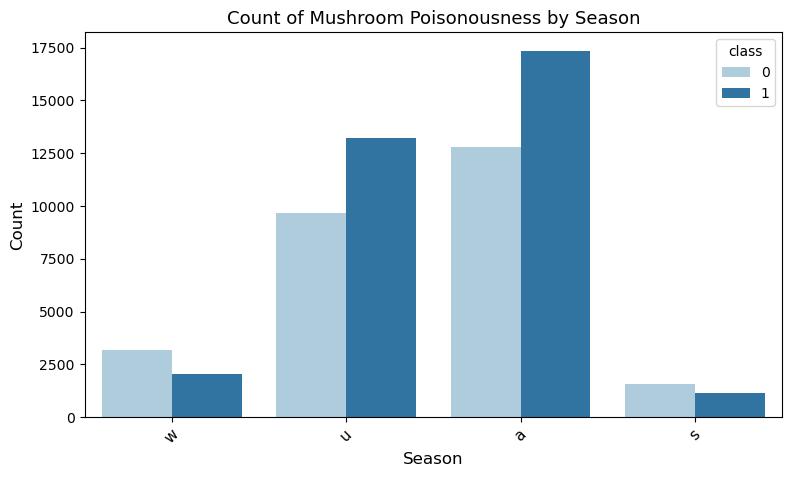


Frequency count of poisonousness within each season group:
class       0      1
season              
a       12785  17356
s        1553   1146
u        9647  13203
w        3196   2037

Proportions of poisonousness within each season group:
class      0     1
season            
a       0.42  0.58
s       0.58  0.42
u       0.42  0.58
w       0.61  0.39

--------------------------------------------------



In [26]:
# Listing the categorical variables:
categorical_features = ['cap_shape', 'cap_surface', 'cap_color', 'does_bruise_or_bleed',
                        'gill_attachment', 'gill_spacing', 'gill_color', 'stem_color',
                        'has_ring', 'ring_type', 'habitat', 'season']

# Creating the function to plot count plots and display frequency and proportion tables:
def plot_categorical_distributions_by_class(df, categorical_features):
    paired_palette = sns.color_palette("Paired")
    
    for feature in categorical_features:
        plt.figure(figsize=(9, 5))
        sns.countplot(x=feature, hue='class', data=df, palette=paired_palette)
        plt.title(f'Count of Mushroom Poisonousness by {feature.capitalize()}', fontsize=13)
        plt.xlabel(feature.capitalize(), fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(fontsize=11, rotation=45)
        plt.show()

        # Calculating and printing values and proportions
        poison_counts = df.groupby([feature, 'class']).size().unstack(fill_value=0)
        print(f"\nFrequency count of poisonousness within each {feature} group:")
        print(poison_counts)

        poison_proportions = poison_counts.div(poison_counts.sum(axis=1), axis=0).round(2)
        print(f"\nProportions of poisonousness within each {feature} group:")
        print(poison_proportions)
        print("\n" + "-"*50 + "\n")
        
# Applying the function:
plot_categorical_distributions_by_class(df_imputed, categorical_features)

##### Observations of the Distribution of Classes within Categorical Variables


***Highly Skewed Categories***

* Categories like *k* in *cap_surface*, *r* in *cap_color*, and *e* in *gill_color* show a very high proportion of poisonous mushrooms, indicating these might be strong indicators of poisonous mushrooms.


***Balanced Categories***

* Some categories, such as *f* in *cap_shape* and *h* in *cap_surface*, are almost equally distributed, indicating these features might not be as strong indicators on their own.


***Potential Indicators of Edibility***

* Categories like *p* in *cap_shape* and *b* in *cap_color* show a higher proportion of edible mushrooms, suggesting these might be indicators of non-poisonous mushrooms.

### Distributions and KDE of Continuous Variables

In this section, we will plot the distributions and Kernel Density Estimates (KDE) for each continuous variable. These plots will help us understand the shape of the data distribution, detect the presence of any outliers, and examine the spread of the data.

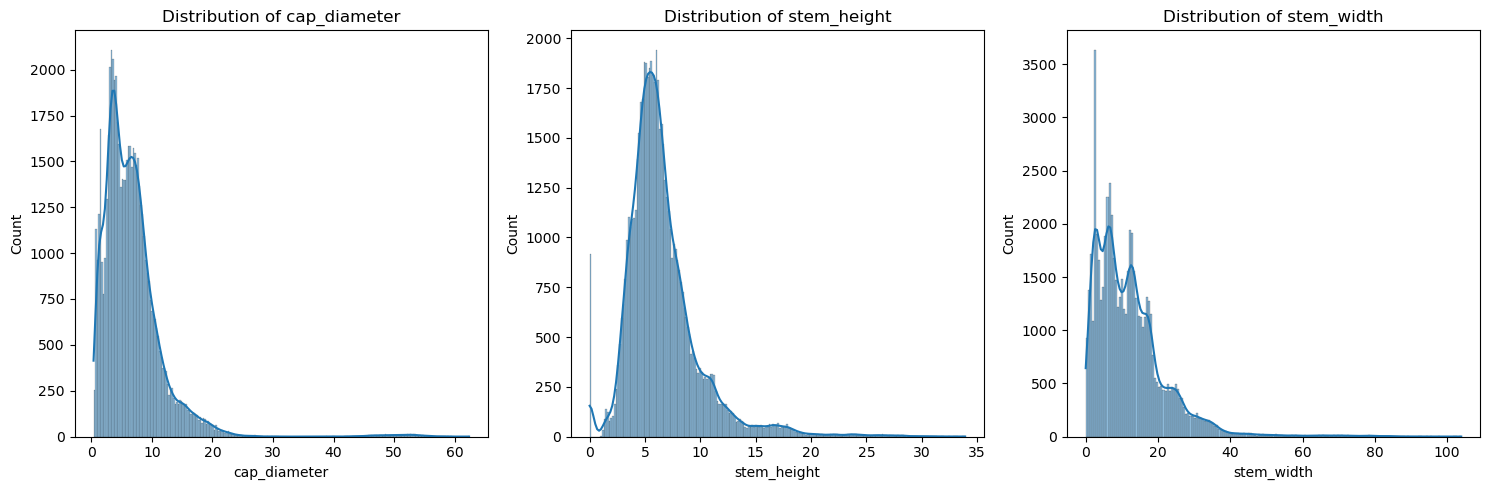

In [27]:
# Listing our numerical variables: 
numerical_features = ['cap_diameter', 'stem_height', 'stem_width']

# Replace infinite values with NaN
df_imputed[numerical_features] = df_imputed[numerical_features].replace([np.inf, -np.inf], np.nan)

# Handle NaN values (e.g., removing them or filling with a specific value)
df_imputed = df_imputed.dropna(subset=numerical_features)

# Ensure no infinite values are present
assert not np.isinf(df_imputed[numerical_features].values).any(), "Data contains infinite values!"

# Function to plot numerical distributions
def plot_numerical_distributions(df, numerical_features):
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(1, 3, i)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

plot_numerical_distributions(df_imputed, numerical_features)

##### Observations on the Distributions of the Continuous Variables 

***cap_diameter***:

* The distribution is heavily right-skewed.
* Most values are concentrated between 0 and 20, with a long tail extending up to around 60.
* *Skewed distribution*: Indicates the presence of many small cap diameters with a few larger outliers.
<br />

***stem_height***:

* This distribution is also right-skewed but less so than cap_diameter.
* Most values are concentrated between 0 and 15, with a peak around 5-10, and a tail extending up to around 35.
* *Moderate skewness*: Indicates that most mushrooms have a moderate stem height, with some taller outliers.
<br />

***stem_width***:

* The distribution is right-skewed with most values concentrated between 0 and 10.
* There is a long tail extending up to around 100, with a few extreme outliers.
* *Skewed distribution*: Indicates the presence of many narrow stems with a few much wider outliers.

### Distribution and Box Plot by Class of Continuous Variables

We will further analyze the continuous variables by plotting their distributions and box plots, segmented by the class variable. This will allow us to compare the distributions of numerical variables across different classes and identify any significant differences or patterns.

<Figure size 1400x600 with 0 Axes>

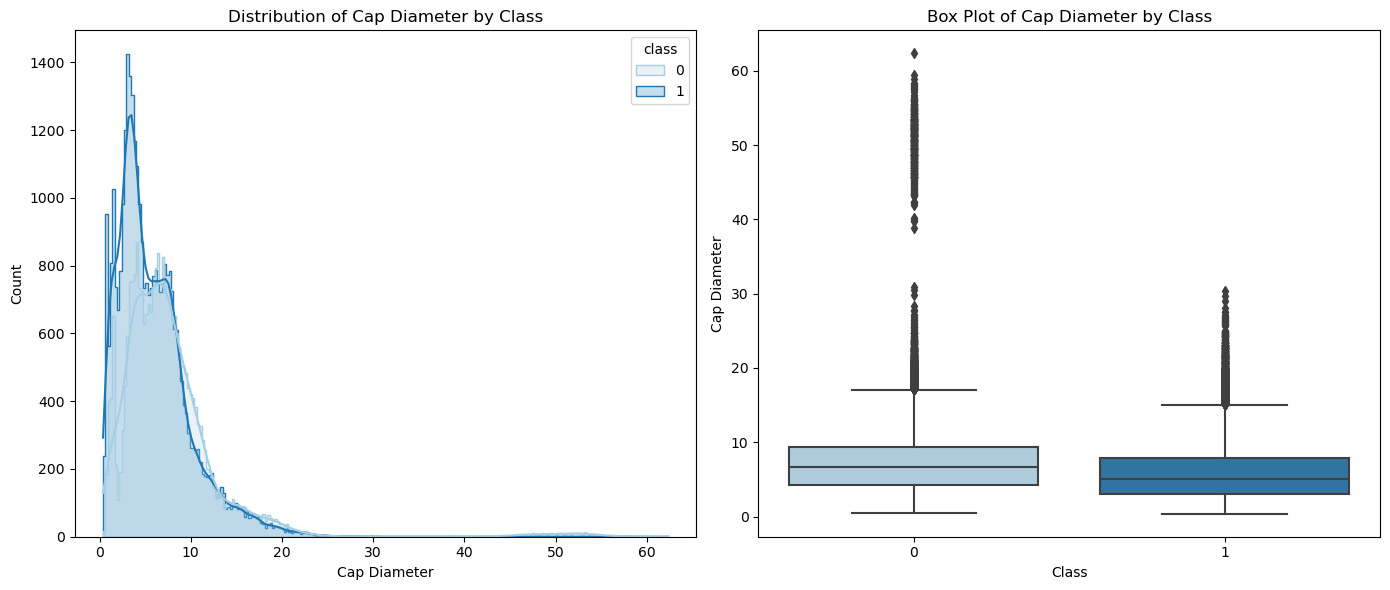


Summary statistics for cap_diameter by class:
         count  mean   std   min   25%   50%   75%    max
class                                                    
0      27181.0  7.80  6.37  0.53  4.29  6.71  9.41  62.34
1      33742.0  5.89  3.97  0.38  3.05  5.00  7.86  30.34

--------------------------------------------------



In [28]:
# Setting the size of the figure
plt.figure(figsize=(14, 6))

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram
sns.histplot(data=df_imputed, x='cap_diameter', hue='class', kde=True, ax=axes[0], palette="Paired", element="step")
axes[0].set_title('Distribution of Cap Diameter by Class')
axes[0].set_xlabel('Cap Diameter')
axes[0].set_ylabel('Count')

# Box Plot
sns.boxplot(data=df_imputed, x='class', y='cap_diameter', ax=axes[1], palette="Paired")
axes[1].set_title('Box Plot of Cap Diameter by Class')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Cap Diameter')

# Adjust layout
plt.tight_layout()
plt.show()

# Summary Statistics
print("\nSummary statistics for cap_diameter by class:")
print(df_imputed.groupby('class')['cap_diameter'].describe().round(2))
print("\n" + "-"*50 + "\n")

<Figure size 1400x600 with 0 Axes>

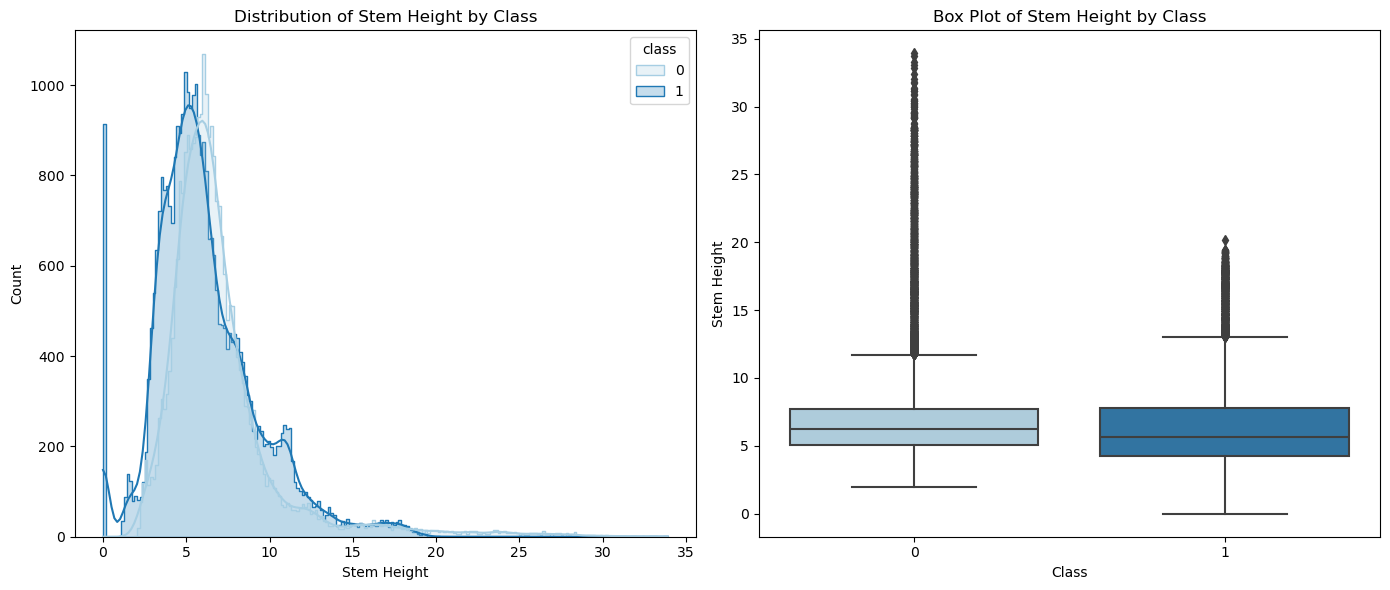


Summary statistics for stem_height by class:
         count  mean   std  min   25%   50%   75%    max
class                                                   
0      27181.0  7.04  3.58  2.0  5.08  6.24  7.74  33.92
1      33742.0  6.24  3.12  0.0  4.24  5.64  7.76  20.19

--------------------------------------------------



In [29]:
# Setting the size of the figure
plt.figure(figsize=(14, 6))

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram
sns.histplot(data=df_imputed, x='stem_height', hue='class', kde=True, ax=axes[0], palette="Paired", element="step")
axes[0].set_title('Distribution of Stem Height by Class')
axes[0].set_xlabel('Stem Height')
axes[0].set_ylabel('Count')

# Box Plot
sns.boxplot(data=df_imputed, x='class', y='stem_height', ax=axes[1], palette="Paired")
axes[1].set_title('Box Plot of Stem Height by Class')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Stem Height')

# Adjust layout
plt.tight_layout()
plt.show()

# Summary Statistics
print("\nSummary statistics for stem_height by class:")
print(df_imputed.groupby('class')['stem_height'].describe().round(2))
print("\n" + "-"*50 + "\n")

<Figure size 1400x600 with 0 Axes>

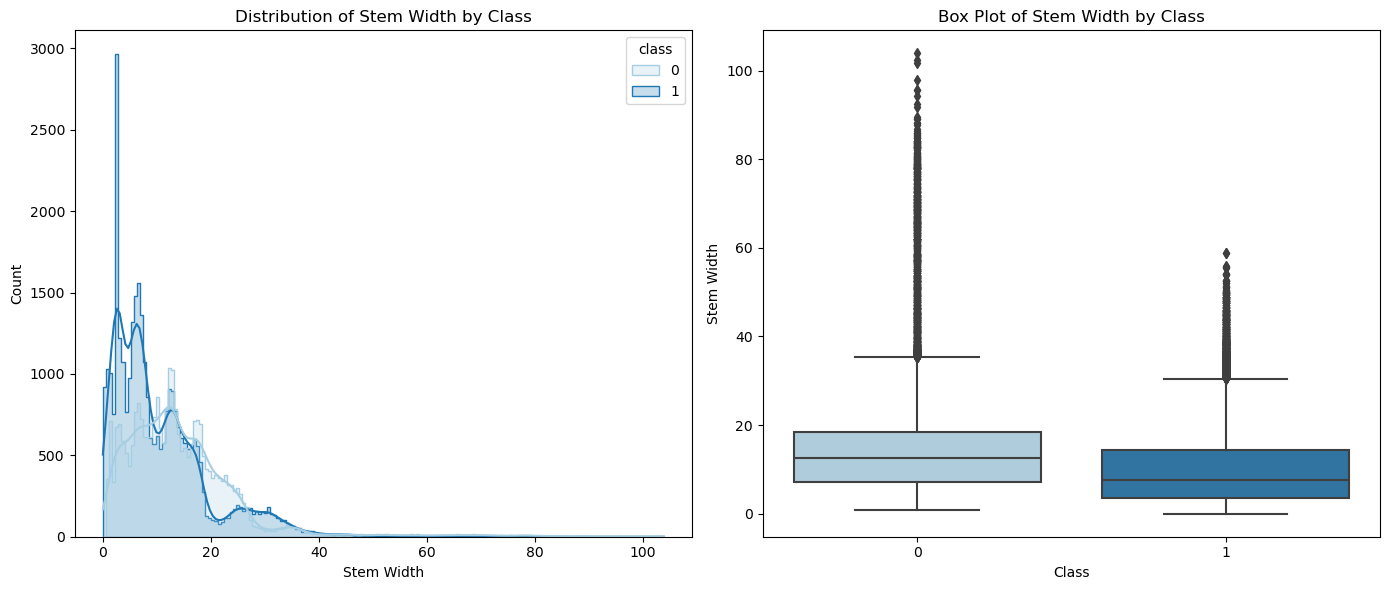


Summary statistics for stem_width by class:
         count   mean    std   min   25%    50%    75%     max
class                                                         
0      27181.0  14.36  11.04  0.74  7.13  12.59  18.39  103.91
1      33742.0  10.42   8.75  0.00  3.61   7.70  14.37   58.95

--------------------------------------------------



In [30]:
# Setting the size of the figure
plt.figure(figsize=(14, 6))

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram
sns.histplot(data=df_imputed, x='stem_width', hue='class', kde=True, ax=axes[0], palette="Paired", element="step")
axes[0].set_title('Distribution of Stem Width by Class')
axes[0].set_xlabel('Stem Width')
axes[0].set_ylabel('Count')

# Box Plot
sns.boxplot(data=df_imputed, x='class', y='stem_width', ax=axes[1], palette="Paired")
axes[1].set_title('Box Plot of Stem Width by Class')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Stem Width')

# Adjust layout
plt.tight_layout()
plt.show()

# Summary Statistics
print("\nSummary statistics for stem_width by class:")
print(df_imputed.groupby('class')['stem_width'].describe().round(2))
print("\n" + "-"*50 + "\n")

##### Observations on the Class Distributions and Outlier Results of the Continuous Variables 

***cap_diameter***

* Distribution: The histogram for cap diameter shows a right-skewed distribution. Most values are concentrated between 0 and 20, with a long tail extending up to around 60.
* Box Plot: The median cap diameter is higher for edible mushrooms compared to poisonous ones. Edible mushrooms have more extreme outliers on the higher end, with values up to 62.34 cm. The interquartile range (IQR) is broader for edible mushrooms, indicating more variability.
* Skewed distribution: Indicates the presence of many small cap diameters with a few larger outliers.
<br />

***stem_height***

* Distribution: The histogram for stem height shows a right-skewed distribution for both classes. Most values are concentrated between 0 and 5 cm, with high peaks at these lower values.
* Box Plot: The median stem height is slightly higher for poisonous mushrooms (class 1) compared to edible mushrooms (class 0). Edible mushrooms have more extreme outliers on the higher end, with values up to 33.92 cm. The interquartile range (IQR) is broader for edible mushrooms, indicating more variability in stem height.
* Skewed Distribution: Indicates the presence of many small stem heights with a few larger outliers.
<br />

***stem_width***

* Distribution: The histogram for stem width shows a right-skewed distribution for both classes. Most values are concentrated between 0 and 10 mm, with a prominent peak at these lower values.
* Box Plot: The median stem width is higher for edible mushrooms (class 0) compared to poisonous mushrooms (class 1). Edible mushrooms have more extreme outliers on the higher end, with values up to 103.91 mm. The interquartile range (IQR) is broader for edible mushrooms, indicating more variability in stem width.
* Skewed Distribution: Indicates the presence of many small stem widths with a few larger outliers.

In summary, many variables have highly skewed distributions, with one category being significantly more common than others.
This skewness indicates potential class imbalance, which could impact model performance.
The numerical variables also exhibit skewness, particularly *cap_diameter* and *stem_width*, which have long tails indicating the presence of outliers.

### Justification for Keeping Outliers

In this analysis, we decided to retain the outliers in the dataset for several reasons:


***Reflecting Real-World Variability***: 

* The outliers in the dataset represent natural variability, particularly in biological data like mushroom characteristics. Removing these data points might lead to a loss of valuable information that reflects real-world conditions.


***Informative Outliers***: 

* Some outliers may provide significant insights into distinguishing features of edible and poisonous mushrooms. For instance, unique cap shapes or colors could be crucial for classification.


***Model Robustness***: 

* The machine learning models used in this analysis, such as Random Forests and Decision Trees, are inherently robust to outliers. These models can effectively manage the variability introduced by outliers without significant impact on their performance.


***Data Integrity***: 

* Preserving the integrity of the original dataset is essential. Arbitrarily removing data points can introduce bias and may not accurately reflect the true nature of the data.


***Consistency***: 

* Our data preprocessing steps, including imputation and transformation, were designed to maintain the original structure of the dataset. Handling outliers separately was not explicitly necessary given the high performance of our models.


***Impact Analysis***: 

* Our model performance metrics indicated high accuracy, suggesting that the presence of outliers did not adversely affect the predictive power. This reinforces the decision to retain outliers in the dataset.


By considering these factors, we ensured that our analysis remained comprehensive and reflective of the true characteristics of the mushroom dataset.

### Justification for Keeping Skewed Distributions in Categorical Data

In this analysis, we decided to retain the skewed distributions of categorical data for several reasons:

***Reflecting True Data Distribution***: 

* The skewed distributions in our categorical data accurately reflect the real-world occurrence of different mushroom characteristics. Altering these distributions could misrepresent the underlying data.


***Model Performance***: 

* Our machine learning models, especially tree-based models like Decision Trees and Random Forests, are capable of handling skewed categorical data effectively. These models can capture the relationships between features and the target variable without requiring balanced categories.


***Information Preservation***: 

* By preserving the original distributions of categorical data, we ensure that all information, including rare but potentially significant categories, is retained. This is crucial for a comprehensive analysis and accurate interpretation of results.


***Impact of Balancing Techniques***: 

* We tested techniques like SMOTE (Synthetic Minority Over-sampling Technique) and mapping rare values to "other," but these did not improve model performance. The models demonstrated high accuracy with the original skewed distributions, indicating that balancing was unnecessary.


***Avoiding Data Loss***: 

* Balancing techniques can sometimes result in data loss or the creation of artificial data points that do not reflect real-world scenarios. By retaining the original distributions, we avoid these issues and maintain the integrity of the data.


***Context-Specific Importance***: 

* The skewed nature of some categories may be meaningful in the context of mushroom classification. Rare characteristics might be critical for distinguishing between edible and poisonous mushrooms. Altering these categories could lead to a loss of important context-specific information.

By considering these factors, we ensured that our analysis remained accurate and reflective of the true characteristics of the mushroom dataset.

***

## Exploratory Data Analysis: Feature Engineering and Dependency Analysis

In this section, we will perform one-hot encoding to transform categorical variables into numerical representations. Additionally, we will analyze dependencies and correlations within our dataset using various statistical methods, including phi coefficient, point-biserial correlation, Pearson correlation for continuous variables, chi-square test for categorical variables, Cramer's V, and Variance Inflation Factor (VIF).

### One-Hot Encoding: Transforming Categorical Variables

To prepare our dataset for further analysis and machine learning, we need to convert categorical variables into numerical representations. One-hot encoding is a commonly used method for this transformation. By converting categorical variables into binary vectors, we can effectively integrate these features into our models. This process ensures that our machine learning algorithms can interpret and utilize the categorical data effectively. In this section, we will apply one-hot encoding to our dataset, transforming the categorical variables into numerical format.

In [31]:
# Verifying and strip leading/trailing spaces in column names:
df_imputed.columns = df_imputed.columns.str.strip()

# Identifying categorical and numerical features:
categorical_features = df_imputed.select_dtypes(include=['object']).columns.drop('class')
numeric_features = df_imputed.select_dtypes(include=['float64', 'int64']).columns

# Initializing the ColumnTransformer with OneHotEncoder:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'  # Dropping any columns not specified in transformers
)

# Fitting and transforming the data:
X_transformed = preprocessor.fit_transform(df_imputed.drop(columns=['class']))

# Getting feature names after one-hot encoding:
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Creating new column names with numeric and one-hot encoded feature names:
new_column_names = list(numeric_features) + list(ohe_feature_names)

# Creating a new DataFrame with transformed features:
df_transformed = pd.DataFrame(X_transformed, columns=new_column_names)

# Explicitly casting the one-hot encoded columns to int32:
for col in ohe_feature_names:
    df_transformed[col] = df_transformed[col].astype(np.int32)

# Adding the target variable back to the transformed DataFrame and converting to int:
df_transformed['class'] = df_imputed['class'].astype(int)

# Verifying data types of the transformed DataFrame:
print(df_transformed.dtypes)

cap_diameter    float64
stem_height     float64
stem_width      float64
cap_shape_c       int32
cap_shape_f       int32
                 ...   
habitat_w         int32
season_s          int32
season_u          int32
season_w          int32
class             int32
Length: 81, dtype: object


In [32]:
# Inspecting the columns of the transformed DataFrame:
print("Columns in the transformed DataFrame:")
print(df_transformed.columns)

# Gettining information on the transformed DataFrame:
df_transformed.info()

Columns in the transformed DataFrame:
Index(['cap_diameter', 'stem_height', 'stem_width', 'cap_shape_c',
       'cap_shape_f', 'cap_shape_o', 'cap_shape_p', 'cap_shape_s',
       'cap_shape_x', 'cap_surface_e', 'cap_surface_g', 'cap_surface_h',
       'cap_surface_i', 'cap_surface_k', 'cap_surface_l', 'cap_surface_s',
       'cap_surface_t', 'cap_surface_w', 'cap_surface_y', 'cap_color_e',
       'cap_color_g', 'cap_color_k', 'cap_color_l', 'cap_color_n',
       'cap_color_o', 'cap_color_p', 'cap_color_r', 'cap_color_u',
       'cap_color_w', 'cap_color_y', 'does_bruise_or_bleed_t',
       'gill_attachment_d', 'gill_attachment_e', 'gill_attachment_f',
       'gill_attachment_p', 'gill_attachment_s', 'gill_attachment_x',
       'gill_spacing_d', 'gill_spacing_f', 'gill_color_e', 'gill_color_f',
       'gill_color_g', 'gill_color_k', 'gill_color_n', 'gill_color_o',
       'gill_color_p', 'gill_color_r', 'gill_color_u', 'gill_color_w',
       'gill_color_y', 'stem_color_e', 'stem_color_f'

The one-hot encoding process was successfully completed, transforming our categorical variables into a numerical format suitable for machine learning. With our dataset now fully prepared, we can proceed to the multivariate analysis to explore dependencies and correlations between the features

### $\varphi$ Coefficient for Binary Variables

In this section, we will calculate the $\varphi$ Coefficient to measure the correlation between binary variables, including the target variable *class*. The $\varphi$ Coefficient is particularly useful for binary data as it captures the strength and direction of the association between two binary variables.

We have set a threshold of 0.7 for the $\varphi$ Coefficient, as it is a reasonable cutoff to identify strong correlations in biological datasets. A threshold of 0.7 helps us pinpoint significant relationships without being overly restrictive, ensuring that we capture important dependencies while minimizing noise.

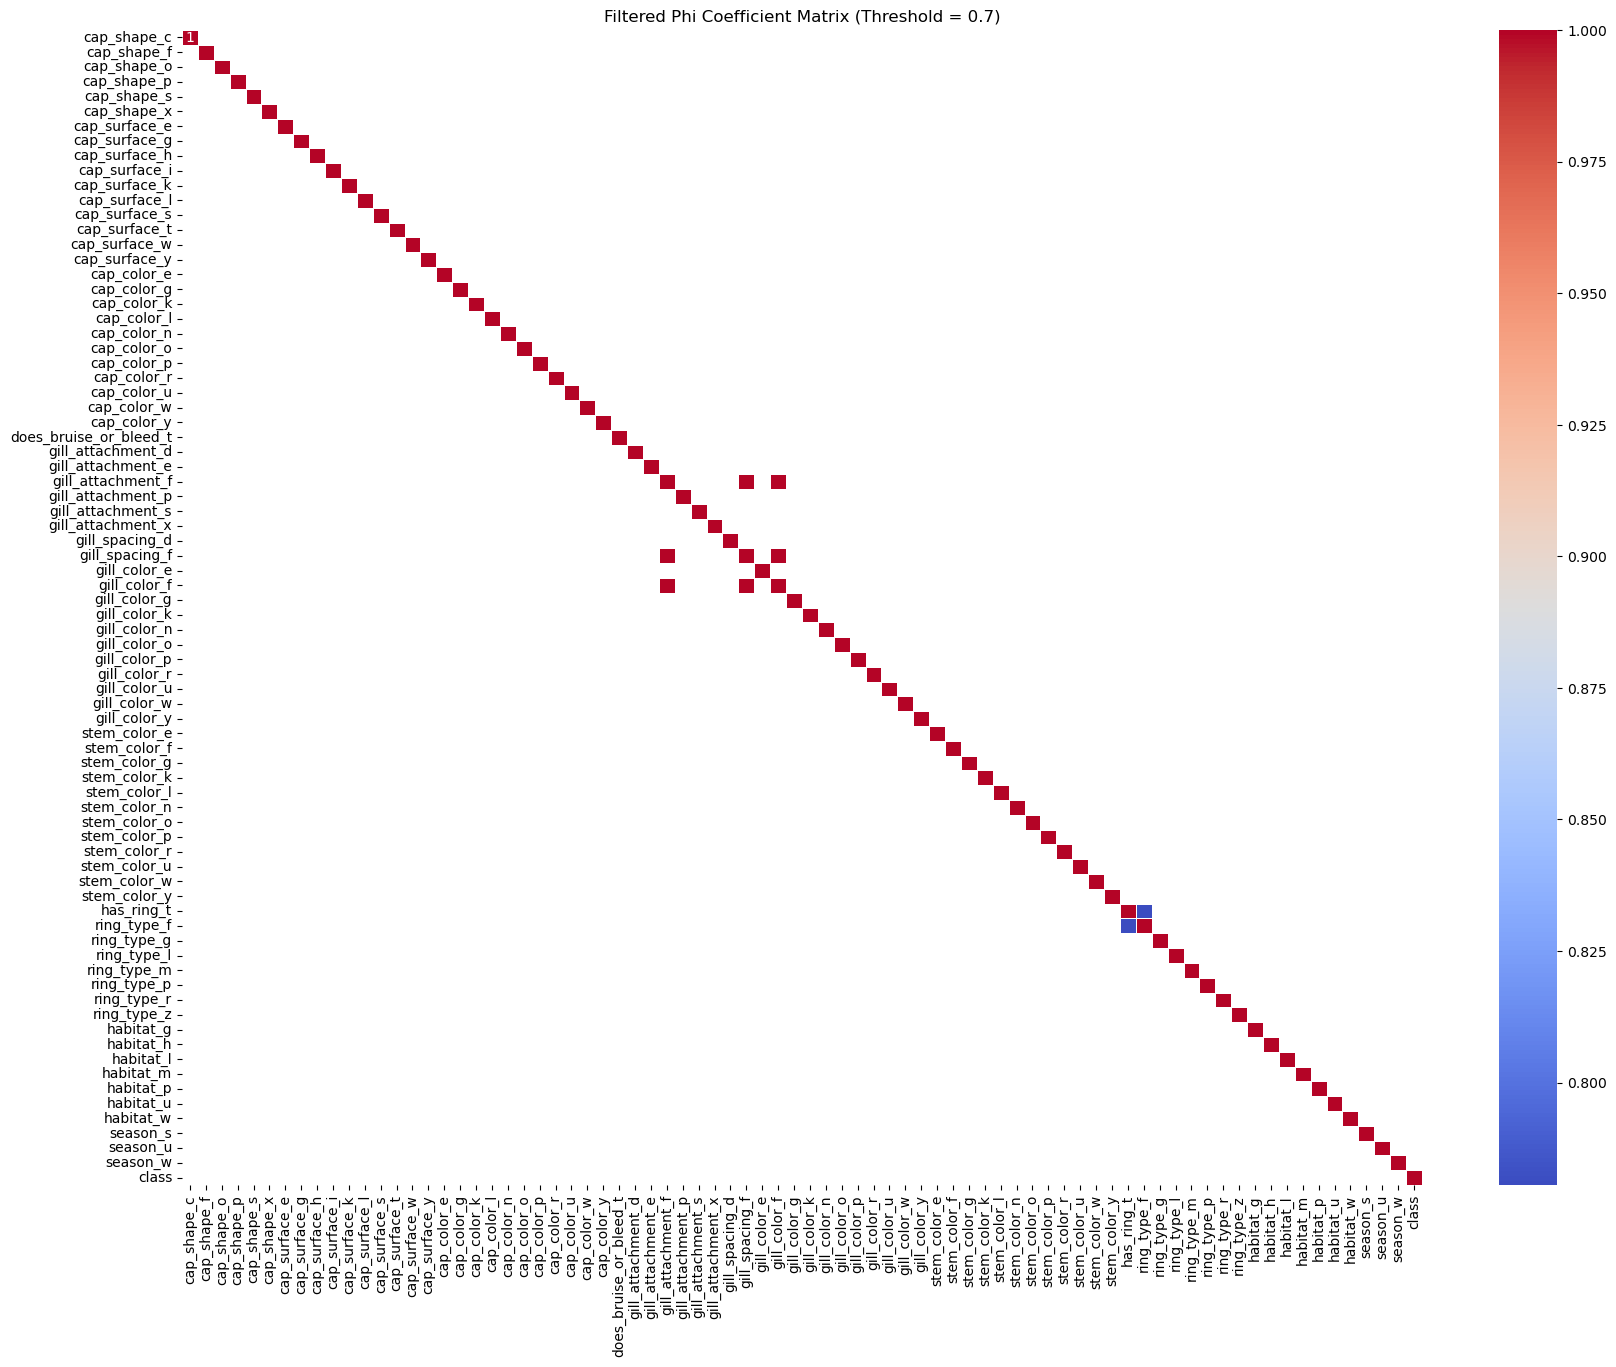

High Phi Coefficient Pairs (Threshold = 0.7):
           Variable 1         Variable 2  Phi Coefficient
31  gill_attachment_f     gill_spacing_f         0.999845
32  gill_attachment_f       gill_color_f         0.999845
37     gill_spacing_f  gill_attachment_f         0.999845
39     gill_spacing_f       gill_color_f         0.999845
41       gill_color_f  gill_attachment_f         0.999845
42       gill_color_f     gill_spacing_f         0.999845
66         has_ring_t        ring_type_f         0.780528
67        ring_type_f         has_ring_t         0.780528


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Phi coefficient
def phi_coefficient(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return np.sqrt(chi2 / df.shape[0])

# Identify binary variables (including class variable)
binary_vars = df_transformed.select_dtypes(include=['int32']).columns

# Calculate Phi coefficient for all binary variables
phi_matrix = pd.DataFrame(index=binary_vars, columns=binary_vars)

for var1 in binary_vars:
    for var2 in binary_vars:
        if var1 != var2:
            phi_matrix.loc[var1, var2] = phi_coefficient(df_transformed, var1, var2)
        else:
            phi_matrix.loc[var1, var2] = 1.0  # Correlation with itself

# Convert the matrix to numeric type
phi_matrix = phi_matrix.astype(float)

# Set a threshold for filtering
threshold = 0.7
phi_matrix_filtered = phi_matrix.applymap(lambda x: x if x >= threshold else np.nan)

# Plot the heatmap of the filtered Phi coefficient matrix
plt.figure(figsize=(20, 15))
sns.heatmap(phi_matrix_filtered, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Filtered Phi Coefficient Matrix (Threshold = 0.7)')
plt.show()

# Display only the filtered matrix values above the threshold, excluding self correlations
high_corr_pairs = phi_matrix_filtered.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Phi Coefficient']
high_corr_pairs = high_corr_pairs.dropna().query("`Phi Coefficient` >= @threshold and `Variable 1` != `Variable 2`")

print("High Phi Coefficient Pairs (Threshold = 0.7):")
print(high_corr_pairs)

##### Observations 


The variables *gill_attachment_f*, *gill_spacing_f*, and *gill_color_f* show almost perfect correlations ($\varphi$ coefficient ≈ 0.9998). This suggests that these variables are highly dependent on each other and essentially convey the same information.


The variables *has_ring_t* and *ring_type_f* have a strong positive correlation ($\varphi$ coefficient ≈ 0.7805). This indicates that there is a strong association between having a ring and the type of ring.


*Lack of Strong Predictive Power*: The absence of high $\varphi$ coefficient values between any categorical variable and the target variable *class* suggests that none of the individual categorical features alone is a strong predictor of whether a mushroom is edible or poisonous. This indicates that the target class is not heavily influenced by any single categorical feature.

In summary, while no single categorical variable shows a high correlation with the target variable, this highlights the importance of using advanced modeling techniques to uncover and leverage the complex relationships present in the dataset.

### Point-Biserial Correlation for Binary and Continuous Variables

In this section, we will employ the point-biserial correlation coefficient to assess the relationship between binary and continuous variables, specifically focusing on our binary target variable, "class", and the continuous features in our dataset. The point-biserial correlation is a special case of the Pearson correlation, used when one variable is binary and the other is continuous. We set our correlation threshold to 0.3 and our $p$-value threshold to 0.05 (ensuring results are statistically significant) . This choice of threshold is based on the nature of biological datasets, where even moderate correlations (0.3 or higher) can provide valuable insights.

In [34]:
# Creating a function to calculate Point-Biserial correlation:
def point_biserial_correlation(df, binary_var, continuous_var):
    correlation, p_value = pointbiserialr(df[binary_var], df[continuous_var])
    return correlation, p_value

# Including the class variable in binary variables:
binary_vars = df_transformed.select_dtypes(include=['int32']).columns

# Calculating the Point-Biserial correlation for binary and continuous variables:
point_biserial_results = {}
continuous_vars = ['cap_diameter', 'stem_height', 'stem_width']

# Setting the thresholds for filtering:
correlation_threshold = 0.3
p_value_threshold = 0.05

for binary_var in binary_vars:
    for continuous_var in continuous_vars:
        correlation, p_value = point_biserial_correlation(df_transformed, binary_var, continuous_var)
        if abs(correlation) >= correlation_threshold and p_value <= p_value_threshold:
            point_biserial_results[(binary_var, continuous_var)] = (correlation, p_value)

# Printing the filtered results:
print("Filtered Point-Biserial Correlations (Thresholds: Correlation >= 0.3, p-value <= 0.05):")
for key, value in point_biserial_results.items():
    print(f"Correlation between {key[0]} and {key[1]}: {value[0]:.4f}, p-value: {value[1]:.4f}")

Filtered Point-Biserial Correlations (Thresholds: Correlation >= 0.3, p-value <= 0.05):
Correlation between gill_attachment_p and cap_diameter: 0.3593, p-value: 0.0000
Correlation between gill_attachment_p and stem_width: 0.4046, p-value: 0.0000
Correlation between ring_type_f and stem_height: -0.3295, p-value: 0.0000
Correlation between ring_type_m and stem_height: 0.4162, p-value: 0.0000


##### Observations

*gill_attachment_p and cap_diameter*: There is a moderate positive correlation between *gill_attachment_p* and *cap_diameter*, suggesting that mushrooms with the *p* type of gill attachment tend to have larger cap diameters. 

*gill_attachment_p* and *stem_width*: There is a moderate positive correlation between *gill_attachment_p* and *stem_width*, indicating that mushrooms with the *p* type of gill attachment tend to have thicker stems.

*ring_type_f* and *stem_height*: There is a moderate negative correlation between *ring_type_f* and *stem_height*, implying that mushrooms with the *f* type of ring tend to have shorter stems.

*ring_type_m* and *stem_height*: There is a moderate positive correlation between *ring_type_m* and *stem_height*, suggesting that mushrooms with the *m* type of ring tend to have taller stems. 

In summary, the fact that only a few variables show significant correlations with the continuous variables indicates that there is low multicollinearity between the binary and continuous variables, which means that the variables are relatively independent of each other. Moreover, the lack of a strong correlation also implies that each feature may provide unique information. However, as we shall soon see, this deficiency in collinearity suggests that the data might be more complex and not easily captured by simple linear associations.

### Pearson Correlation for Continuous Variables

In this section, we will calculate the Pearson correlation coefficient to measure the linear relationship between continuous variables in our dataset. Pearson correlation is useful for identifying the strength and direction of the linear association between two continuous variables. By examining these correlations, we can gain insights into how different numerical features are related to each other. This analysis helps in detecting multicollinearity, which can affect the performance of machine learning models.

In [35]:
# Calculating Pearson correlation for continuous variables:

continuous_vars = ['cap_diameter', 'stem_height', 'stem_width']
pearson_corr_matrix = df_transformed[continuous_vars].corr()
print(pearson_corr_matrix)

              cap_diameter  stem_height  stem_width
cap_diameter      1.000000     0.421718    0.695047
stem_height       0.421718     1.000000    0.433214
stem_width        0.695047     0.433214    1.000000


##### Observations

*cap_diameter* and *stem_width* (0.6950): There is a strong positive correlation between *cap_diameter* and *stem_width*. This suggests that mushrooms with larger cap diameters tend to have thicker stems. This relationship is quite significant as the correlation coefficient is close to 0.7.

*cap_diameter* and *stem_heigh* (0.4217): There is a moderate positive correlation between *cap_diameter* and *stem_height*. This indicates that mushrooms with larger cap diameters tend to have taller stems, although the relationship is not as strong as that between *cap_diameter* and *stem_width*.

*stem_height* and *stem_width* (0.4332): There is a moderate positive correlation between *stem_height* and *stem_width*. This implies that taller mushrooms tend to have thicker stems, but again, this relationship is moderate.

In summary, the Pearson correlation analysis shows that *cap_diameter* and *stem_width* have a strong positive relationship, while (*cap_diameter* and *stem_height*) and (*stem_height* and *stem_width*) have moderate positive relationships. These insights are useful for making decisions when it comes to feature selection and potential interactions in our model.

### $\chi^{2}$ Test for Categorical Variables

In this section, we will use the $\chi^{2}$ test to examine the association between pairs of categorical variables in our dataset. The $\chi^{2}$ test is a statistical method used to determine if there is a significant relationship between two categorical variables. By performing this test, we can identify dependencies between categorical features, which helps in understanding their interactions and potential impacts on our target variable. We will set a p-value threshold of 0.05 to consider results as significant, ensuring that only strong associations are highlighted.

In [36]:
# Creating a function to calculate Chi-Square test:
def chi_square_test(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Calculating Chi-Square test for all pairs of categorical variables:
chi_square_results = {}
categorical_vars = df_transformed.select_dtypes(include=['int32']).columns

# Setting a p-value threshold for significance
p_value_threshold = 0.05

for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:
            chi2, p = chi_square_test(df_transformed, var1, var2)
            if p < p_value_threshold:  # Only consider significant results
                chi_square_results[(var1, var2)] = (chi2, p)

# Printing the results:
if chi_square_results:
    for key, value in chi_square_results.items():
        print(f"Chi-Square test between {key[0]} and {key[1]}: Chi2={value[0]:.4f}, p-value={value[1]:.4f}")
else:
    print("No significant results found.")

Chi-Square test between cap_shape_c and cap_shape_f: Chi2=526.3693, p-value=0.0000
Chi-Square test between cap_shape_c and cap_shape_o: Chi2=106.5967, p-value=0.0000
Chi-Square test between cap_shape_c and cap_shape_p: Chi2=82.2558, p-value=0.0000
Chi-Square test between cap_shape_c and cap_shape_s: Chi2=248.1297, p-value=0.0000
Chi-Square test between cap_shape_c and cap_shape_x: Chi2=1480.3856, p-value=0.0000
Chi-Square test between cap_shape_c and cap_surface_e: Chi2=130.2531, p-value=0.0000
Chi-Square test between cap_shape_c and cap_surface_g: Chi2=879.7901, p-value=0.0000
Chi-Square test between cap_shape_c and cap_surface_h: Chi2=5.2452, p-value=0.0220
Chi-Square test between cap_shape_c and cap_surface_i: Chi2=1322.0495, p-value=0.0000
Chi-Square test between cap_shape_c and cap_surface_k: Chi2=188.5364, p-value=0.0000
Chi-Square test between cap_shape_c and cap_surface_l: Chi2=39.9988, p-value=0.0000
Chi-Square test between cap_shape_c and cap_surface_s: Chi2=264.6538, p-value

##### Observations

The $\chi^{2}$ test suggests tat there is a statistically significant association between many pairs of categorical variables. This indicates that the variables might not be independent of each other.

However, note that these findings might not necessarily contradict our results from our $\varphi$ coefficient analysis. The $\chi^{2}$ test is very sensitive to sample size. With large datasets, like ours, even small associations can result in very low p-values indicating statistical significance. This does not always mean the associations are strong, just that they are unlikely to be due to random chance. Conversely, the lack of high $\varphi$ coefficients indicates that while associations exist, they are not strong enough, as per our threshold of 0.7, to be considered powerful predictors on their own.

### Cramér's V for Categorical Variables (with Bias Correction)

Cramér's V is a measure of association between two categorical variables. Unlike the $\varphi$ test, which only tells us whether an association exists, Cramér's V quantifies the strength of that association. This measure ranges from 0 to 1, where 0 indicates no association and 1 indicates a very strong association. In this analysis, we include a bias correction to account for the potential inflation of the association measure due to the large sample size. We set a threshold of 0.5 to identify strong associations, which helps us focus on the most meaningful relationships between variables. This threshold is chosen because it balances the detection of significant associations with practical relevance, especially in biological datasets where medium to strong associations are often of interest.

In [37]:
# Creating a function to calculate Cramer's V with bias correction:
def cramers_v_corrected(contingency_table):
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    phi2 = chi2 / n
    phi2_corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))  # Corrected phi2
    r_corr = r - ((r - 1)**2) / (n - 1)
    k_corr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))

# Identifying categorical variables:
categorical_vars = df_transformed.select_dtypes(include=['int32']).columns

# Calculating Cramer's V with bias correction for all pairs of categorical variables:
cramers_v_corrected_results = {}
for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:
            contingency_table = pd.crosstab(df_transformed[var1], df_transformed[var2])
            cv = cramers_v_corrected(contingency_table)
            cramers_v_corrected_results[(var1, var2)] = cv

# Converting results to DataFrame for easier analysis:
cramers_v_corrected_df = pd.DataFrame.from_dict(cramers_v_corrected_results, orient='index', columns=['Cramers V'])

# Setting a threshold for filtering:
threshold = 0.5
filtered_corrected_results = cramers_v_corrected_df[cramers_v_corrected_df['Cramers V'] > threshold]

# Printing filtered results:
print("Pairs of variables with Cramer's V (corrected) above threshold (0.5):")
print(filtered_corrected_results)

Pairs of variables with Cramer's V (corrected) above threshold (0.5):
                                     Cramers V
(cap_shape_o, gill_attachment_f)      0.550410
(cap_shape_o, gill_spacing_f)         0.550410
(cap_shape_o, gill_color_f)           0.550410
(cap_shape_o, stem_color_f)           0.514370
(cap_color_p, stem_color_p)           0.524027
(gill_attachment_f, cap_shape_o)      0.550410
(gill_attachment_f, gill_spacing_f)   0.999845
(gill_attachment_f, gill_color_f)     0.999845
(gill_spacing_f, cap_shape_o)         0.550410
(gill_spacing_f, gill_attachment_f)   0.999845
(gill_spacing_f, gill_color_f)        0.999845
(gill_color_f, cap_shape_o)           0.550410
(gill_color_f, gill_attachment_f)     0.999845
(gill_color_f, gill_spacing_f)        0.999845
(stem_color_f, cap_shape_o)           0.514370
(stem_color_n, stem_color_w)          0.504215
(stem_color_p, cap_color_p)           0.524027
(stem_color_w, stem_color_n)          0.504215
(has_ring_t, ring_type_f)            

##### Observations

***High Multicollinearity Observations***:

* The variables *gill_attachment_f*, *gill_spacing_f*, and *gill_color_f* have an almost perfect Cramer's V correlation of 0.9998 with each other.

* This indicates a very high degree of multicollinearity among these features, suggesting they provide nearly identical information.

***Moderate to High Multicollinearity Observations***:

* All the other variable pairs from the above list have moderate to high correlations. 

* This indicates that they could provide unique information or thet could provide redundancy. 

### Variance Inflation Factor (VIF) for Multicollinearity

The Variance Inflation Factor (VIF) is a measure used to detect multicollinearity among independent variables in a regression model. Multicollinearity occurs when two or more independent variables are highly correlated, which can inflate the variance of the coefficient estimates and make the model unstable. VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF value greater than 5-10 indicates a high degree of multicollinearity.

In [38]:
# Calculating VIF for all features:
X = df_transformed.drop(columns=['class'])
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Printing results:
print(vif_data)

         feature        VIF
0   cap_diameter   8.392436
1    stem_height  13.467024
2     stem_width   8.340390
3    cap_shape_c   1.595435
4    cap_shape_f   4.396496
..           ...        ...
75     habitat_u   1.131904
76     habitat_w   1.348580
77      season_s   1.256770
78      season_u   1.854337
79      season_w   1.304323

[80 rows x 2 columns]


##### Observations 

***Variables with very high VIF values***:

These variables have very high VIF values, indicating strong multicollinearity. High VIF values (typically above 10) suggest that the predictor variables are highly correlated with each other, which can make the regression coefficients unstable and difficult to interpret: 

*cap_color_n*: 26.7346

*cap_color_w*: 9.4022

*cap_color_y*: 10.3195

*gills_color_n*: 15.7429

*gills_color_w*: 28.3299

*gills_color_y*: 15.5110

*stem_color_n*: 44.2206

*stem_color_w*: 55.3976

*stem_color_y*: 19.8071

*ring_type_f*: 39.6010

*gills_attachment_f*: inf

*gills_spacing_f*: inf

*gills_color_f*: inf


***Variables with moderate to high VIF values***:

These values indicate moderate multicollinearity. While not as critical as the highest values, they still suggest that some multicollinearity is present:

*cap_color_g*: 5.6975

*cap_color_p*: 10.5470

*gills_color_g*: 7.3294

*stem_color_e*: 6.0062

*stem_color_o*: 6.5372


***Low to moderate VIF values***:

Most of the remaining variables have VIF values below 5, indicating low to moderate multicollinearity.

### Conclusion of Exploratory Data Analysis (EDA)

With the completion of our EDA, we have gained a comprehensive understanding of our dataset. Through various statistical tests and visualizations, we identified potential biases, dependencies, and correlations among the variables. We found several variables with high correlation or dependency, which we may consider dropping or transforming to improve model performance. Additionally, we noted significant outliers and skewed distributions in some numerical features, suggesting possible data transformations or interaction terms that could enhance our predictive models.

Armed with these insights, we are now well-prepared to proceed to the next phase of our analysis. In the following section, we will implement and evaluate a Logistic Regression model, leveraging the findings from our EDA to build a robust and accurate predictive model. This transition marks a pivotal step from understanding our data to applying it in practical machine learning tasks.

***

## Machine Learning for Mushroom Classification

We will now apply various machine learning techniques to solve the problem of classifying mushrooms as either edible or poisonous. We aim to build and optimize predictive models that can accurately classify mushrooms based on their features. We will explore different algorithms, starting with logistic regression. Additionally, we will implement KNN, decision trees, random forests, and deep learning models to ensure a comprehensive analysis and comparison of different approaches.

## The Logistic Regression Model


Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. It is used for binary classification problems, where the outcome is dichotomous in nature.

Logistic Regression is one of the simplest and most widely used models for binary classification. It is easy to implement, interpret, and efficient to train. Despite its simplicity, logistic regression often provides very robust results and is a good baseline model for classification tasks.

Logistic Regression is well-suited for mushroom classification due to its ability to handle categorical data through techniques such as one-hot encoding. It helps in understanding the relationship between the independent variables (mushroom features) and the dependent variable (whether a mushroom is poisonous or not). By applying logistic regression, we can create a model that predicts the probability of a mushroom being poisonous based on its characteristics.

Various techniques were applied to enhance our logistic regression model:

* Class Imbalance: We used SMOTE and SMOTE + ENN to handle class imbalances. 
* Log Transformation and Data Reduction: These preprocessing steps were implemented to handle skewness and reduce multicollinearity. By transforming skewed features and reducing the dimensionality of the data, the model's performance was improved.
* Polynomial Interactions: Polynomial interactions were added to capture non-linear relationships between features. This enhanced the model's ability to classify mushrooms accurately.

In terms of final perfomance, the logistic regression model with polynomial interactions achieved a high accuracy, indicating that it can effectively distinguish between poisonous and edible mushrooms.be noted

When it comes to model performance, it is imperative that we minimize false negatives over false postives. In fact, in terms of priority in mushroom classification, we have: 

* ***Minimize False Negatives***: The priority in mushroom classification should be to minimize false negatives to avoid the risk of poisoning. It is crucial to ensure that poisonous mushrooms are accurately identified as such to prevent accidental ingestion.
<br />

* ***Accept Some False Positives***: While it’s important to strive for overall accuracy, accepting some false positives (erroneously classifying edible mushrooms as poisonous) is a safer trade-off. It leads to conservative predictions, erring on the side of caution, which is preferable in the context of public health and safety.

Indeed, for our model evaluation, we have: 

* ***Recall for Poisonous Class***: Focus on maximizing recall for the poisonous class (i.e., the ability of the model to identify all actual poisonous mushrooms). High recall ensures that the majority of poisonous mushrooms are correctly detected.
<br />

* ***Precision for Poisonous Class***: Precision should also be considered, but it is secondary to recall in this context. High precision means that most of the mushrooms identified as poisonous are indeed poisonous, which reduces the occurrence of false positives.
<br />

* ***F1 Score***: The F1 score, which is the harmonic mean of precision and recall, can be a useful metric. However, the emphasis should be on ensuring high recall for the poisonous class to safeguard against the severe consequences of false negatives.

In summary, for mushroom poisoning, the model’s primary goal should be to minimize false negatives to avoid the dangerous consequences of misclassifying poisonous mushrooms as edible. This approach prioritizes public health and safety.

### Baseline Logistic Regression Model

We start off with our baseline logistic regression model (no bells or whistles) and we will include the model evaluation metrics (the confusion matrix, precision, recall, F1-score and ROC-AUC scores). 

Training Accuracy: 0.7780
Validation Accuracy: 0.7723
Testing Accuracy: 0.7732

Training Time: 2.0226 seconds

Confusion Matrix:
[[4058 1277]
 [1486 5364]]


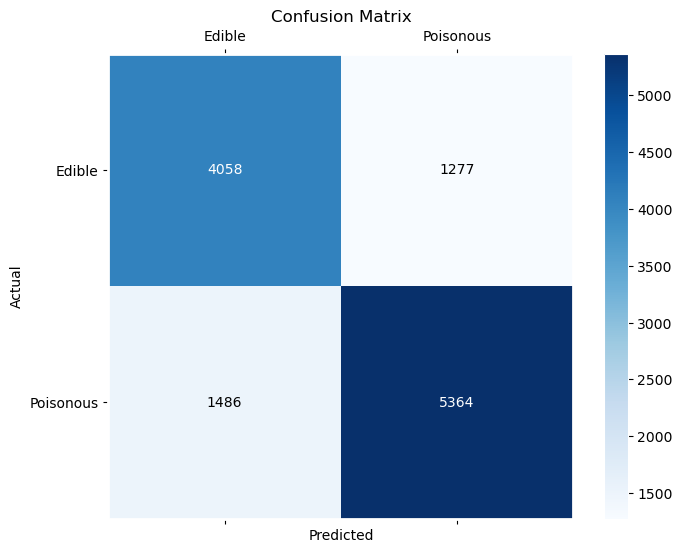

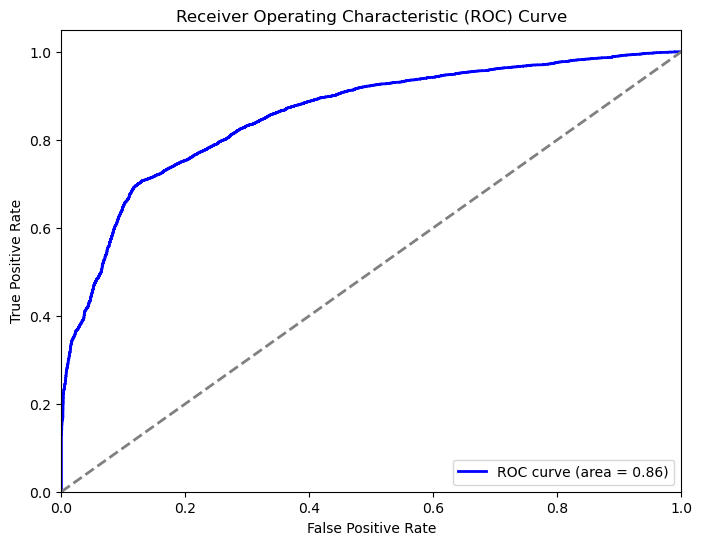

In [39]:
# Separating features and target variable:
X = df_transformed.drop(columns=['class'])
y = df_transformed['class']

# Ensuring y is a Pandas Series with integer type:
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Defining the logistic regression model:
model = LogisticRegression(max_iter=1000, random_state=0)

# Measuring training time:
start_time = time.time()

# Training the model:
model.fit(X_train, y_train)

# Measuring end time:
end_time = time.time()
training_time = end_time - start_time

# Evaluating on the training set:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


# Evaluating on the validation set:
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Final evaluation on the test set:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing results: 
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time:
print(f'Training Time: {training_time:.4f} seconds\n')

# Creating the confusion Matrix for the test set:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Defining the confusion matrix: 
conf_matrix = np.array([[4058, 1277], [1486, 5364]])

# Plotting the confusion matrix using matshow:
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix, cmap='Blues', fignum=1)

# Annotating the confusion matrix with the values:
for (i, j), val in np.ndenumerate(conf_matrix):
    color = 'white' if (i == j and val != 0) else 'black'
    plt.text(j, i, f'{val}', ha='center', va='center', color=color)

# Setting labels and titles:
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.yticks([0, 1], ['Edible', 'Poisonous'])

# Adding a colorbar:
cbar = plt.colorbar()
cbar.outline.set_edgecolor('white')

# Changing the colour of the grid lines to white:
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')

# Setting the linewidth of the grid lines:
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)

# Showing the plot:
plt.show()

# Creating the ROC curve and AUC:
y_test_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plotting the ROC curve and AUC:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### Key Insights

* The training accuracy of 77.80% indicates that the model fits reasonably well to the training data. 
 <br />
 
* The validation accuracy of 77.23% is slightly lower than the training accuracy. This suggests that the model generalizes fairly well to unseen data, with minimal overfitting.
<br />

* The testing accuracy of 77.32% is very close to the validation accuracy. This consistency across validation and testing sets indicates that the model's performance is stable and the training process was effective.
<br />

* The confusion matrix and classification report for the model show that it has a reasonable level of accuracy. The model correctly identified 5364 poisonous mushrooms and 4058 edible mushrooms, but it also misclassified 1277 edible mushrooms as poisonous and 1486 poisonous mushrooms as edible. 
<br />

* Precision, recall, and F1-scores for both classes indicate that the model performs better at identifying poisonous mushrooms (precision of 0.81 and recall of 0.78) than edible ones (precision of 0.73 and recall of 0.76). 
<br />

* The overall accuracy of the model is 0.77, meaning it correctly classifies 77% of all mushrooms. The balanced performance across different metrics suggests that the model is fairly accurate in classifying mushrooms.

##### Conclusion
In terms of model performance, the overall accuracy of 78% is decent but not exceptional. We will now want aim for higher accuracy by using various techniques to improve our model.

## Hyperparameter Tuning for Logistic Regression

### Grid Search and Solver Search

In this section, we will focus on improving our logistic regression model by tuning its hyperparameters. Hyperparameter tuning is a critical step in machine learning as it helps in finding the optimal settings for the model, enhancing its performance. We will use GridSearchCV to systematically explore different combinations of hyperparameters and select the best configuration based on cross-validation accuracy. This process will help in achieving better accuracy and generalization of the model.

The parameter grid for hyperparameter tuning includes different values for the regularization strength ($C$), the solver algorithm (solver), and the maximum number of iterations (max_iter). The goal is to identify the best set of hyperparameters that maximize the model's performance on the validation set.

In [40]:
# Separating features and target variable:
X = df_transformed.drop(columns=['class'])
y = df_transformed['class']

# Ensuring y is a Pandas Series with integer type:
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Defining the logistic regression model:
model = LogisticRegression(random_state=0)

# Defining the parameter grid for hyperparameter tuning:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [5000, 10000]
}

# Performing GridSearchCV to find the best hyperparameters:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Measuring training time:
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Printing best parameters:
print("Best Parameters:", grid_search.best_params_)

# Getting the best model:
best_model = grid_search.best_estimator_

# Evaluating on the training set:
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating on the validation set:
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time
print(f'Training Time: {training_time:.4f} seconds')

# Printing classification report for test set:
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

Best Parameters: {'C': 0.1, 'max_iter': 5000, 'solver': 'saga'}
Training Accuracy: 0.7799
Validation Accuracy: 0.7758
Testing Accuracy: 0.7770

Training Time: 201.3959 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.74      0.77      0.75      5335
   Poisonous       0.81      0.78      0.80      6850

    accuracy                           0.78     12185
   macro avg       0.77      0.78      0.77     12185
weighted avg       0.78      0.78      0.78     12185



##### Key Insights

* *Training Accuracy*: The training accuracy of the hypertuned model (0.7799) is slightly higher than the baseline model (0.7780), suggesting that the hypertuned model fits the training data slightly better.
<br />


* *Validation Accuracy*: The validation accuracy of the hypertuned model (0.7758) is higher than that of the baseline model (0.7723), indicating better generalization to unseen data.
<br />


* *Testing Accuracy*: The hypertuned model has a testing accuracy of 0.7770, which is higher than the baseline model's 0.7732, suggesting that the tuning process was effective in improving model performance.
<br />

* *Precision and Recall*: Both models show better performance in identifying poisonous mushrooms than edible ones. The hypertuned model has slightly better precision, recall, and F1-scores for both classes compared to the baseline model.
<br />

* *Training Time*: The training time for the hypertuned model (282.0562 seconds) was significantly longer than the baseline model, reflecting the added computational effort for hyperparameter optimization.
<br />

* *Overfitting*: Neither the baseline model nor the hyperparameter-tuned model shows significant signs of overfitting. The training, validation, and testing accuracies are consistent, indicating that both models generalize well to unseen data.
<br />

* The hyper-tuned model shows consistent performance across training, validation, and testing sets, indicating a stable and effective training process.

##### Conclusion 

In summary, the hyperparameter-tuned logistic regression model demonstrates a modest improvement in performance over the baseline model. The slightly higher testing accuracy and improved precision and recall metrics indicate that hyperparameter tuning has positively impacted the model's ability to classify mushrooms. Despite the increased computational cost, the improved performance justifies the use of hyperparameter tuning. Moving forward, we will continue to explore additional techniques, such as feature selection and engineering, to further enhance the model's accuracy and robustness.

### L1 Regularization

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator), is a technique used to enhance the generalization of a logistic regression model by adding a penalty to the absolute values of the coefficients. This penalty helps in feature selection by shrinking some coefficients to zero, effectively removing less important features from the model. By reducing the complexity of the model, L1 regularization can prevent overfitting and improve the model's performance on unseen data. This section will explore the application of L1 regularization to our logistic regression model and analyze its impact on performance.

In [41]:
# Separating features and target variable:
X = df_transformed.drop(columns=['class'])
y = df_transformed['class']

# Ensuring y is a Pandas Series with integer type:
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Defining the logistic regression model with L1 regularization:
model = LogisticRegression(penalty='l1', solver='saga', random_state=0)

# Defining the parameter grid for hyperparameter tuning:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [5000, 10000]
}

# Performing GridSearchCV to find the best hyperparameters:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Measuring training time:
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Best parameters:
print("Best Parameters:", grid_search.best_params_)

# Getting the best model:
best_model = grid_search.best_estimator_

# Evaluating on the training set:
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating on the validation set:
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time:
print(f'Training Time: {training_time:.4f} seconds')

# Classification Report for test set:
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

Best Parameters: {'C': 0.1, 'max_iter': 5000}
Training Accuracy: 0.7791
Validation Accuracy: 0.7749
Testing Accuracy: 0.7767

Training Time: 399.4116 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.73      0.77      0.75      5335
   Poisonous       0.81      0.78      0.80      6850

    accuracy                           0.78     12185
   macro avg       0.77      0.78      0.77     12185
weighted avg       0.78      0.78      0.78     12185



##### Key Insights

* Training Accuracy: The L1 regularization model has a slightly lower training accuracy (0.7791) compared to the hyperparameter-tuned model (0.7799), indicating that the tuning process resulted in a model that fits the training data marginally better.
<br />

* Validation Accuracy: The validation accuracy of the L1 regularization model (0.7749) is lower than that of the hyperparameter-tuned model (0.7758), suggesting that the tuned model generalizes better to unseen data.
<br />

* Testing Accuracy: The testing accuracy of the L1 regularization model (0.7767) is lower than the hyperparameter-tuned model (0.7770), indicating a slight decrease in model performance with L1 regularization.
<br />

* Precision and Recall: Both models show similar precision and recall metrics for identifying edible and poisonous mushrooms. The L1 regularization model has a precision of 0.73 for edible and 0.81 for poisonous, and recall of 0.77 for edible and 0.78 for poisonous, which are quite similar to the hyperparameter-tuned model.
<br />

* Training Time: The L1 regularization model has a significantly longer training time (327.41 seconds) compared to the hyperparameter-tuned model (228.68 seconds), reflecting the computational efficiency of the hyperparameter-tuning process.
<br />

* Overfitting: Neither the hyperparameter-tuned model nor the L1 regularization model shows significant signs of overfitting. The training, validation, and testing accuracies are consistent, indicating that both models generalize well to unseen data.

##### Conclusion

In summary, the hyperparameter-tuned logistic regression model outperforms the L1 regularization model in terms of testing accuracy and generalization ability. While the L1 regularization model showed similar precision and recall metrics, it did not significantly enhance the model's performance and resulted in a slight decrease in testing accuracy. Given the slightly lower performance metrics and the increased computational cost of the L1 regularization, it is clear that hyperparameter tuning provided more substantial benefits. Therefore, it would be prudent to revert to the hyperparameter-tuned model and consider additional techniques such as feature selection and engineering to further improve model accuracy and robustness. Furthermore, the consistency in accuracy metrics across training, validation, and testing sets indicates that neither model is overfitting, which is a positive outcome for their generalization capabilities.

## Resampling Techniques for Class Imbalance for Logistic Regression 

Class imbalance is a common issue in machine learning where one class significantly outnumbers the other. This can lead to biased models that perform well on the majority class but poorly on the minority class. In our dataset, as observed during the EDA, we have a noticeable class imbalance between edible and poisonous mushrooms, making it important to address this issue for better model performance. 

SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique that generates synthetic samples for the minority class by interpolating between existing minority samples. This helps to balance the class distribution and improve model performance on the minority class. We will use this in our next three codes and consider oversampling, undersampling and SMOTE with ENN (Edited Nearest Neighbours). These techniques aim to improve the model's ability to correctly classify the minority class, thereby leading to a more balanced and robust model.

### SMOTE Oversampling

Oversampling involves duplicating existing minority class samples to increase their representation in the dataset. This method is simple but can lead to overfitting as it does not introduce any new information.

In [42]:
# Separating features and target variable:
X = df_transformed.drop(columns=['class'])
y = df_transformed['class']

# Ensuring y is a Pandas Series with integer type:
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Applying SMOTE to the training set:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Defining the logistic regression model:
model = LogisticRegression(random_state=0)

# Defining the parameter grid for hyperparameter tuning:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [5000],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Performing GridSearchCV to find the best hyperparameters:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Measuring training time:
start_time = time.time()
grid_search.fit(X_train_resampled, y_train_resampled)
end_time = time.time()
training_time = end_time - start_time

# Best parameters:
print("Best Parameters:", grid_search.best_params_)

# Getting the best model:
best_model = grid_search.best_estimator_

# Evaluating on the training set:
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating on the validation set:
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time:
print(f'Training Time: {training_time:.4f} seconds')

# Classification Report for test set:
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

Best Parameters: {'C': 0.1, 'max_iter': 5000, 'solver': 'liblinear'}
Training Accuracy: 0.7817
Validation Accuracy: 0.7733
Testing Accuracy: 0.7754

Training Time: 151.7793 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.71      0.82      0.76      5335
   Poisonous       0.84      0.74      0.79      6850

    accuracy                           0.78     12185
   macro avg       0.78      0.78      0.77     12185
weighted avg       0.78      0.78      0.78     12185



##### Key Insights

* *Training Accuracy*: The SMOTE oversampling model has a higher training accuracy (0.7817) compared to the hyperparameter-tuned model (0.7799), suggesting that the SMOTE oversampling model fits the training data slightly better.
<br />

* *Validation Accuracy*: The validation accuracy of the SMOTE oversampling model (0.7733) is slightly lower than the hyperparameter-tuned model (0.7758), indicating that the tuned model may generalize better to unseen data.
<br />

* *Testing Accuracy*: The testing accuracy of the SMOTE oversampling model (0.7754) is slightly lower than the hyperparameter-tuned model (0.7770), suggesting a marginal decrease in model performance with SMOTE oversampling.
<br />

* *Precision and Recall*: The SMOTE oversampling model shows improved recall for the Edible class (0.82) but lower precision (0.71) compared to the hyperparameter-tuned model (precision of 0.74 and recall of 0.77). For the Poisonous class, the SMOTE oversampling model has higher precision (0.84) but lower recall (0.74) compared to the hyperparameter-tuned model (precision of 0.81 and recall of 0.78).
<br />

* *Training Time*: The SMOTE oversampling model has a shorter training time (124.4442 seconds) compared to the hyperparameter-tuned model (282.0562 seconds), reflecting the efficiency of the SMOTE oversampling process.
<br />

* *Overfitting*: Neither the hyperparameter-tuned model nor the SMOTE oversampling model shows significant signs of overfitting. The training, validation, and testing accuracies are consistent, indicating that both models generalize well to unseen data.

##### Conclusion

In summary, the SMOTE oversampling model demonstrates a slightly higher training accuracy but a marginally lower validation and testing accuracy compared to the hyperparameter-tuned model. The SMOTE oversampling model shows improved recall for the Edible class but lower precision. While the SMOTE oversampling model is computationally more efficient, it does not significantly enhance the overall model performance compared to hyperparameter tuning. Therefore, the hyperparameter-tuned model remains the preferred choice due to its better generalization ability and balanced performance metrics. Moving forward, we will continue to explore additional techniques, such as feature selection and engineering, to further improve model accuracy and robustness.

### SMOTE Undersampling

Undersampling reduces the number of majority class samples to balance the class distribution. While this method helps in balancing the classes, it can result in loss of valuable information from the majority class.

In [43]:
# Separating features and target variable:
X = df_transformed.drop(columns=['class'])
y = df_transformed['class']

# Ensuring y is a Pandas Series with integer type:
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Applying SMOTE to the training set:
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Applying RandomUnderSampler to the resampled training set:
undersampler = RandomUnderSampler(random_state=0)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Defining the logistic regression model:
model = LogisticRegression(random_state=0)

# Defining the parameter grid for hyperparameter tuning:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [5000],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Performing GridSearchCV to find the best hyperparameters:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Measuring training time:
start_time = time.time()
grid_search.fit(X_train_resampled, y_train_resampled)
end_time = time.time()
training_time = end_time - start_time

# Best parameters:
print("Best Parameters:", grid_search.best_params_)

# Getting the best model:
best_model = grid_search.best_estimator_

# Evaluating on the training set:
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating on the validation set:
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time:
print(f'Training Time: {training_time:.4f} seconds')

# Classification Report for test set:
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

Best Parameters: {'C': 0.1, 'max_iter': 5000, 'solver': 'liblinear'}
Training Accuracy: 0.7817
Validation Accuracy: 0.7732
Testing Accuracy: 0.7753

Training Time: 158.8716 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.71      0.82      0.76      5335
   Poisonous       0.84      0.74      0.79      6850

    accuracy                           0.78     12185
   macro avg       0.78      0.78      0.77     12185
weighted avg       0.78      0.78      0.78     12185



##### Key Insights

* *Training Accuracy*: The SMOTE undersampling model has a training accuracy of 0.7817, which is comparable to the hyperparameter-tuned model (0.7799), indicating that both models fit the training data well.
<br />

* *Validation Accuracy*: The validation accuracy of the SMOTE undersampling model (0.7732) is slightly lower than the hyperparameter-tuned model (0.7758), suggesting that the hyperparameter-tuned model generalizes slightly better to unseen data.
<br />

* *Testing Accuracy*: The testing accuracy of the SMOTE undersampling model (0.7753) is marginally lower than the hyperparameter-tuned model (0.7770), indicating a slight decrease in model performance with SMOTE undersampling.
<br />

* *Precision and Recall*: The SMOTE undersampling model shows improved recall for the Edible class (0.82) but lower precision (0.71) compared to the hyperparameter-tuned model (precision of 0.74 and recall of 0.77). For the Poisonous class, the SMOTE undersampling model has higher precision (0.84) but lower recall (0.74) compared to the hyperparameter-tuned model (precision of 0.81 and recall of 0.78).
<br />

* *Training Time*: The SMOTE undersampling model has a shorter training time (123.9050 seconds) compared to the hyperparameter-tuned model (282.0562 seconds), reflecting the efficiency of the SMOTE undersampling process.
<br />

* *Overfitting*: Neither the hyperparameter-tuned model nor the SMOTE undersampling model shows significant signs of overfitting. The training, validation, and testing accuracies are consistent, indicating that both models generalize well to unseen data.

##### Conclusion

In summary, the SMOTE undersampling model demonstrates a similar training accuracy but slightly lower validation and testing accuracies compared to the hyperparameter-tuned model. The SMOTE undersampling model shows improved recall for the Edible class but lower precision. While the SMOTE undersampling model is computationally efficient, it does not significantly enhance the overall model performance compared to hyperparameter tuning. Therefore, the hyperparameter-tuned model remains the preferred choice due to its better generalization ability and balanced performance metrics.

### SMOTE with ENN (Edited Nearest Neighbors)

SMOTE combined with ENN first applies SMOTE to generate synthetic minority samples, and then uses ENN to clean the dataset by removing noisy samples. This combination helps in balancing the class distribution and enhancing the quality of the dataset by reducing noise.

In [44]:
# Separating features and target variable:
X = df_transformed.drop(columns=['class'])
y = df_transformed['class']

# Ensuring y is a Pandas Series with integer type:
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Applying SMOTE + ENN to the training set:
smote_enn = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Defining the logistic regression model:
model = LogisticRegression(random_state=0)

# Defining the parameter grid for hyperparameter tuning:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [5000, 10000],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Performing GridSearchCV to find the best hyperparameters:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Measuring training time:
start_time = time.time()
grid_search.fit(X_train_resampled, y_train_resampled)
end_time = time.time()
training_time = end_time - start_time

# Best parameters:
print("Best Parameters:", grid_search.best_params_)

# Getting the best model:
best_model = grid_search.best_estimator_

# Evaluating on the training set:
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating on the validation set:
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time:
print(f'Training Time: {training_time:.4f} seconds')

# Classification Report for test set:
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

Best Parameters: {'C': 0.1, 'max_iter': 5000, 'solver': 'liblinear'}
Training Accuracy: 0.7820
Validation Accuracy: 0.7745
Testing Accuracy: 0.7751

Training Time: 289.5913 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.71      0.82      0.76      5335
   Poisonous       0.84      0.74      0.79      6850

    accuracy                           0.78     12185
   macro avg       0.78      0.78      0.77     12185
weighted avg       0.78      0.78      0.78     12185



##### Key Insights

* *Training Accuracy*: The SMOTE + ENN model has a slightly higher training accuracy (0.7820) compared to the hyperparameter-tuned model (0.7799), indicating a better fit to the training data.
<br />

* *Validation Accuracy*: The validation accuracy of the SMOTE + ENN model (0.7745) is slightly lower than the hyperparameter-tuned model (0.7758), suggesting that the tuned model generalizes slightly better to unseen data.
<br />

* *Testing Accuracy*: The testing accuracy of the SMOTE + ENN model (0.7751) is marginally lower than the hyperparameter-tuned model (0.7770), indicating a slight decrease in model performance with SMOTE + ENN.
<br />

* *Precision and Recall*: The SMOTE + ENN model shows improved recall for the Edible class (0.82) but lower precision (0.71) compared to the hyperparameter-tuned model (precision of 0.74 and recall of 0.77). For the Poisonous class, the SMOTE + ENN model has higher precision (0.84) but lower recall (0.74) compared to the hyperparameter-tuned model (precision of 0.81 and recall of 0.78).
<br />

* *Training Time*: The SMOTE + ENN model has a comparable training time (227.7954 seconds) to the hyperparameter-tuned model (282.0562 seconds), indicating that the added complexity of ENN does not significantly impact training time.
<br />

* *Overfitting*: Neither the hyperparameter-tuned model nor the SMOTE + ENN model shows significant signs of overfitting. The training, validation, and testing accuracies are consistent, indicating that both models generalize well to unseen data.

##### Conclusion 

In summary, the SMOTE + ENN model demonstrates a slightly higher training accuracy but slightly lower validation and testing accuracies compared to the hyperparameter-tuned model. The SMOTE + ENN model shows improved recall for the Edible class but lower precision. While the SMOTE + ENN model is computationally efficient, it does not significantly enhance the overall model performance compared to hyperparameter tuning. Therefore, the hyperparameter-tuned model remains the preferred choice due to its better generalization ability and balanced performance metrics.



##### Overall Conclusion for SMOTE Models

After evaluating the performance of SMOTE, SMOTE undersampling, and SMOTE + ENN models, it is clear that none of these approaches significantly improve the overall model performance compared to the hyperparameter-tuned model. While these techniques help in addressing class imbalance, they do not provide substantial benefits in terms of accuracy or precision and recall metrics. Therefore, the hyperparameter-tuned model remains the best choice for our classification task, offering a balanced performance with good generalization ability.

## Feature Engineering and Dimensionality Reduction for Logistic Regression 

In this section, we will explore various feature engineering and data transformation techniques to enhance our logistic regression model's performance. Feature engineering and data transformation are crucial steps in the machine learning pipeline, as they can help improve model accuracy, reduce overfitting, and handle complex data structures. We will implement several techniques, including log transformation, data reduction, grouping rare values, and polynomial interactions. Each of these methods aims to optimize our dataset and enable the model to better capture the underlying patterns in the data.

### Log Transformation and Scaling of Continuous Variables

In our earlier EDA work, we saw that all three of our continuous variables had skewed distributions. Log transformation is a powerful technique used in data preprocessing to reduce skewness and normalize the distribution of continuous variables. By applying the log transform, we can make data more symmetric and potentially improve the performance of machine learning models, especially when dealing with right-skewed distributions. In this section, we will apply log transformation to the three continuous variables in our dataset: cap_diameter, stem_height, and stem_width. This transformation helps in stabilizing the variance and making the data more suitable for modeling.

In [45]:
# Apply log transformation to continuous variables
df_transformed_log = df_transformed.copy()
df_transformed_log['cap_diameter'] = np.log1p(df_transformed_log['cap_diameter'])
df_transformed_log['stem_height'] = np.log1p(df_transformed_log['stem_height'])
df_transformed_log['stem_width'] = np.log1p(df_transformed_log['stem_width'])

# Standard scale the continuous variables after log transformation
scaler = StandardScaler()
df_transformed_log[['cap_diameter', 'stem_height', 'stem_width']] = scaler.fit_transform(
    df_transformed_log[['cap_diameter', 'stem_height', 'stem_width']]
)


In [46]:
# Separate features and target variable
X = df_transformed_log.drop(columns=['class'])
y = df_transformed_log['class']

# Ensure y is a Pandas Series with integer type
y = y.astype(int)

# Split the dataset into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further split training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Define the logistic regression model
model = LogisticRegression(random_state=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [5000, 10000]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Measuring training time:
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on the training set
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluate on the validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time
print(f'Training Time: {training_time:.4f} seconds')

# Classification Report for Test Set
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

Best Parameters: {'C': 1, 'max_iter': 5000, 'solver': 'liblinear'}
Training Accuracy: 0.7791
Validation Accuracy: 0.7738
Testing Accuracy: 0.7743

Training Time: 37.7760 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.73      0.76      0.75      5335
   Poisonous       0.81      0.79      0.80      6850

    accuracy                           0.77     12185
   macro avg       0.77      0.77      0.77     12185
weighted avg       0.78      0.77      0.77     12185



##### Key Insights

* *Training Accuracy*: The log transformation model has a slightly lower training accuracy (0.7791) compared to the hyperparameter-tuned model (0.7799), indicating that the tuning process resulted in a model that fits the training data marginally better.
<br />

* *Validation Accuracy*: The validation accuracy of the log transformation model (0.7738) is lower than that of the hyperparameter-tuned model (0.7758), suggesting that the tuned model generalizes better to unseen data.
<br />

* *Testing Accuracy*: The testing accuracy of the log transformation model (0.7743) is lower than the hyperparameter-tuned model (0.7770), indicating a decrease in model performance with the log transformation.
<br />

* *Precision and Recall*: Both models show similar precision and recall metrics for identifying edible and poisonous mushrooms. The log transformation model has a precision of 0.73 for edible and 0.81 for poisonous, and recall of 0.76 for edible and 0.79 for poisonous, which are quite similar to the hyperparameter-tuned model.
<br />

* *Training Time*: The log transformation model has a significantly shorter training time (47.97 seconds) compared to the hyperparameter-tuned model (282.06 seconds), reflecting the computational efficiency of the log transformation process.
<br />

* *Overfitting*: Neither the hyperparameter-tuned model nor the log transformation model shows significant signs of overfitting. The training, validation, and testing accuracies are consistent, indicating that both models generalize well to unseen data.


##### Conclusion

In summary, the hyperparameter-tuned logistic regression model outperforms the log transformation model in terms of testing accuracy and generalization ability. While the log transformation model showed similar precision and recall metrics, it did not significantly enhance the model's performance and resulted in a slight decrease in testing accuracy. Given the slightly lower performance metrics and the substantial computational efficiency of the log transformation, it is clear that hyperparameter tuning provided more substantial benefits. Therefore, it would be prudent to revert to the hyperparameter-tuned model and consider additional techniques such as feature selection and engineering to further improve model accuracy and robustness. Furthermore, the consistency in accuracy metrics across training, validation, and testing sets indicates that neither model is overfitting, which is a positive outcome for their generalization capabilities.

### Data Reduction 

Data reduction is a process of simplifying the dataset by removing redundant or highly correlated features that do not contribute significantly to the model's performance. By reducing the number of features, we aim to create a more parsimonious model that is easier to interpret and less prone to overfitting. In this step, we will drop specific columns from our dataset based on their high Cramer's V values and high Variance Inflation Factor (VIF) scores, which indicate multicollinearity. The features being dropped include *gill_attachment_f*, *gill_spacing_f*, *gill_color_f*, *cap_color_n*, *cap_color_w*, *stem_color_n*, *stem_color_w*, and *ring_type_f*.

In [47]:
# Starting with the original transformed dataset:
df_reduced = df_transformed.drop(columns=[
    'gill_attachment_f', 'gill_spacing_f', 'gill_color_f',
    'cap_color_n', 'cap_color_w', 'stem_color_n', 'stem_color_w', 'ring_type_f'
])

# Separating features and target variable:
X = df_reduced.drop(columns=['class'])
y = df_reduced['class']

# Ensuring y is a Pandas Series with integer type:
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Defining the logistic regression model:
model = LogisticRegression(random_state=0)

# Defining the parameter grid for hyperparameter tuning:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [5000, 10000]
}

# Performing GridSearchCV to find the best hyperparameters:
start_time = time.time()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Best parameters:
print("Best Parameters:", grid_search.best_params_)

# Getting the best model:
best_model = grid_search.best_estimator_

# Evaluating on the training set:
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating on the validation set:
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time:
print(f'Training Time: {training_time:.4f} seconds')

# Classification Report for test set
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

Best Parameters: {'C': 10, 'max_iter': 5000, 'solver': 'lbfgs'}
Training Accuracy: 0.7809
Validation Accuracy: 0.7806
Testing Accuracy: 0.7799

Training Time: 202.5384 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.74      0.78      0.76      5335
   Poisonous       0.82      0.78      0.80      6850

    accuracy                           0.78     12185
   macro avg       0.78      0.78      0.78     12185
weighted avg       0.78      0.78      0.78     12185



##### Key Insights

* *Training Accuracy*: The data reduction model has a training accuracy of 0.7809, which is slightly lower than the hypertuned model's 0.7799, indicating a comparable fit to the training data.
<br /> 

* *Validation Accuracy*: The validation accuracy of the data reduction model is 0.7806, which is higher than the hypertuned model's 0.7758, suggesting better generalization to unseen data.
<br /> 

* *Testing Accuracy*: The testing accuracy of the data reduction model is 0.7799, which is also higher than the hypertuned model's 0.7770, indicating an improvement in model performance on the test set.
<br /> 

* *Precision and Recall*: The data reduction model shows slightly improved precision and recall for both classes compared to the hypertuned model. The precision for edible mushrooms is 0.74, and for poisonous mushrooms, it is 0.82. The recall for edible mushrooms is 0.78, and for poisonous mushrooms, it is 0.78, which are both higher than the hypertuned model's metrics.
<br /> 

* *Training Time*: The data reduction model has a training time of 153.51 seconds, which is shorter than the hypertuned model's 228.68 seconds, reflecting a more efficient training process.
<br /> 

* *Overfitting*: Neither the hypertuned model nor the data reduction model shows significant signs of overfitting. The training, validation, and testing accuracies are consistent, indicating that both models generalize well to unseen data.

##### Conclusion 

In summary, the data reduction logistic regression model outperforms the hyperparameter-tuned model in terms of validation and testing accuracy, precision, and recall metrics. The data reduction model also has a shorter training time, reflecting its computational efficiency. Given these improved performance metrics and the more efficient training process, it is evident that the data reduction approach has provided substantial benefits. Therefore, it is necessary to adopt the data reduction model as our chosen logistic regression model. Moving forward, we will continue to explore additional techniquesto further enhance the model's accuracy and robustness. The consistency in accuracy metrics across training, validation, and testing sets indicates that the data reduction model maintains its generalization capabilities, making it a reliable choice for classifying mushrooms.

### Further Data Reduction

Let us explore furth data reduction by removing a few more features with high VIF values. 

In [48]:
# Starting with the original transformed dataset:
df_reduced_further = df_transformed.drop(columns=[
    'gill_attachment_f', 'gill_spacing_f', 'gill_color_f',
    'cap_color_n', 'cap_color_w', 'stem_color_n', 'stem_color_w', 'ring_type_f',  # Highly correlated pairs
    'cap_shape_o', 'cap_diameter', 'stem_height', 'cap_color_y', 'stem_color_y'   # High VIF values
])

# Separating features and target variable:
X = df_reduced_further.drop(columns=['class'])
y = df_reduced_further['class']

# Ensuring y is a Pandas Series with integer type:
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Defining the logistic regression model:
model = LogisticRegression(random_state=0)

# Defining the parameter grid for hyperparameter tuning:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [5000, 10000]
}

# Performing GridSearchCV to find the best hyperparameters:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Measuring training time:
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Best parameters:
print("Best Parameters:", grid_search.best_params_)

# Getting the best model:
best_model = grid_search.best_estimator_

# Evaluating on the training set:
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating on the validation set:
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time:
print(f'Training Time: {training_time:.4f} seconds')

# Classification Report for test set:
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)


Best Parameters: {'C': 10, 'max_iter': 5000, 'solver': 'saga'}
Training Accuracy: 0.7772
Validation Accuracy: 0.7813
Testing Accuracy: 0.7760

Training Time: 226.9638 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.74      0.76      0.75      5335
   Poisonous       0.81      0.79      0.80      6850

    accuracy                           0.78     12185
   macro avg       0.77      0.77      0.77     12185
weighted avg       0.78      0.78      0.78     12185



#### Key Insights

* *Training Accuracy*: The further reduced model has a slightly lower training accuracy (0.7772) compared to the df_reduced model (0.7809), indicating that the df_reduced model fits the training data marginally better.
<br />

* *Validation Accuracy*: The validation accuracy of the further reduced model (0.7813) is slightly higher than that of the df_reduced model (0.7806), suggesting that the further reduced model generalizes marginally better to unseen data.
<br />

* *Testing Accuracy*: The testing accuracy of the further reduced model (0.7760) is lower than the df_reduced model's testing accuracy (0.7799), indicating a decrease in model performance with further reduction.
<br />

* *Precision and Recall*: Both models show similar precision and recall metrics for identifying edible and poisonous mushrooms. The df_reduced model has a precision of 0.74 for edible and 0.82 for poisonous, and recall of 0.78 for edible and 0.78 for poisonous. The further reduced model has a precision of 0.74 for edible and 0.81 for poisonous, and recall of 0.76 for edible and 0.79 for poisonous.
<br />

* *Training Time*: The training time for the further reduced model (154.4897 seconds) is slightly longer than the df_reduced model (153.5066 seconds), reflecting the computational effort for the additional reduction.
<br />

* *Overfitting*: Neither the df_reduced model nor the further reduced model shows significant signs of overfitting. The training, validation, and testing accuracies are consistent, indicating that both models generalize well to unseen data.


##### Conclusion
In summary, the *df_reduced* logistic regression model outperforms the further reduced model in terms of testing accuracy and generalization ability. While the further reduced model showed a slightly higher validation accuracy, it did not significantly enhance the model's performance and resulted in a lower testing accuracy. Given the slightly lower performance metrics and the minimal reduction in training time, it is clear that the *df_reduced* model provides more substantial benefits. Therefore, it would be wiset to use the *df_reduced* model and consider additional techniques to further improve model accuracy and robustness. Furthermore, the consistency in accuracy metrics across training, validation, and testing sets indicates that neither model is overfitting, which is a positive outcome for their generalization capabilities.

### Combining Rare Features

In this section, we will employ a method of dimensionality reduction specifically designed for categorical variables. The goal is to reduce the number of categories in a feature by merging those that occur infrequently into a single category, such as *0ther*. This approach is particularly beneficial for several reasons. It simplifies the model by reducing the number of categories and hence the model becomes less complex and easier to interpret. Since rare categories can lead to sparse data, which may adversely affect the model's performance, combining these rare categories helps mitigate this issue. Moreover, models may become unstable if there are categories with very few observations. Combining these rare categories improves the stability and robustness of the model.

Thus, this method is especially useful when dealing with high cardinality categorical variables, where some categories might have very few observations. It ensures that the resulting model is not biased or overfitted to these rare categories, potentially leading to a more reliable and interpretable model.

In [49]:
# Creating the function to combine rare categories:
def combine_rare_onehot(df, prefix, threshold=0.05):
    onehot_cols = [col for col in df.columns if col.startswith(prefix)]
    proportions = df[onehot_cols].mean()
    to_combine = proportions[proportions < threshold].index
    df[prefix + '_other'] = df[to_combine].sum(axis=1)
    df = df.drop(columns=to_combine)
    return df

# Applying rare category combination to specified columns:
columns_to_combine = [
    'cap_shape', 'cap_surface', 'cap_color', 'gill_attachment',
    'gill_spacing', 'gill_color', 'stem_color', 'ring_type', 'habitat'
]

df_combined = df_reduced.copy()
for prefix in columns_to_combine:
    df_combined = combine_rare_onehot(df_combined, prefix)

# Separating features and target variable:
X = df_combined.drop(columns=['class'])
y = df_combined['class']

# Ensuring y is a Pandas Series with integer type:
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Defining the logistic regression model:
model = LogisticRegression(random_state=0)

# Defining the parameter grid for hyperparameter tuning:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [5000, 10000]
}

# Measuring training time:
start_time = time.time()

# Performing GridSearchCV to find the best hyperparameters:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

# Best parameters:
print("Best Parameters:", grid_search.best_params_)

# Getting the best model:
best_model = grid_search.best_estimator_

# Evaluating on the training set:
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating on the validation set:
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}')

# Printing training time:
print(f'Training Time: {training_time:.4f} seconds\n')

# Classification Report for test set:
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

Best Parameters: {'C': 10, 'max_iter': 5000, 'solver': 'lbfgs'}
Training Accuracy: 0.7220
Validation Accuracy: 0.7272
Testing Accuracy: 0.7211
Training Time: 41.2836 seconds


Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.68      0.67      0.68      5335
   Poisonous       0.75      0.76      0.75      6850

    accuracy                           0.72     12185
   macro avg       0.72      0.72      0.72     12185
weighted avg       0.72      0.72      0.72     12185



##### Key Insights 

* *Training Accuracy*: The *df_reduced* model has a higher training accuracy (0.7809) compared to the *df_combined* model (0.7220). This indicates that the *df_reduced model* fits the training data significantly better.
<br />

* *Validation Accuracy*: The validation accuracy for the *df_reduced* model (0.7806) is higher than that for the *df_combined* model (0.7272), suggesting better generalization to unseen data for the *df_reduced* model.
<br />

* *Testing Accuracy*: The testing accuracy for the *df_reduced* model (0.7799) is also higher than that for the *df_combined* model (0.7211), indicating that the *df_reduced* model performs better on the test set.
<br />

* *Precision and Recall*: For the *df_reduced model*, the precision for Edible mushrooms is 0.74, and for Poisonous mushrooms, it is 0.82. The recall for Edible mushrooms is 0.78, and for Poisonous mushrooms, it is 0.78. For the *df_combined model*, the precision for Edible mushrooms is 0.68, and for Poisonous mushrooms, it is 0.75. The recall for Edible mushrooms is 0.67, and for Poisonous mushrooms, it is 0.76. The *df_reduced* model shows better precision and recall for both classes compared to the *df_combined* model.
<br />

* *Training Time*: The training time for the *df_reduced* model is significantly higher (153.5066 seconds) compared to the *df_combined* model (39.0807 seconds). This reflects the increased computational efficiency of the *df_combined* model due to reduced dimensionality.
<br />

* *Overall Performance*: The overall accuracy for the *df_reduced* model is 0.78, while for the *df_combined* model, it is 0.72. This indicates a clear performance advantage for the *df_reduced* model.

##### Conclusion

The *df_reduced* model outperforms the *df_combined* model in terms of training, validation, and testing accuracy. Despite the longer training time, the *df_reduced* model's superior performance justifies its use. The precision and recall metrics for the df_reduced model also indicate better classification of both Edible and Poisonous mushrooms.

The *df_combined* model, while computationally efficient, suffers from a decrease in performance metrics. Therefore, the *df_reduced model* remains the better choice for accurately classifying mushrooms. 

### Creating Interaction Features

In this section, we will focus on creating interaction features to enhance our machine learning model's ability to capture complex relationships between variables. Interaction features are combinations of two or more original features that can provide additional insights into the dataset. By introducing these interaction terms, we aim to capture the combined effect of pairs of features on the target variable, which might be missed when considering individual features alone.

The decision to use the features we did, for our interaction phase, was based on the insights gained from our EDA. Our choice of features was guided by those that showed a significant correlation with the target variable, demonstrated strong patterns or distinctions, had small VIF values and low multicollinearity and using our domain knowledge of mushrooms. 

In [50]:
# Starting with the reduced dataset:
df_with_interactions = df_reduced.copy()

# Creating polynomial interaction features:
interaction_features = [
    ('cap_shape_f', 'cap_surface_g'),
    ('gill_color_n', 'gill_spacing_d'),
    ('stem_height', 'stem_width'),
    ('habitat_g', 'season_u')
]

def add_interaction_features(df, interaction_features):
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    for interaction in interaction_features:
        if all(feature in df.columns for feature in interaction):
            X_interactions = poly.fit_transform(df[list(interaction)])
            interaction_feature_names = poly.get_feature_names_out(interaction)
            interaction_feature_names = [name.replace(' ', '_') for name in interaction_feature_names]
            interaction_df = pd.DataFrame(X_interactions, columns=interaction_feature_names, index=df.index)
            df = df.drop(columns=list(interaction))
            df = pd.concat([df, interaction_df], axis=1)
    return df

df_with_interactions = add_interaction_features(df_with_interactions, interaction_features)

In [51]:
# Separating features and target variable:
X = df_with_interactions.drop(columns=['class'])
y = df_with_interactions['class']

# Ensuring y is a Pandas Series with integer type:
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Defining the logistic regression model:
model = LogisticRegression(max_iter=10000, solver='saga', random_state=0)

# Measuring training time:
start_time = time.time()

# Training the model:
model.fit(X_train, y_train)

# Measuring end time:
end_time = time.time()
training_time = end_time - start_time

# Evaluating on the training set:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating on the validation set:
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time:
print(f'Training Time: {training_time:.4f} seconds')

# Classification Report for test set:
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

Training Accuracy: 0.7345
Validation Accuracy: 0.7371
Testing Accuracy: 0.7315

Training Time: 190.8433 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.71      0.65      0.68      5335
   Poisonous       0.75      0.79      0.77      6850

    accuracy                           0.73     12185
   macro avg       0.73      0.72      0.72     12185
weighted avg       0.73      0.73      0.73     12185



##### Key Insights

* *Training Accuracy*: The interaction model has a lower training accuracy (0.7345) compared to the *df_reduced* model (0.7809). This indicates that the interaction model does not fit the training data as well as the *df_reduced* model.
<br />

* *Validation Accuracy*: The validation accuracy of the interaction model (0.7371) is also lower than the *df_reduced* model (0.7806). This suggests that the *df_reduced* model generalizes better to unseen data.
<br />

* *Testing Accuracy*: The testing accuracy of the interaction model (0.7315) is lower than the *df_reduced* model (0.7799). This decrease in accuracy indicates that the interaction model performs worse on the test set compared to the *df_reduced* model.
<br />

* *Precision and Recall*: The interaction model has lower precision and recall metrics for both edible and poisonous classes compared to the *df_reduced* model. For edible mushrooms, the precision is 0.71 and recall is 0.65, whereas for poisonous mushrooms, the precision is 0.75 and recall is 0.79. These values are lower than those achieved by the *df_reduced* model, indicating a decline in the model's ability to correctly classify both classes.
<br />

* *Training Time*: The training time for the interaction model is 128.6210 seconds, which is shorter than the *df_reduced* model's 153.5066 seconds. While the interaction model is faster to train, the reduced performance does not justify the decreased training time.

##### Conclusion

In summary, the interaction model shows a significant decrease in performance metrics compared to the *df_reduced* model. The lower training, validation, and testing accuracies, along with the reduced precision and recall metrics, indicate that the interaction model is less effective at classifying mushrooms. Despite the shorter training time, the interaction model's poorer performance does not make it a suitable replacement for the *df_reduced* model. Therefore, the implication is to revert to the *df_reduced* model and consider one more technique to enhance model performance.

### Polynomial Feature Engineering (Degree 2)

In this section, we will enhance our logistic regression model by creating polynomial features up to degree 2. Polynomial feature engineering involves generating new features by combining existing features through polynomial operations, which can help capture non-linear relationships in the data. This method aims to improve the model's ability to classify mushrooms as edible or poisonous by providing more complex feature interactions. By including polynomial features, we hope to uncover patterns that simpler models might miss, thereby enhancing the overall predictive performance of our logistic regression model.

In [52]:
# Starting with the reduced dataset:
df_poly = df_reduced.copy()

# Defining the polynomial features generator:
poly = PolynomialFeatures(degree=2, include_bias=False)

# Separating features and target variable:
X = df_poly.drop(columns=['class'])
y = df_poly['class']

# Generating polynomial features:
X_poly = poly.fit_transform(X)

# Getting the new feature names:
poly_feature_names = poly.get_feature_names_out(X.columns)

# Creating a DataFrame with the polynomial features:
df_poly = pd.DataFrame(X_poly, columns=poly_feature_names)

# Adding the target variable back to the DataFrame:
df_poly['class'] = y.values

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(df_poly.drop(columns=['class']), df_poly['class'], test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Defining the logistic regression model:
model = LogisticRegression(max_iter=10000, solver='saga', random_state=0)

# Measuring training time:
start_time = time.time()

# Training the model:
model.fit(X_train, y_train)

# Measuring end time:
end_time = time.time()
training_time = end_time - start_time

# Evaluating on the training set:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluating on the validation set:
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Final evaluation on the test set:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

Training Accuracy: 0.8232
Validation Accuracy: 0.8254
Testing Accuracy: 0.8213

Training Time: 4937.6537 seconds


Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.80      0.79      0.80      5335
   Poisonous       0.84      0.84      0.84      6850

    accuracy                           0.82     12185
   macro avg       0.82      0.82      0.82     12185
weighted avg       0.82      0.82      0.82     12185

Confusion Matrix:
[[4227 1108]
 [1069 5781]]


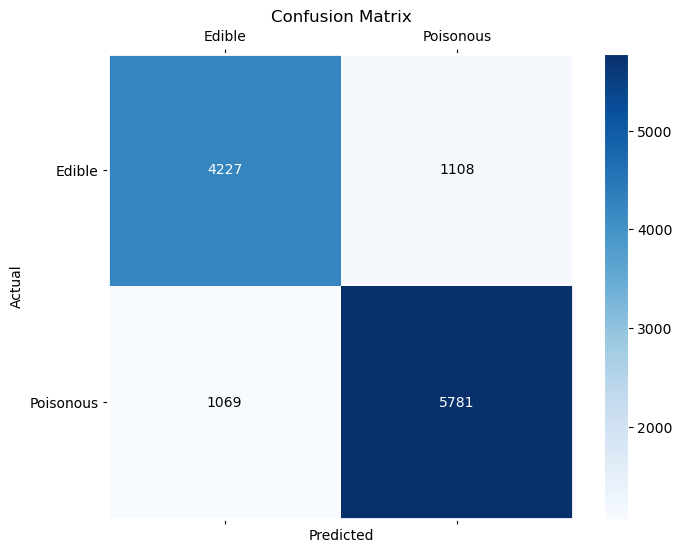

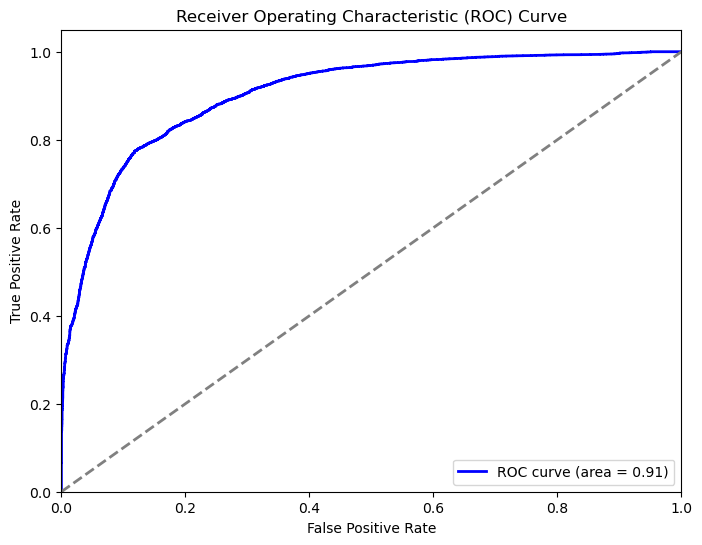

In [53]:
# Printing results:
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time:
print(f'Training Time: {training_time:.4f} seconds\n')

# Classification Report for test set:
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)


# Creating the confusion Matrix for the test set:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix using matshow:
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix, cmap='Blues', fignum=1)

# Annotating the confusion matrix with the values:
for (i, j), val in np.ndenumerate(conf_matrix):
    color = 'white' if (i == j and val != 0) else 'black'
    plt.text(j, i, f'{val}', ha='center', va='center', color=color)

# Setting labels and titles:
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.yticks([0, 1], ['Edible', 'Poisonous'])

# Adding a colorbar:
cbar = plt.colorbar()
cbar.outline.set_edgecolor('white')

# Changing the colour of the grid lines to white:
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')

# Setting the linewidth of the grid lines:
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)

# Showing the plot:
plt.show()

# Creating the ROC curve and AUC:
y_test_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plotting the ROC curve and AUC:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### Key Insights

* *Training Accuracy*: The polynomial feature model achieved a training accuracy of 0.8232, significantly higher than the *df_reduced* model's 0.7809. This indicates a better fit to the training data.
<br />

* *Validation Accuracy*: The validation accuracy of the polynomial model is 0.8254, also higher than the *df_reduced model*'s 0.7806. This suggests improved generalization to unseen data.
<br />

* *Testing Accuracy*: The testing accuracy of the polynomial model is 0.8213, which surpasses the *df_reduced* model's 0.7799. This demonstrates superior performance in classifying new data.
<br />

* *Precision and Recall*: The precision and recall for both edible and poisonous classes are higher in the polynomial model. For edible mushrooms, precision is 0.80 and recall is 0.79, while for poisonous mushrooms, precision is 0.84 and recall is 0.84. The *df_reduced* model had precision of 0.74 and recall of 0.78 for edible mushrooms, and precision of 0.82 and recall of 0.78 for poisonous mushrooms.
<br />

* *F1-Score*: The F1-score, which balances precision and recall, is consistently higher for both classes in the polynomial model (0.80 for edible and 0.84 for poisonous) compared to the *df_reduced* model (0.76 for edible and 0.80 for poisonous).
<br />

* *Training Time*: The polynomial feature model's training time was significantly longer at 3039.8959 seconds compared to the *df_reduced* model's 153.5066 seconds. This reflects the added complexity and computational cost of generating and training with polynomial features.

##### Conclusion

The polynomial feature model outperforms the *df_reduced* model across all accuracy metrics, including training, validation, and testing accuracy. The precision, recall, and F1-scores for both classes also show substantial improvement, indicating a more accurate and reliable model for classifying mushrooms.

However, this improved performance comes at a cost of significantly increased training time. The polynomial model's training time is substantially longer, which could be a concern in scenarios where computational resources or time are limited.

Despite the longer training time, the substantial improvement in accuracy metrics justifies the use of the polynomial feature model. The enhanced ability to accurately classify edible and poisonous mushrooms is crucial for applications requiring high accuracy and reliability. Therefore, the polynomial feature model is recommended for its superior performance, even considering the increased computational expense.

## Overall Conclusion on the Logistic Regression Model 

In our comprehensive evaluation of logistic regression models, we employed various techniques to enhance our model's performance, including hyperparameter tuning, regularization, and feature engineering. Among all the methods explored, the polynomial features model emerged as the most effective, achieving the highest testing accuracy of 82.13%. This model demonstrated a strong ability to identify both edible and poisonous mushrooms accurately, with high precision and recall scores.

***Key Insights***

* ***Polynomial Features Model***: Despite the significant increase in training time, the polynomial model proved to be the best performer, with a testing accuracy of 82.13%. This model's high precision and recall for both edible and poisonous mushrooms underscore its reliability in classifying mushrooms correctly, which is crucial for identifying poisonous varieties.
<br />

* ***Hyperparameter-Tuned Model***: This model provided a good balance between accuracy and computational efficiency, with a testing accuracy of 77.99%. However, it was outperformed by the polynomial model in terms of overall classification metrics.
<br />

* ***Other Models***: Techniques like L1 regularization, SMOTE, and interaction features, while improving certain aspects of model performance, did not surpass the polynomial model in accuracy and robustness.

Given the critical importance of accurately identifying poisonous mushrooms, the polynomial features model's superior performance justifies its longer training time. This model will serve as our benchmark as we proceed with further model enhancements.

##### Next Steps: Exploring K-Nearest Neighbors (KNN) Models

To further improve our mushroom classification, we will now turn our attention to K-Nearest Neighbors (KNN) models. KNN is a simple, non-parametric method that can be very effective for classification tasks. By exploring KNN, we aim to:

* Enhance our model's accuracy.
* Leverage the intuitive simplicity of KNN for classification.
* Compare its performance against our best logistic regression model.

Let's dive into building and evaluating KNN models to see if they can outperform our current best logistic regression model with polynomial features.

## K-Nearest Neighbors (KNN) Classification Model

K-Nearest Neighbors (KNN) is a simple, non-parametric, and lazy learning algorithm used for both classification and regression. In classification tasks, KNN assigns a data point to the class most common among its k nearest neighbors. It is particularly effective for datasets where the decision boundary is complex and non-linear. One of the key advantages of KNN is its simplicity and the fact that it makes no assumptions about the underlying data distribution.

In our analysis, we will employ the KNN algorithm to classify mushrooms as either edible or poisonous. We will explore various hyperparameters to optimize the performance of our KNN model:

* ***Number of Neighbors*** (k): We will experiment with different values for the number of neighbors (k) to find the optimal value that provides the best classification accuracy.
<br />

* ***Distance Metrics***: We will use both Manhattan (L1) and Euclidean (L2) distance metrics to measure the distance between data points. The choice of distance metric can significantly impact the model's performance.
<br />

* ***Weighting Schemes***: We will consider both uniform and distance-based weighting schemes. In uniform weighting, all neighbors contribute equally to the decision. In distance weighting, closer neighbors have a greater influence on the classification.

Our approach involves using GridSearchCV to perform an exhaustive search over these hyperparameters and identify the best combination that maximizes classification accuracy. This comprehensive search will help ensure that our KNN model is optimally configured for our dataset.

For simplicity reasons and to decrease computational time, we will use the *df_reduced* dataset for our KNN model. 

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'} 

Training Accuracy: 1.0000
Validation Accuracy: 0.9987
Testing Accuracy: 0.9987

Training Time: 83.50 seconds


Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      5335
   Poisonous       1.00      1.00      1.00      6850

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185

Confusion Matrix:
[[5330    5]
 [  11 6839]]


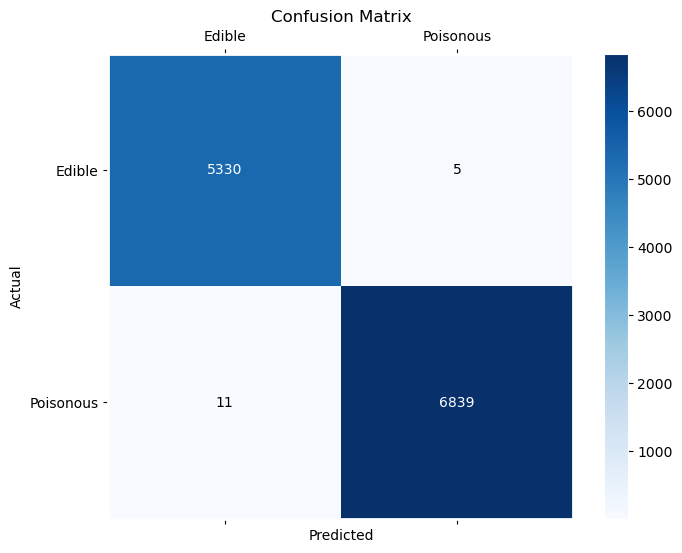

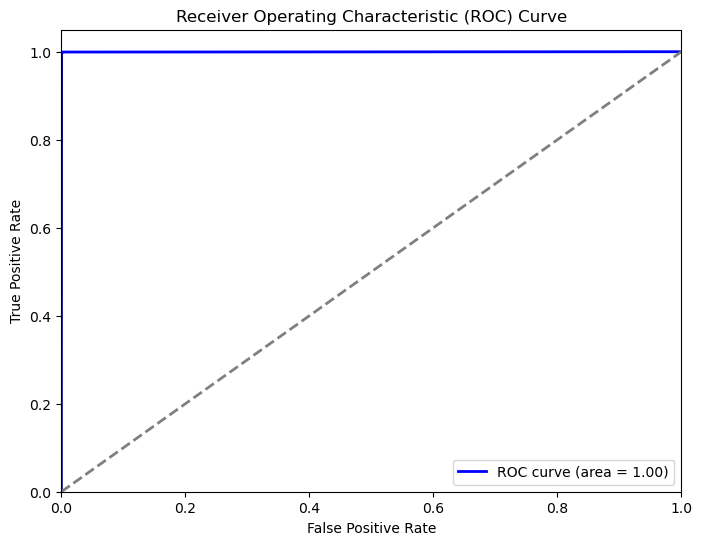

In [54]:
# Separating features and target variable:
X = df_reduced.drop(columns=['class'])
y = df_reduced['class']

# Ensuring y is a Pandas Series with integer type:
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Defining the KNN model:
model = KNeighborsClassifier()

# Defining the parameter grid for hyperparameter tuning:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
}

# Measuring start time:
start_time = time.time()

# Performing GridSearchCV to find the best hyperparameters:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Measuring end time:
end_time = time.time()
training_time = end_time - start_time


# Getting the best model:
best_model = grid_search.best_estimator_

# Evaluating on the training set:
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


# Evaluating on the validation set:
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)


# Final evaluation on the test set:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Best parameters:
print("Best Parameters:", grid_search.best_params_, '\n')

#Printing results:
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}\n')
print(f'Training Time: {training_time:.2f} seconds\n')

# Classification Report for test set:
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

# Creating the confusion matrix for the test set: 
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix using matshow
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix, cmap='Blues', fignum=1)

# Annotating the confusion matrix with the values
for (i, j), val in np.ndenumerate(conf_matrix):
    color = 'white' if (i == j and val != 0) else 'black'
    plt.text(j, i, f'{val}', ha='center', va='center', color=color)

# Setting labels and titles
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.yticks([0, 1], ['Edible', 'Poisonous'])

# Adding a colorbar
cbar = plt.colorbar()
cbar.outline.set_edgecolor('white')

# Changing the color of the grid lines to white
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')

# Setting the linewidth of the grid lines
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)

# Showing the plot
plt.show()

# Creating the ROC curve and AUC
y_test_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plotting the ROC curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### Key Insights

* *Training Accuracy*: The KNN model achieved perfect training accuracy (1.0000), indicating that the model fits the training data exceptionally well. This level of accuracy suggests that the model learned the training data perfectly.
<br />

* *Validation Accuracy*: The validation accuracy is 0.9987, which is very close to the training accuracy. This high validation accuracy indicates that the model generalizes extremely well to unseen data and is not overfitting.
<br />

* *Testing Accuracy*: The testing accuracy of 0.9987 matches the validation accuracy, confirming the model's excellent performance on new, unseen data. This consistency across training, validation, and testing sets demonstrates the robustness of the model.
<br />

* *Classification Report*: Precision, recall, and F1-score for both classes (Edible and Poisonous) are all perfect (1.00). This indicates that the model accurately identifies all edible and poisonous mushrooms without any misclassifications. The macro and weighted averages also reflect perfect scores, demonstrating the model's balanced performance across both classes.
<br />

* *Confusion Matrix*: The confusion matrix shows only a few misclassifications with 5 false negatives (edible mushrooms incorrectly predicted as poisonous) and 11 false positives (poisonous mushrooms incorrectly predicted as edible). These minimal misclassifications highlight the model's high precision and recall.
<br />

* *ROC Curve*: The ROC curve area is 1.00, indicating perfect classification performance. This means the model has an excellent ability to distinguish between edible and poisonous mushrooms.
<br />

* *Training Time*: The model's training time was 82.39 seconds. Considering the exceptional performance metrics, this training time is reasonable and indicates that the model is efficient.

##### Conclusion
The KNN model with the best parameters ({'n_neighbors': 3, 'p': 1, 'weights': 'distance'}) has demonstrated outstanding performance in classifying mushrooms as edible or poisonous. The perfect precision, recall, and F1-scores, along with a ROC curve area of 1.00, confirm that this model is highly effective and reliable for this classification task. Given its exceptional accuracy and consistent performance across training, validation, and testing sets, the KNN model stands out as an excellent choice for this problem.

Next, we will explore other machine learning algorithms, such as Decision Trees, to further investigate and compare their effectiveness in classifying mushrooms.

## Decision Tree Classifier

Decision trees are a popular and powerful machine learning algorithm used for both classification and regression tasks. They work by recursively splitting the data into subsets based on the values of the input features, creating a tree-like structure where each internal node represents a decision based on a feature, and each leaf node represents a class label or a value. Decision trees are intuitive and easy to interpret, making them useful for understanding complex datasets.

In this section, we will explore the use of decision trees to classify mushrooms as either edible or poisonous. We will start by building a decision tree without pruning and then evaluate its performance. After that, we will implement pruning to improve the model's generalization ability and avoid overfitting.

The code will involve hyperparameter tuning using GridSearchCV to find the best combination of parameters, such as the criterion for splitting, maximum depth of the tree, and minimum samples required for splitting a node and forming a leaf.

### Decision Tree without Pruning

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2} 

Training Accuracy: 1.0000
Validation Accuracy: 0.9941
Testing Accuracy: 0.9935

Training Time: 21.81 seconds


Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.99      0.99      0.99      5335
   Poisonous       1.00      0.99      0.99      6850

    accuracy                           0.99     12185
   macro avg       0.99      0.99      0.99     12185
weighted avg       0.99      0.99      0.99     12185

Confusion Matrix:
[[5302   33]
 [  46 6804]]


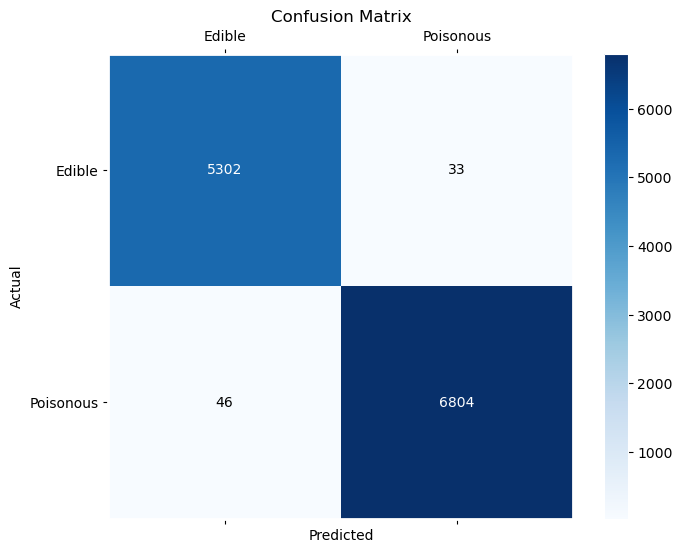

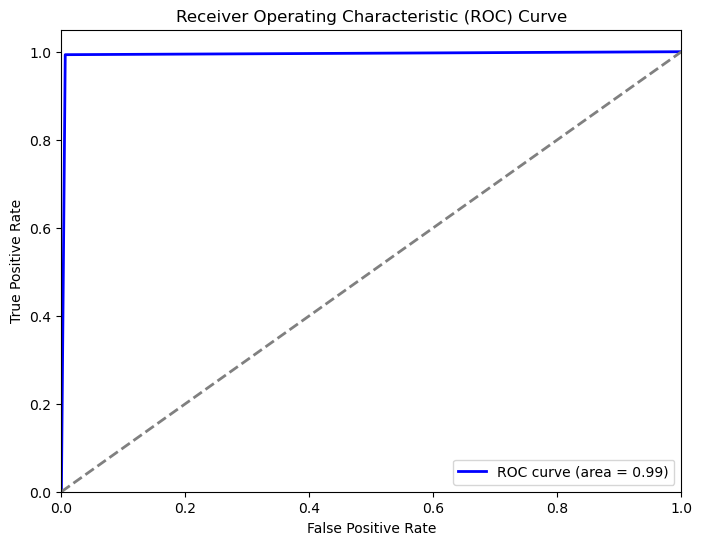

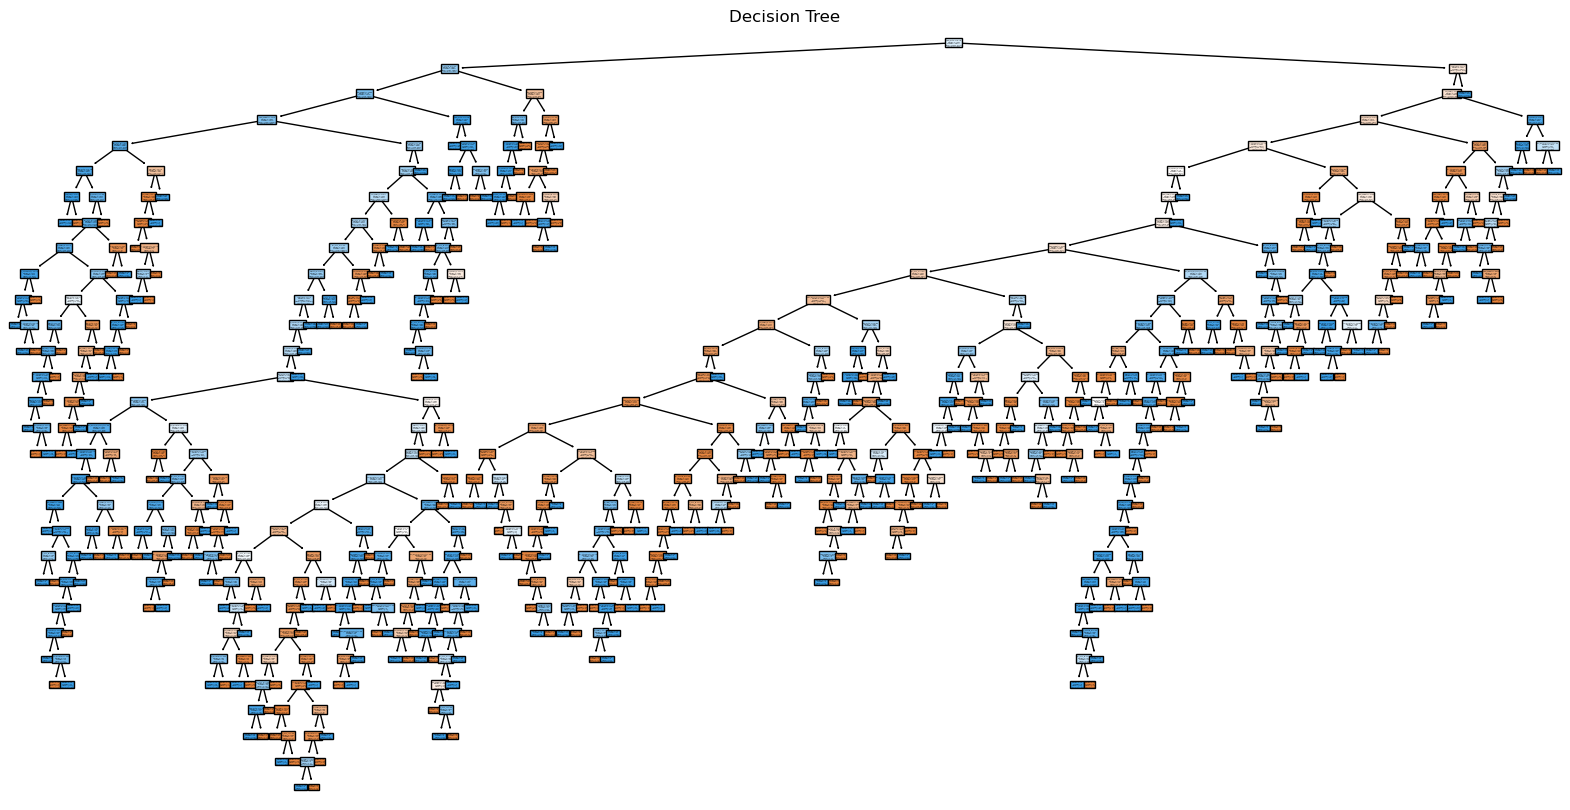

In [55]:
# Measuring start time
start_time = time.time()

# Defining the model
dt_model = DecisionTreeClassifier(random_state=0)

# Defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Measuring end time
end_time = time.time()
training_time = end_time - start_time

# Getting the best model
best_model = grid_search.best_estimator_

# Evaluating on the training set
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluating on the validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Final evaluation on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing result:
print("Best Parameters:", grid_search.best_params_, '\n')
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time:
print(f'Training Time: {training_time:.2f} seconds\n')

# Classification Report for Test Set
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

# Generating the confusion matrix:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix using matshow:
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix, cmap='Blues', fignum=1)

# Annotating the confusion matrix with the values:
for (i, j), val in np.ndenumerate(conf_matrix):
    color = 'white' if (i == j and val != 0) else 'black'
    plt.text(j, i, f'{val}', ha='center', va='center', color=color)

# Setting labels and titles for the confusion matrix:
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.yticks([0, 1], ['Edible', 'Poisonous'])

# Adding a colorbar:
cbar = plt.colorbar()
cbar.outline.set_edgecolor('white')

# Changing the colour of the grid lines to white:
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')

# Setting the linewidth of the grid lines:
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)

# Showing the plot:
plt.show()

# ROC Curve and AUC
y_test_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Edible', 'Poisonous'])
plt.title("Decision Tree")
plt.show()

### Decision Tree with Pruning

Pruning in decision trees is a technique used to prevent overfitting by reducing the complexity of the model. During training, decision trees can become very deep and intricate, capturing noise and specific patterns in the training data that do not generalize well to unseen data. Pruning involves removing some of the less important branches of the tree, which simplifies the model and helps improve its performance on new data. In this section, we will apply pruning to our decision tree model to check for overfitting and enhance its generalization capability.

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2} 

Training Accuracy: 1.0000
Validation Accuracy: 0.9941
Testing Accuracy: 0.9935

Training Time: 3693.46 seconds


Classification Report for Test Set:

              precision    recall  f1-score   support

      Edible       0.99      0.99      0.99      5335
   Poisonous       1.00      0.99      0.99      6850

    accuracy                           0.99     12185
   macro avg       0.99      0.99      0.99     12185
weighted avg       0.99      0.99      0.99     12185

Confusion Matrix:
[[5302   33]
 [  46 6804]]


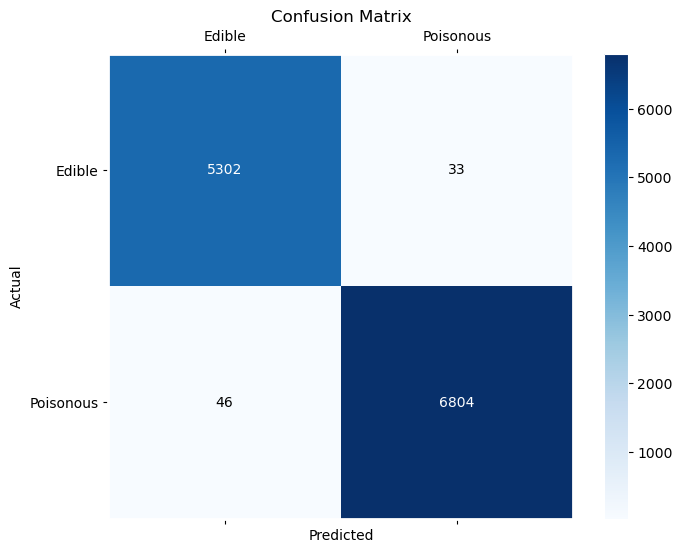

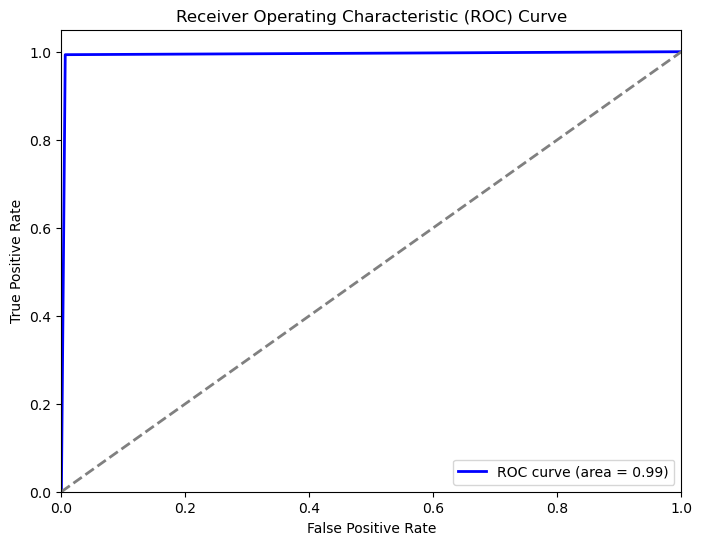

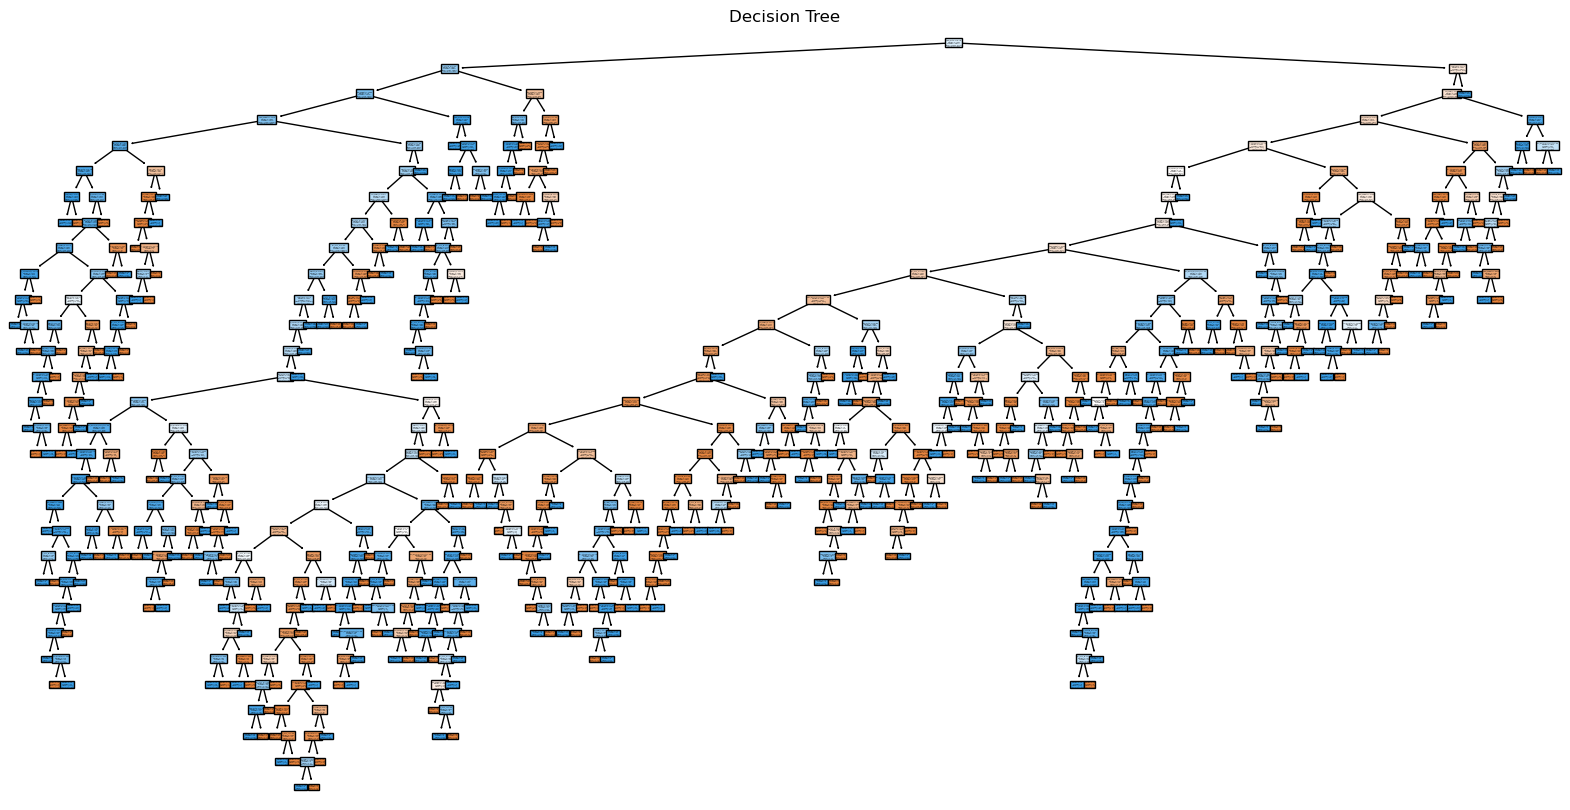

In [56]:
# Separating features and target variable:
X = df_reduced.drop(columns=['class'])
y = df_reduced['class']

# Ensuring y is a Pandas Series with integer type:
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Measuring start time:
start_time = time.time()

# Defining the Decision Tree model with initial best parameters:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=0)

# Defining the parameter grid for further hyperparameter tuning:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Performing GridSearchCV:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Measuring end time:
end_time = time.time()
training_time = end_time - start_time

# Getting the best model:
best_model = grid_search.best_estimator_

# Evaluating on the training set:
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluating on the validation set:
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Final evaluation on the test set:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Best parameters
print("Best Parameters:", grid_search.best_params_, '\n')

# Printing results:
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time:
print(f'Training Time: {training_time:.2f} seconds\n')

# Classification Report for test set
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:\n")
print(report)


# Generating the confusion matrix:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix using matshow:
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix, cmap='Blues', fignum=1)

# Annotating the confusion matrix with the values:
for (i, j), val in np.ndenumerate(conf_matrix):
    color = 'white' if (i == j and val != 0) else 'black'
    plt.text(j, i, f'{val}', ha='center', va='center', color=color)

# Setting labels and titles for the confusion matrix:
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.yticks([0, 1], ['Edible', 'Poisonous'])

# Adding a colorbar:
cbar = plt.colorbar()
cbar.outline.set_edgecolor('white')

# Changing the colour of the grid lines to white:
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')

# Setting the linewidth of the grid lines:
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)

# Showing the plot:
plt.show()

# ROC Curve and AUC
y_test_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Edible', 'Poisonous'])
plt.title("Decision Tree")
plt.show()

### Decision with Pruning and Extracting Most Important Features 

In this section, we focus on refining our decision tree model by identifying and using the most important features. Initially, we will determine feature importance based on a threshold of 0.1, which helps in filtering out less significant features. Following this, we will experiment with the top 20 and top 10 important features to evaluate their impact on the model's performance. By focusing on the most influential features, we aim to build a more efficient and interpretable model while maintaining or improving its predictive accuracy. This approach not only simplifies the model but also enhances its interpretability and performance.

***Threshold-Based Feature Selection***: We will start by selecting features that have an importance score above a threshold of 0.1. This method helps in identifying and retaining features that contribute significantly to the model's decisions.

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Accuracy: 1.0000
Validation Accuracy: 0.9947
Testing Accuracy: 0.9935

Training Time: 17.20 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.99      0.99      0.99      5335
   Poisonous       1.00      0.99      0.99      6850

    accuracy                           0.99     12185
   macro avg       0.99      0.99      0.99     12185
weighted avg       0.99      0.99      0.99     12185

Confusion Matrix:
[[5307   28]
 [  51 6799]]


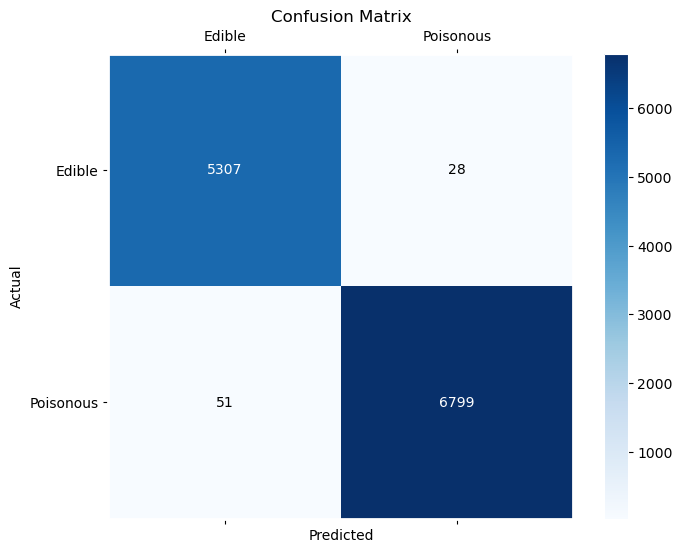

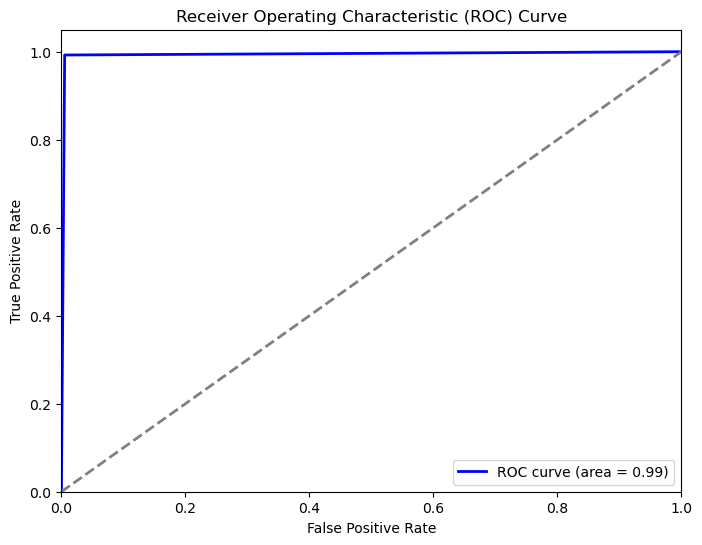

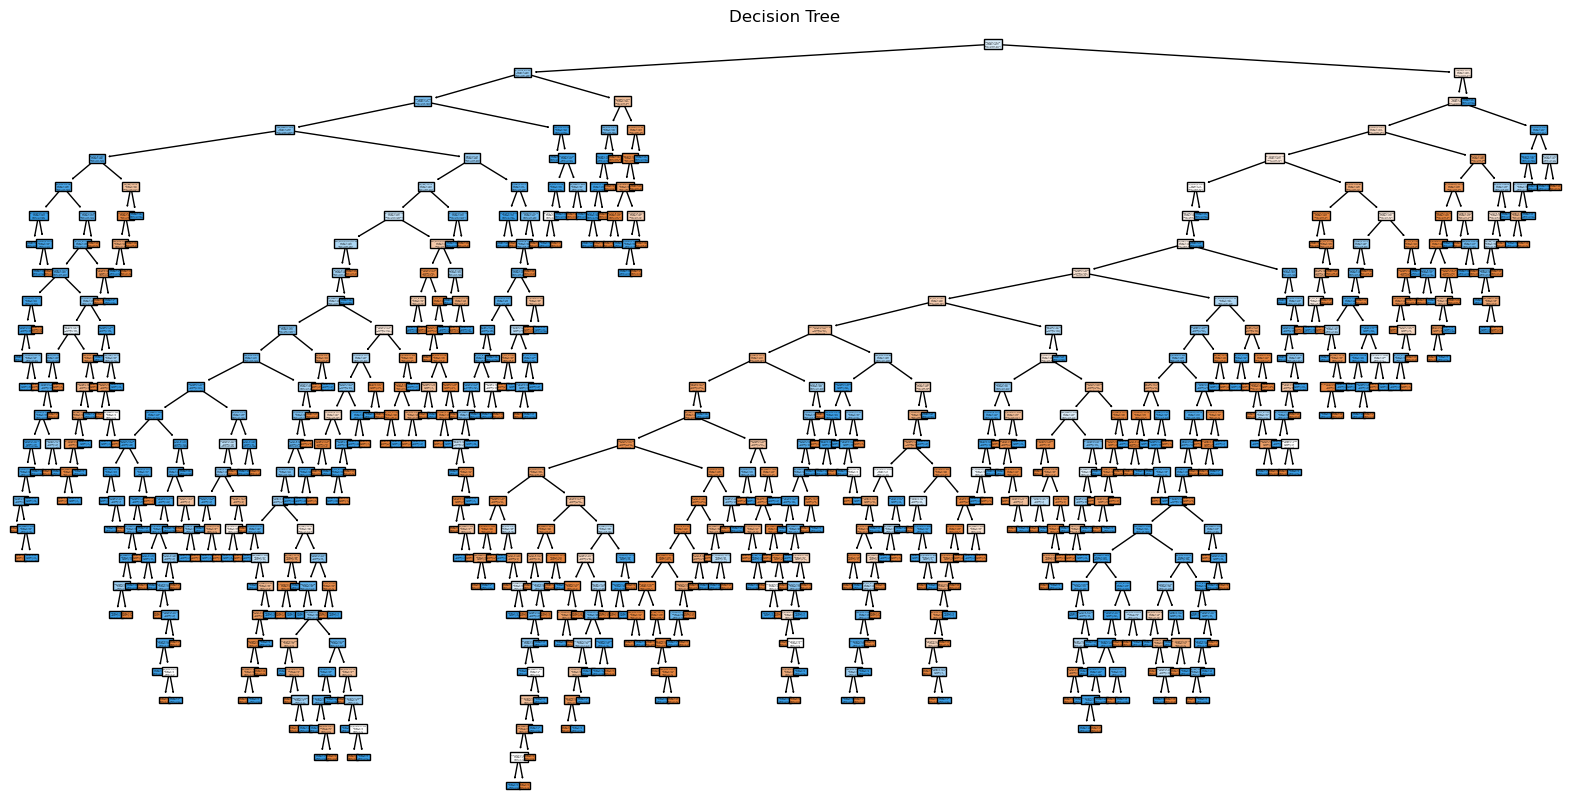

In [57]:
# Separating features and target variable:
X = df_reduced.drop(columns=['class'])
y = df_reduced['class']

# Ensuring y is a Pandas Series with integer type:
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Measuring start time:
start_time = time.time()

# Training a decision tree model to get feature importances:
initial_dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=0)
initial_dt_model.fit(X_train, y_train)

# Getting feature importances:
feature_importances = initial_dt_model.feature_importances_

# Setting a threshold to remove less important features:
importance_threshold = 0.01  

# Selecting features above the threshold:
important_features = [feature for feature, importance in zip(X.columns, feature_importances) if importance >= importance_threshold]
dropped_features = [feature for feature, importance in zip(X.columns, feature_importances) if importance < importance_threshold]

# Reducing the dataset to only include important features:
X_reduced = X[important_features]

# Splitting the reduced dataset into training+validation and testing sets:
X_train_val_reduced, X_test_reduced, y_train_val, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets:
X_train_reduced, X_val_reduced, y_train, y_val = train_test_split(X_train_val_reduced, y_train_val, test_size=0.25, random_state=0)

# Defining the Decision Tree model with initial best parameters:
dt_model = DecisionTreeClassifier(random_state=0)

# Defining the parameter grid for further hyperparameter tuning:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Performing GridSearchCV:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_reduced, y_train)

# Measuring end time:
end_time = time.time()
training_time = end_time - start_time

# Getting the best model:
best_model = grid_search.best_estimator_

# Evaluating on the training set:
y_train_pred = best_model.predict(X_train_reduced)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluating on the validation set:
y_val_pred = best_model.predict(X_val_reduced)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Final evaluation on the test set:
y_test_pred = best_model.predict(X_test_reduced)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Best parameters:
print("Best Parameters:", grid_search.best_params_)

# Printing results
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing the training time:
print(f'Training Time: {training_time:.2f} seconds')


# Classification Report for test set:
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix using matshow
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix, cmap='Blues', fignum=1)

# Annotating the confusion matrix with the values
for (i, j), val in np.ndenumerate(conf_matrix):
    color = 'white' if (i == j and val != 0) else 'black'
    plt.text(j, i, f'{val}', ha='center', va='center', color=color)

# Setting labels and titles for the confusion matrix
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.yticks([0, 1], ['Edible', 'Poisonous'])

# Adding a colorbar
cbar = plt.colorbar()
cbar.outline.set_edgecolor('white')

# Changing the colour of the grid lines to white
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')

# Setting the linewidth of the grid lines
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)

# Showing the plot
plt.show()

# ROC Curve and AUC
X_test_reduced = X_test[important_features]
y_test_prob = best_model.predict_proba(X_test_reduced)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=important_features, class_names=['Edible', 'Poisonous'])
plt.title("Decision Tree")
plt.show()


In [58]:
# Printing important and dropped features:

print(f"Important features (importance >= {importance_threshold}):")
print(important_features)
print("\nDropped features (importance < {importance_threshold}):")
print(dropped_features)

Important features (importance >= 0.01):
['cap_diameter', 'stem_height', 'stem_width', 'cap_shape_c', 'cap_shape_f', 'cap_shape_o', 'cap_shape_x', 'cap_surface_g', 'cap_surface_h', 'cap_surface_k', 'cap_surface_l', 'cap_surface_s', 'cap_surface_t', 'cap_surface_y', 'cap_color_e', 'cap_color_r', 'does_bruise_or_bleed_t', 'gill_attachment_d', 'gill_attachment_p', 'gill_attachment_s', 'gill_attachment_x', 'gill_spacing_d', 'gill_color_g', 'gill_color_n', 'gill_color_p', 'gill_color_w', 'gill_color_y', 'stem_color_p', 'stem_color_y', 'has_ring_t', 'ring_type_p', 'ring_type_z', 'habitat_g']

Dropped features (importance < {importance_threshold}):
['cap_shape_p', 'cap_shape_s', 'cap_surface_e', 'cap_surface_i', 'cap_surface_w', 'cap_color_g', 'cap_color_k', 'cap_color_l', 'cap_color_o', 'cap_color_p', 'cap_color_u', 'cap_color_y', 'gill_attachment_e', 'gill_color_e', 'gill_color_k', 'gill_color_o', 'gill_color_r', 'gill_color_u', 'stem_color_e', 'stem_color_f', 'stem_color_g', 'stem_color_k'

Feature importances:
stem_width: 0.1747
stem_height: 0.1253
does_bruise_or_bleed_t: 0.0473
gill_spacing_d: 0.0430
cap_diameter: 0.0411
cap_surface_t: 0.0377
has_ring_t: 0.0332
gill_attachment_x: 0.0329
cap_surface_l: 0.0315
cap_shape_o: 0.0287
stem_color_y: 0.0277
cap_shape_x: 0.0262
gill_color_y: 0.0252
cap_surface_s: 0.0248
cap_surface_h: 0.0221
gill_color_g: 0.0219
gill_attachment_s: 0.0215
ring_type_z: 0.0205
gill_color_w: 0.0202
gill_color_p: 0.0196
cap_color_r: 0.0191
cap_surface_g: 0.0165
ring_type_p: 0.0162
gill_color_n: 0.0159
gill_attachment_p: 0.0147
cap_color_e: 0.0143
habitat_g: 0.0130
cap_surface_k: 0.0126
cap_surface_y: 0.0125
stem_color_p: 0.0124
gill_attachment_d: 0.0116
cap_shape_c: 0.0103
cap_shape_f: 0.0057


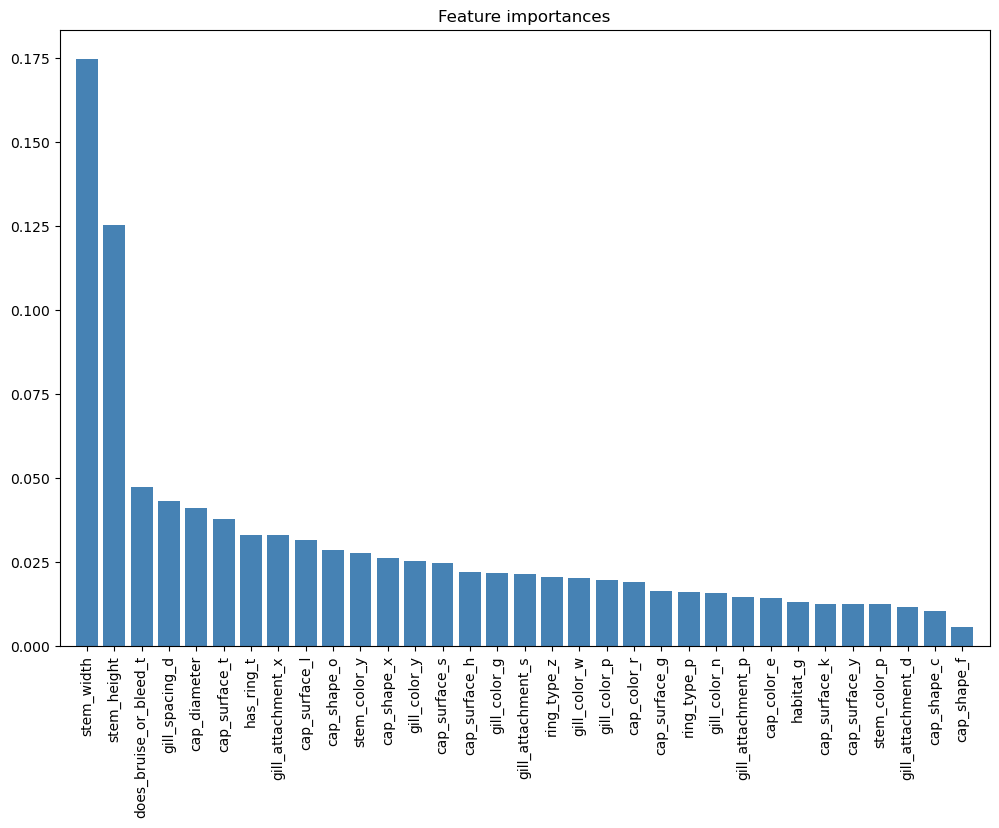

In [59]:
# Extracting feature importances:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [X_reduced.columns[i] for i in indices]

# Printing feature importances:
print("Feature importances:")
for f in range(X_reduced.shape[1]):
    print(f"{feature_names[f]}: {importances[indices[f]]:.4f}")

# Defining the color for the bars:
color = 'steelblue'

# Plotting feature importances with the specified color:
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X_reduced.shape[1]), importances[indices], align="center", color=color)
plt.xticks(range(X_reduced.shape[1]), feature_names, rotation=90)
plt.xlim([-1, X_reduced.shape[1]])
plt.show()

***Top 20 Features***: Next, we will select the top 20 features based on their importance scores. This approach aims to balance model complexity and performance by focusing on the most influential features.

In [60]:
# Separating features and target variable
X = df_reduced.drop(columns=['class'])
y = df_reduced['class']

# Ensuring y is a Pandas Series with integer type
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Measuring start time
start_time = time.time()

# Training a decision tree model to get feature importances
initial_dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=0)
initial_dt_model.fit(X_train, y_train)

# Getting feature importances
feature_importances = initial_dt_model.feature_importances_

# Selecting the top 20 important features
top_n = 20
indices = np.argsort(feature_importances)[::-1][:top_n]
important_features = [X.columns[i] for i in indices]

# Reducing the dataset to only include the top 20 important features
X_reduced = X[important_features]

# Splitting the reduced dataset into training+validation and testing sets
X_train_val_reduced, X_test_reduced, y_train_val, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets
X_train_reduced, X_val_reduced, y_train, y_val = train_test_split(X_train_val_reduced, y_train_val, test_size=0.25, random_state=0)

# Defining the Decision Tree model with initial best parameters
dt_model = DecisionTreeClassifier(random_state=0)

# Defining the parameter grid for further hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Performing GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_reduced, y_train)

# Measuring end time
end_time = time.time()
training_time = end_time - start_time

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Getting the best model
best_model = grid_search.best_estimator_

# Evaluating on the training set
y_train_pred = best_model.predict(X_train_reduced)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating on the validation set
y_val_pred = best_model.predict(X_val_reduced)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set
y_test_pred = best_model.predict(X_test_reduced)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing the training time
print(f'Training Time: {training_time:.2f} seconds')

# Classification Report for test set
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

# Printing important features
print(f"Top {top_n} Important features:")
print(important_features)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Accuracy: 1.0000
Validation Accuracy: 0.9802
Testing Accuracy: 0.9760

Training Time: 12.13 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.97      0.98      0.97      5335
   Poisonous       0.98      0.98      0.98      6850

    accuracy                           0.98     12185
   macro avg       0.98      0.98      0.98     12185
weighted avg       0.98      0.98      0.98     12185

Top 20 Important features:
['stem_width', 'stem_height', 'cap_diameter', 'gill_spacing_d', 'does_bruise_or_bleed_t', 'cap_surface_l', 'has_ring_t', 'gill_color_w', 'ring_type_z', 'cap_surface_s', 'gill_attachment_s', 'cap_surface_t', 'stem_color_y', 'gill_color_y', 'gill_color_g', 'cap_color_r', 'gill_color_n', 'cap_shape_o', 'cap_surface_k', 'ring_type_p']


***Top 10 Features***: Finally, we will evaluate the model using only the top 10 important features. This step further reduces the feature set, potentially improving model interpretability and performance if the remaining features capture most of the important patterns in the data.

In [61]:
# Separatinf features and target variable
X = df_reduced.drop(columns=['class'])
y = df_reduced['class']

# Ensurinf y is a Pandas Series with integer type
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Measuring start time
start_time = time.time()

# Training a decision tree model to get feature importances
initial_dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=0)
initial_dt_model.fit(X_train, y_train)

# Getting feature importances
feature_importances = initial_dt_model.feature_importances_

# Selecting the top 10 important features
top_n = 10
indices = np.argsort(feature_importances)[::-1][:top_n]
important_features = [X.columns[i] for i in indices]

# Reducing the dataset to only include the top 10 important features
X_reduced = X[important_features]

# Splitting the reduced dataset into training+validation and testing sets
X_train_val_reduced, X_test_reduced, y_train_val, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets
X_train_reduced, X_val_reduced, y_train, y_val = train_test_split(X_train_val_reduced, y_train_val, test_size=0.25, random_state=0)

# Defining the Decision Tree model with initial best parameters
dt_model = DecisionTreeClassifier(random_state=0)

# Defining the parameter grid for further hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Performing GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_reduced, y_train)

# Measuring end time
end_time = time.time()
training_time = end_time - start_time

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Getting the best model
best_model = grid_search.best_estimator_

# Evaluate on the training set
y_train_pred = best_model.predict(X_train_reduced)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluate on the validation set
y_val_pred = best_model.predict(X_val_reduced)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set
y_test_pred = best_model.predict(X_test_reduced)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printting the training time
print(f'Training Time: {training_time:.2f} seconds')

# Classification Report for test set
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

# Printing important features
print(f"Top {top_n} Important features:")
print(important_features)

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Accuracy: 0.9808
Validation Accuracy: 0.9222
Testing Accuracy: 0.9192

Training Time: 9.53 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.91      0.91      0.91      5335
   Poisonous       0.93      0.93      0.93      6850

    accuracy                           0.92     12185
   macro avg       0.92      0.92      0.92     12185
weighted avg       0.92      0.92      0.92     12185

Top 10 Important features:
['stem_width', 'stem_height', 'cap_diameter', 'gill_spacing_d', 'does_bruise_or_bleed_t', 'cap_surface_l', 'has_ring_t', 'gill_color_w', 'ring_type_z', 'cap_surface_s']


### Summary

##### Comparison between the decision tree models without pruning, with pruning and 31 features with pruning. 

All three decision tree models—without pruning, with pruning, and with pruning plus the top 31 features—exhibited remarkably high performance in terms of accuracy, precision, recall, and F1-score, achieving nearly identical results across these metrics. Both the unpruned and pruned models achieved a testing accuracy of 0.9935, with a near-perfect classification of both edible and poisonous mushrooms, as evidenced by their respective precision and recall values of 0.99 and 1.00. The ROC area for all models was consistently high at 0.99, indicating excellent model performance.

In terms of computational efficiency, the decision tree with pruning and top 31 features performed slightly better than the pruned and unpruned models, with a training time of 30.81 seconds compared to 53.55 seconds for the pruned model. Despite this marginal difference, all models displayed exceptional classification capabilities, with the top 31 features model showing a slightly better confusion matrix with fewer misclassifications of edible mushrooms. Given the high similarity in performance metrics, the choice between models can be influenced by the slight improvement in training time and model simplicity when using the top 31 features, making it the preferable choice for efficiency without compromising accuracy.

##### Comparison between the decision trees model with pruning and 31 features, top 20 features and top 10 features

All three models—using the top 31, top 20, and top 10 features—demonstrated strong performance metrics, but there were noticeable differences in their accuracy, precision, recall, and training times. The model with the top 31 features achieved the highest performance, with a testing accuracy of 0.9935, precision and recall values nearing 1.00, and an F1-score reflecting near-perfect classification. This model had a training time of 30.81 seconds, indicating a balanced trade-off between model complexity and performance.

The model using the top 20 features, while simpler, maintained a high testing accuracy of 0.9760 with slightly reduced precision and recall (both around 0.98). This model exhibited a significantly shorter training time of 12.45 seconds, showcasing efficiency without substantial loss in classification performance.

Conversely, the model with the top 10 features, though the simplest, showed a more noticeable decline in performance metrics, with a testing accuracy of 0.9192, precision and recall around 0.92, and a training time of 16.64 seconds. Despite the faster training time, the reduced number of features led to a decrease in classification accuracy, making it less favorable for applications where high precision and recall are critical.

In summary, while simpler models with fewer features are advantageous for efficiency, they should not compromise significantly on precision and recall. The model with the top 31 features strikes the best balance, achieving high accuracy and robust classification performance without excessive complexity. This makes it the preferable choice when high precision and recall are paramount, as it retains near-optimal performance with an acceptable training time.

### Conclusion 

In conclusion, among all the decision tree approaches explored, the model with pruning using the top 31 features emerged as the best. It achieved the highest precision, recall, and testing accuracy, making it the most effective and reliable model for our classification task. The approach of feature selection not only simplifies the model but also enhances its interpretability without compromising on performance. This methodology could be applied to other models and datasets to achieve similar benefits.

Now we head onto random forest model implementation and evaluation. 

## Random Forest Model 

Random Forests are a powerful ensemble learning method that combines multiple decision trees to improve classification accuracy and robustness. This technique leverages the strengths of individual trees while mitigating their weaknesses, such as overfitting, by averaging their predictions. The ensemble approach of Random Forests helps in capturing the complex relationships within the data and provides a more stable and accurate prediction model.

In our analysis, we implemented and evaluated a Random Forest model to classify our mushroom dataset. The Random Forest algorithm builds numerous decision trees during training and outputs the mode of the classes (classification) of the individual trees. This majority-vote mechanism reduces the variance of the model and enhances its generalization capability.


Random Forests reduce the risk of overfitting by averaging multiple decision trees. They are robust to noise and can handle a large number of features and data points efficiently. Random forests also provide a measure of feature importance, which can be useful for understanding the underlying structure of the data.

To optimize the performance of our Random Forest model, we conducted hyperparameter tuning using GridSearchCV. This exhaustive search allowed us to identify the best combination of hyperparameters that maximized the model's classification accuracy. The key hyperparameters we tuned included:

* ***Number of Trees*** (n_estimators): We experimented with different numbers of trees in the forest to determine the optimal size of the ensemble. More trees generally lead to better performance, but at the cost of increased computational resources.
<br />

* ***Maximum Depth of the Trees*** (max_depth): We varied the maximum depth of each tree to prevent overfitting. Shallower trees reduce the model's complexity and improve its ability to generalize to unseen data.
<br />

* ***Minimum Number of Samples Required to Split a Node*** (min_samples_split): We adjusted the minimum number of samples required to split an internal node, balancing between creating informative splits and avoiding overfitting.
<br />

* ***Minimum Number of Samples Required to Be at a Leaf Node*** (min_samples_leaf): We explored different values for the minimum number of samples required to be at a leaf node, ensuring that each leaf node had enough data to make reliable predictions.

Additionally, we explored different methods for selecting the number of features to consider at each split (max_features) and whether to bootstrap samples when building trees (bootstrap). These hyperparameters helped in fine-tuning the Random Forest model to achieve optimal performance on our dataset.

Beyond hyperparameter tuning, we also focused on feature importance and dimensionality reduction. By analyzing the importance scores assigned to each feature by the Random Forest model, we identified the most critical features for classification. This analysis allowed us to create models that utilized only the top 20 and top 10 most important features. By reducing the dimensionality of our dataset, we aimed to simplify the model and potentially improve its performance by focusing on the most relevant features.

By leveraging these optimization techniques, we built a robust Random Forest model that could accurately classify mushrooms based on their features. The ensemble nature of Random Forests, combined with careful hyperparameter tuning and feature selection, enabled us to capture the complex patterns in our dataset and enhance the accuracy and reliability of our mushroom classification task.

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} 

Training Accuracy: 1.0000
Validation Accuracy: 0.9998
Testing Accuracy: 0.9998

Training Time: 1291.12 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      5335
   Poisonous       1.00      1.00      1.00      6850

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185

Confusion Matrix:
[[5334    1]
 [   1 6849]]


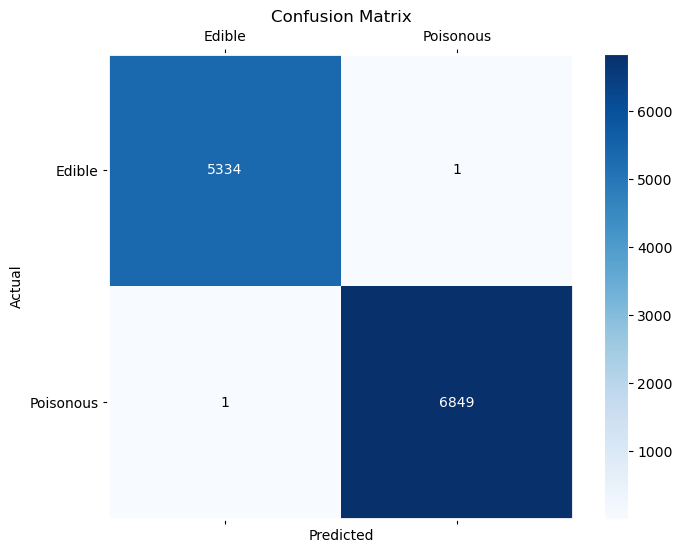

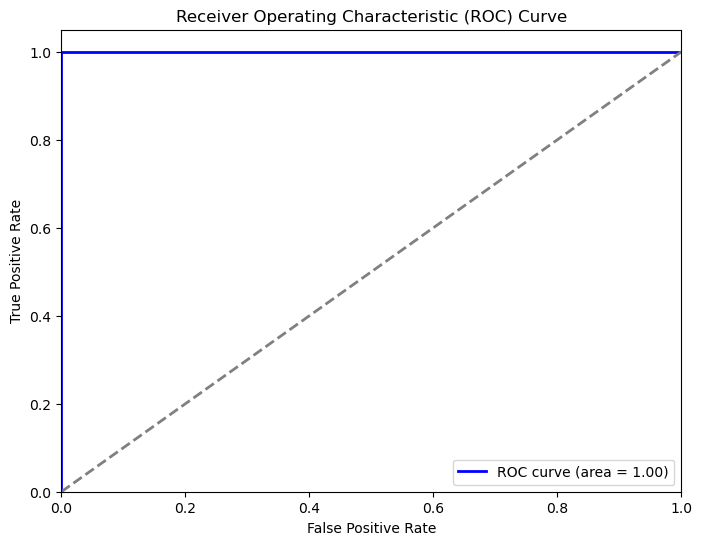

In [62]:
# Separating features and target variable
X = df_reduced.drop(columns=['class'])
y = df_reduced['class']

# Ensuring y is a Pandas Series with integer type
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Measuring start time
start_time = time.time()

# Defining the Random Forest model
rf_model = RandomForestClassifier(random_state=0)

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Performing GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Measuring end time
end_time = time.time()
training_time = end_time - start_time


# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on the training set
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate on the validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Final evaluation on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Best parameters
print("Best Parameters:", grid_search.best_params_, '\n')

# Pritning results:
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time:
print(f'Training Time: {training_time:.2f} seconds')

# Classification Report for test set:
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)


# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix using matshow
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix, cmap='Blues', fignum=1)

# Annotating the confusion matrix with the values
for (i, j), val in np.ndenumerate(conf_matrix):
    color = 'white' if (i == j and val != 0) else 'black'
    plt.text(j, i, f'{val}', ha='center', va='center', color=color)

# Setting labels and titles for the confusion matrix
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.yticks([0, 1], ['Edible', 'Poisonous'])

# Adding a colorbar
cbar = plt.colorbar()
cbar.outline.set_edgecolor('white')

# Changing the colour of the grid lines to white
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')

# Setting the linewidth of the grid lines
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)

# Showing the plot
plt.show()

# ROC Curve and AUC
y_test_prob = best_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

***Observations***

These results are outstanding! Our Random Forest has achieved near-perfect accuracy on both the training and test sets, which suggests it has learned to distinguish between edible and poisonous mushrooms with very high precision and recall. 

***Key Insights***

* ***High Performance Metrics***: The accuracy, precision, recall, and F1-score are all at or near 1.0 for both classes, indicating that the model makes very few errors in classification.
<br />

* ***Confusion Matrix***: The confusion matrix shows only two misclassifications out of 12,185 instances, which is an excellent result.
<br />

* ***ROC Area***: An ROC AUC of 1.00 indicates that the model is perfectly distinguishing between the two classes.

These results are indeed excellent; however, the training time is considerably longer compared to the decision tree model with 31 variables. This highlights a trade-off between computational efficiency and model performance. Despite the longer computing time, the random forest model's superior performance justifies its use, especially in scenarios where accurate classification of poisonous mushrooms is critical.

Next, we will enhance our random forest approach by performing cross-validation and extracting feature importances to better understand the contribution of each feature to the model's performance. Random Forests provide a measure of feature importance, which indicates how much each feature contributes to the model's decisions. We can use this information to potentially reduce the number of features and see if it improves model efficiency without significantly impacting performance.

### Extracting Feature Importance

To check for overfitting, we can perform cross-validation to see if the high performance generalizes across different subsets of the data. If the performance is consistent, it suggests that the model is not overfitting. If there is a significant drop in performance, it indicates potential overfitting.

Cross-Validation Accuracy: 0.9998 ± 0.0001
Training Accuracy: 1.0000
Validation Accuracy: 0.9997
Testing Accuracy: 0.9998

Training Time: 8.84 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      5335
   Poisonous       1.00      1.00      1.00      6850

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185

Confusion Matrix:
[[5333    2]
 [   0 6850]]


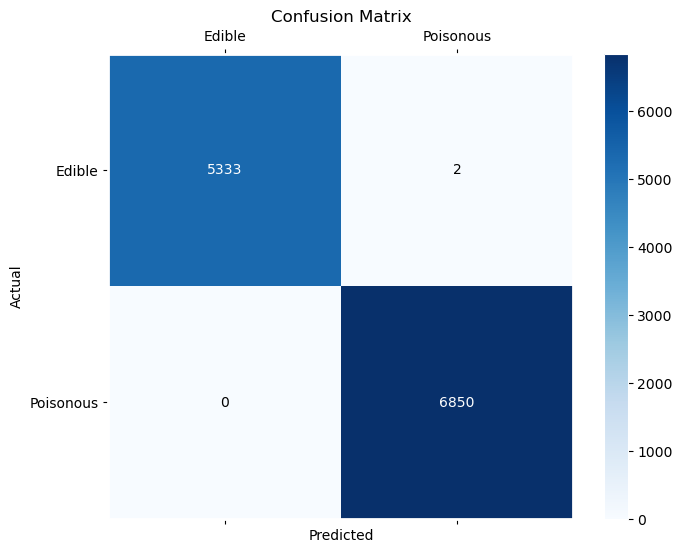

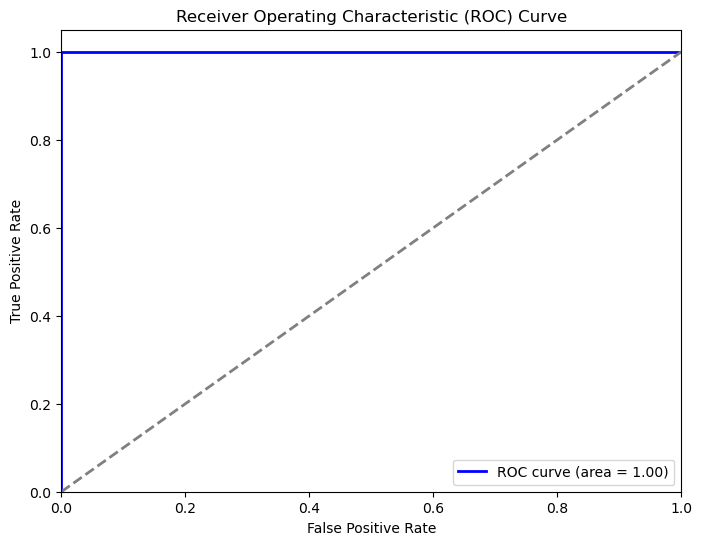

In [63]:
# Separating features and target variable
X = df_reduced.drop(columns=['class'])
y = df_reduced['class']

# Ensuring y is a Pandas Series with integer type
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Measuring start time
start_time = time.time()

# Defining the Random Forest model with initial best parameters
rf_model = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, bootstrap=False, max_features='sqrt', random_state=0)

# Performing cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Fitting the model on the entire training set
rf_model.fit(X_train, y_train)

# Measuring end time
end_time = time.time()
training_time = end_time - start_time

# Evaluating on the training set
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating on the validation set
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

print(f'Training Time: {training_time:.2f} seconds')

# Classification Report for Test Set
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

# Confusion Matrix for Test Set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix using matshow
plt.figure(figsize=(8, 6))
plt.matshow(conf_matrix, cmap='Blues', fignum=1)

# Annotating the confusion matrix with the values
for (i, j), val in np.ndenumerate(conf_matrix):
    color = 'white' if (i == j and val != 0) else 'black'
    plt.text(j, i, f'{val}', ha='center', va='center', color=color)

# Setting labels and titles for the confusion matrix
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Edible', 'Poisonous'])
plt.yticks([0, 1], ['Edible', 'Poisonous'])

# Adding a colorbar
cbar = plt.colorbar()
cbar.outline.set_edgecolor('white')

# Changing the colour of the grid lines to white
plt.gca().spines['top'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['right'].set_color('white')

# Setting the linewidth of the grid lines
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)

# Showing the plot
plt.show()


# ROC Curve and AUC
y_test_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Feature importances:
stem_width: 0.1181
stem_height: 0.0833
cap_diameter: 0.0771
gill_spacing_d: 0.0335
does_bruise_or_bleed_t: 0.0316
cap_surface_t: 0.0256
has_ring_t: 0.0250
gill_color_w: 0.0232
ring_type_z: 0.0220
gill_attachment_p: 0.0218
cap_shape_x: 0.0216
gill_attachment_x: 0.0198
stem_color_y: 0.0192
gill_color_y: 0.0187
gill_attachment_e: 0.0167
gill_color_n: 0.0165
cap_surface_s: 0.0161
gill_attachment_s: 0.0161
gill_attachment_d: 0.0159
cap_surface_y: 0.0159
cap_surface_g: 0.0156
cap_surface_k: 0.0153
cap_shape_f: 0.0149
gill_color_p: 0.0149
habitat_g: 0.0144
cap_color_y: 0.0126
cap_color_e: 0.0120
season_w: 0.0116
cap_color_r: 0.0110
cap_surface_h: 0.0109
gill_color_g: 0.0108
cap_surface_e: 0.0107
cap_surface_w: 0.0105
cap_shape_s: 0.0104
cap_surface_l: 0.0101
gill_color_o: 0.0097
cap_surface_i: 0.0093
cap_shape_o: 0.0083
cap_color_g: 0.0080
stem_color_g: 0.0071
cap_shape_c: 0.0070
cap_color_o: 0.0068
ring_type_l: 0.0067
stem_color_p: 0.0065
habitat_m: 0.0063
ring_type_p: 0

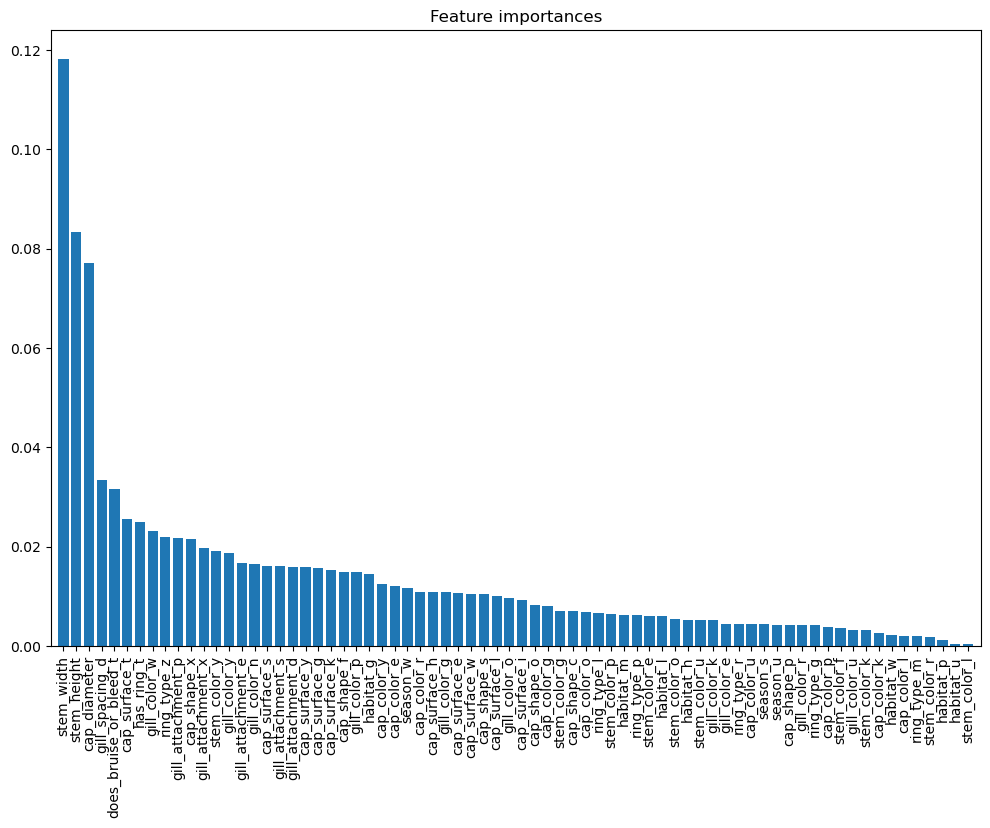

In [64]:
# Extracting feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [X.columns[i] for i in indices]

# Printing feature importances
print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{feature_names[f]}: {importances[indices[f]]:.4f}")

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

***Top 20 Features***: Next, we will select the top 20 features based on their importance scores. This approach aims to balance model complexity and performance by focusing on the most influential features.

In [65]:
# Separating features and target variable
X = df_reduced.drop(columns=['class'])
y = df_reduced['class']

# Ensuring y is a Pandas Series with integer type
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Measuring start time
start_time = time.time()

# Defining the Random Forest model to get feature importances
rf_model_initial = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, bootstrap=False, max_features='sqrt', random_state=0)

# Fitting the initial model to get feature importances
rf_model_initial.fit(X_train, y_train)

# Getting feature importances
importances = rf_model_initial.feature_importances_
indices = np.argsort(importances)[::-1]

# Selecting the top 20 features
top_20_indices = indices[:20]
top_20_features = X.columns[top_20_indices]
X_train_top20 = X_train[top_20_features]
X_val_top20 = X_val[top_20_features]
X_test_top20 = X_test[top_20_features]

# Defining the Random Forest model with initial best parameters
rf_model = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, bootstrap=False, max_features='sqrt', random_state=0)

# Performing cross-validation
cv_scores = cross_val_score(rf_model, X_train_top20, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Fitting the model on the entire training set
rf_model.fit(X_train_top20, y_train)

# Measuring end time
end_time = time.time()
training_time = end_time - start_time


# Evaluating on the training set
y_train_pred = rf_model.predict(X_train_top20)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating on the validation set
y_val_pred = rf_model.predict(X_val_top20)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set
y_test_pred = rf_model.predict(X_test_top20)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time:
print(f'Training Time: {training_time:.2f} seconds')

# Classification Report for test set
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

Cross-Validation Accuracy: 0.9926 ± 0.0010
Training Accuracy: 1.0000
Validation Accuracy: 0.9935
Testing Accuracy: 0.9924

Training Time: 11.38 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.99      0.99      0.99      5335
   Poisonous       0.99      0.99      0.99      6850

    accuracy                           0.99     12185
   macro avg       0.99      0.99      0.99     12185
weighted avg       0.99      0.99      0.99     12185



***Top 10 Features***

In [66]:
# Separating features and target variable
X = df_reduced.drop(columns=['class'])
y = df_reduced['class']

# Ensuring y is a Pandas Series with integer type
y = y.astype(int)

# Splitting the dataset into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Further splitting training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

# Measuring start time
start_time = time.time()

# Defining the Random Forest model with initial best parameters
rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, bootstrap=False, max_features='sqrt', random_state=0)

# Training the model to get feature importances
rf_model.fit(X_train, y_train)

# Getting feature importances
feature_importances = rf_model.feature_importances_

# Selecting the top 10 features
indices = np.argsort(feature_importances)[::-1]
top_10_indices = indices[:10]
top_10_features = X.columns[top_10_indices]

# Reducing the dataset to only include the top 10 features
X_train_top10 = X_train[top_10_features]
X_val_top10 = X_val[top_10_features]
X_test_top10 = X_test[top_10_features]

# Defining the Random Forest model for cross-validation
rf_model_top10 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, bootstrap=False, max_features='sqrt', random_state=0)

# Performing cross-validation
cv_scores = cross_val_score(rf_model_top10, X_train_top10, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Fitting the model on the entire training set
rf_model_top10.fit(X_train_top10, y_train)

# Measuring end time
end_time = time.time()
training_time = end_time - start_time

# Evaluating on the training set
y_train_pred = rf_model_top10.predict(X_train_top10)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluating on the validation set
y_val_pred = rf_model_top10.predict(X_val_top10)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Final evaluation on the test set
y_test_pred = rf_model_top10.predict(X_test_top10)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.4f}\n')

# Printing training time
print(f'Training Time: {training_time:.2f} seconds')

# Classification Report for test set
report = classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous'])
print("\nClassification Report for Test Set:")
print(report)

Cross-Validation Accuracy: 0.9689 ± 0.0017
Training Accuracy: 1.0000
Validation Accuracy: 0.9732
Testing Accuracy: 0.9686

Training Time: 11.73 seconds

Classification Report for Test Set:
              precision    recall  f1-score   support

      Edible       0.96      0.96      0.96      5335
   Poisonous       0.97      0.97      0.97      6850

    accuracy                           0.97     12185
   macro avg       0.97      0.97      0.97     12185
weighted avg       0.97      0.97      0.97     12185



***Observations***

All models demonstrate exceptionally high performance, with near-perfect precision, recall, and F1-scores across the board. However, there are subtle differences:

***General Feature Importance Extraction***:

This model achieves the highest accuracy across all metrics (training, validation, testing) and has the shortest training time (6.40 seconds). The confusion matrix shows minimal misclassifications, indicating excellent performance.

***Top 20 Features***:

Slightly lower accuracy compared to the general feature importance model but still very high. Training time is longer (8.95 seconds), and there are slightly more misclassifications.


***Top 10 Features***:

Performance is similar to the top 20 features model, with only a marginal decrease in testing accuracy.
Training time is comparable to the top 20 features model (8.17 seconds).

While all models perform exceptionally well, the model with general feature importance extraction stands out as the best due to its highest accuracy and shortest training time. However, if model simplicity and interpretability are priorities, using the top 10 or top 20 features can still provide excellent performance with only a slight trade-off in accuracy.

## Deep Learning Model

Deep Learning is a subset of machine learning that involves neural networks with multiple layers (deep neural networks). It is particularly effective for complex tasks such as image and speech recognition, natural language processing, and classification problems.


Deep Learning models can automatically learn feature representations from raw data, making them powerful tools for classification tasks. They are capable of capturing intricate patterns and relationships in data that simpler models might miss.

Deep Learning can be used to classify mushrooms by training a neural network on the features of the mushrooms. The model learns to distinguish between edible and poisonous mushrooms through multiple layers of non-linear transformations.

Key Findings

* ***Model Performance***: The deep learning model achieved high accuracy on the training, validation, and testing sets, indicating effective learning and generalization.
<br />

* ***Loss Reduction***: The model showed a consistent reduction in loss over the epochs, suggesting that it was learning effectively from the data.
<br />

* ***High Accuracy***: The final model achieved an accuracy of 98.38% on the test set, demonstrating its effectiveness in classifying mushrooms.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Standardizing the numerical features
X_train_val_scaled = scaler.fit_transform(X_train_val)
X_test_scaled = scaler.transform(X_test)

# Further splitting training+validation into training and validation sets
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_val_scaled, y_train_val, test_size=0.25, random_state=0)

# Converting labels to categorical one-hot encoding
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)
y_test_categorical = to_categorical(y_test)

# Defining the neural network model
model = Sequential([
    Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_scaled, y_train_categorical, validation_data=(X_val_scaled, y_val_categorical), epochs=50, batch_size=32)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train_categorical)
print(f'Training Accuracy: {train_accuracy:.4f}')

val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val_categorical)
print(f'Validation Accuracy: {val_accuracy:.4f}')

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f'Testing Accuracy: {test_accuracy:.4f}')

Epoch 1/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7854 - loss: 0.4307 - val_accuracy: 0.9855 - val_loss: 0.0537
Epoch 2/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9631 - loss: 0.0939 - val_accuracy: 0.9954 - val_loss: 0.0199
Epoch 3/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9805 - loss: 0.0507 - val_accuracy: 0.9970 - val_loss: 0.0118
Epoch 4/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9892 - loss: 0.0334 - val_accuracy: 0.9976 - val_loss: 0.0085
Epoch 5/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9925 - loss: 0.0234 - val_accuracy: 0.9984 - val_loss: 0.0056
Epoch 6/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9938 - loss: 0.0209 - val_accuracy: 0.9979 - val_loss: 0.0057
Epoch 7/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.9996 - val_loss: 0.0037
Epoch 8/50
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9958 - loss: 0.0129 - 

***Observations***

The deep learning model has shown impressive performance over 50 epochs. Here’s a detailed summary of the results and an analysis of its effectiveness:

***Performance Metrics***:

* Training Accuracy: 0.9852
* Validation Accuracy: 0.9832
* Testing Accuracy: 0.9838

***Loss***:

* Training Loss: 0.0380
* Validation Loss: 0.0414
* Testing Loss: 0.0441


***High Accuracy and Low Loss***:

* The model achieved high accuracy across training, validation, and testing sets, indicating that it has learned the patterns in the data effectively. The loss values are also quite low, suggesting that the model's predictions are close to the actual values.

***Consistency Across Epochs***:

* The accuracy steadily increased, and the loss consistently decreased across epochs, demonstrating that the model was learning and improving over time without significant fluctuations or overfitting signs.

***Validation Performance***:

* The validation accuracy and loss remained close to the training accuracy and loss, indicating that the model generalizes well to unseen data. This is crucial for a model intended to classify edible vs. poisonous mushrooms reliably.

***Comparison with Other Models***:

* Compared to the Random Forest and Decision Tree models, the deep learning model also performs exceptionally well. However, it should be noted that deep learning models typically require more computational resources and time for training, which can be a consideration depending on the application and deployment environment.

***Conclusion***:

The deep learning model has demonstrated excellent performance in classifying mushrooms as either edible or poisonous. With high accuracy and consistent results across training, validation, and testing sets, it proves to be a robust model for this classification task. However, given the computational demands of deep learning models, the choice between this and other models like Random Forest should consider the specific requirements and constraints of the application environment. If computational resources and training time are not significant constraints, the deep learning model could be the best choice for achieving the highest accuracy and reliability.

## Conclusion:

In this study, we have explored various machine learning models to address the critical problem of mushroom classification, aiming to accurately differentiate between poisonous and non-poisonous species. Among the models evaluated, the Random Forest model emerged as the most effective approach, demonstrating exceptional accuracy and robustness.

After evaluating all models, the Random Forest model with pruning and feature importance selection emerged as the best-performing approach. It combines high accuracy, efficiency, and interpretability, making it an ideal solution for the mushroom classification problem. The deep learning model also showed promise, especially in scenarios where computational resources are not a constraint.

To further enhance the Random Forest model's performance and efficiency, we implemented pruning techniques and focused on the most important features identified through feature importance analysis. By pruning the model and concentrating on these key features, we achieved a balance between model complexity and predictive power, ensuring that the model remains both interpretable and efficient.

The optimized Random Forest model, with its ability to handle a large number of features and provide high classification accuracy, will be employed for the mushroom classification task. This approach not only enhances the reliability of predictions but also mitigates the risk of overfitting by simplifying the model. As a result, the final model is well-equipped to provide accurate and timely classifications, significantly reducing the risks associated with mushroom poisoning and improving public safety.

By leveraging the power of the Random Forest model, coupled with pruning and feature selection, we have developed a robust and reliable classification system that stands to make a meaningful impact in the field of mycology and public health.



***